In [1]:
# import osmnx as ox
import pandas as pd
import geopandas as gpd

import warnings
import sys
import os
warnings.filterwarnings("ignore")
sys.stderr = open(os.devnull, 'w')

# local crs
local_crs = 32636
# path to data
example_data_path = "./data"

# Миграция ГП

### Миграция ГП

In [5]:
water = gpd.read_file('data/Водомы итог (конец).geojson')
water = water[water['name'] == 'Ладожское озеро']
water

name  type                                           geometry
92  Ладожское озеро  lake  MULTIPOLYGON (((30.42725 60.85666, 30.42725 60...

In [6]:
water.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
ter = gpd.read_file('data/Границы+население/Граница ЛО.geojson')
ter

fid                   name       layer     2019     2021     2022  \
0  1000  Ленинградская область  Границы ЛО  1847867  1892711  1911586   

      2023     2020                                           geometry  
0  2023767  1875872  MULTIPOLYGON (((34.32572 59.19331, 34.32541 59...

In [8]:
ter_mo = gpd.read_file('data/Границы+население/Границы только МР.geojson')
ter_mo

fid                                 name  \
0   200   Бокситогорский муниципальный район   
1   202    Кингисеппский муниципальный район   
2   201        Киришский муниципальный район   
3   207        Кировский муниципальный район   
4   203  Лодейнопольский муниципальный район   
5   204    Ломоносовский муниципальный район   
6   205     Подпорожский муниципальный район   
7   206      Приозерский муниципальный район   
8   188       Сосновоборский городской округ   
9   217      Волосовский муниципальный район   
10  215       Волховский муниципальный район   
11  210     Всеволожский муниципальный район   
12  211       Выборгский муниципальный район   
13  213       Гатчинский муниципальный район   
14  214          Лужский муниципальный район   
15  212      Сланцевский муниципальный район   
16  216       Тихвинский муниципальный район   
17  218      Тоснненский муниципальный район   

                                  layer    2019    2021    2022    2023  \
0    Бокситогорский муниципальный район   49256   48048   47236   50977   
1     Кингисеппский муниципальный район   76182   73714   72512   83838   
2         Киришский муниципальный район   62069   61474   60003   59877   
3         Кировский муниципальный район  105936  106077  104710  108460   
4   Лодейнопольский муниципальный район   28530   27651   27365   27548   
5     Ломоносовский муниципальный район   73475   78421   81817   85329   
6      Подпорожский муниципальный район   28263   27103   26547   25508   
7       Приозерский муниципальный район   61028   59903   59496   57047   
8        Сосновоборский городской округ   64121   67054   65941   64121   
9       Волосовский муниципальный район   51668   51587   51600   50211   
10       Волховский муниципальный район   51668   51587   51600   50211   
11     Всеволожский муниципальный район  398896  473514  506289  554288   
12       Выборгский муниципальный район  199571  195728  193863  195374   
13       Гатчинский муниципальный район  243156  232752  230324  261898   
14          Лужский муниципальный район   72035   70787   69153   67523   
15      Сланцевский муниципальный район   42494   42030   41931   45192   
16       Тихвинский муниципальный район   69567   68475   67768   66266   
17      Тоснненский муниципальный район  128327  123557  120734  133109   

      2020                                           geometry  
0    48625  MULTIPOLYGON (((34.32834 59.19564, 34.32777 59...  
1    74881  MULTIPOLYGON (((28.19199 59.32665, 28.19187 59...  
2    61474  MULTIPOLYGON (((31.94177 59.42479, 31.94327 59...  
3   106016  MULTIPOLYGON (((31.91715 59.95987, 31.91722 59...  
4    28032  MULTIPOLYGON (((32.95801 60.71431, 33.02438 60...  
5    76786  MULTIPOLYGON (((29.45522 59.67542, 29.45718 59...  
6    27689  MULTIPOLYGON (((33.75559 61.23334, 33.77158 61...  
7    60351  MULTIPOLYGON (((30.69201 60.50326, 30.68940 60...  
8    67720  MULTIPOLYGON (((29.19344 59.85095, 29.17425 59...  
9    51778  MULTIPOLYGON (((28.98894 59.48069, 28.98604 59...  
10   51778  MULTIPOLYGON (((32.85314 60.51175, 32.84899 60...  
11  438607  MULTIPOLYGON (((30.55161 59.96981, 30.55200 59...  
12  198226  MULTIPOLYGON (((28.99640 60.03638, 28.85880 60...  
13  238034  MULTIPOLYGON (((29.63489 59.57073, 29.63372 59...  
14   75307  MULTIPOLYGON (((29.74752 58.43696, 29.74807 58...  
15   42296  MULTIPOLYGON (((28.55918 59.15314, 28.55977 59...  
16   69457  MULTIPOLYGON (((34.40706 60.15749, 34.40750 60...  
17  126915  MULTIPOLYGON (((30.68185 59.72645, 30.68152 59...

In [9]:
ter_gp = gpd.read_file('data/Границы+население/Границы только ГП и СП.geojson')
ter_gp

fid                                name  \
0      7     Самойловское сельское поселение   
1      2   Большедворское сельское поселение   
2      6     Пикалевское городское поселение   
3      3          Борское сельское поселение   
4      1  Бокситогорское городское поселение   
..   ...                                 ...   
183  185     Фёдоровское городское поселение   
184  179       Нурминское сельское поселение   
185  175   Красноборское городское поселение   
186  183  Трубникоборское сельское поселение   
187  176        Лисинское сельское поселение   

                                  layer   2019   2021   2022   2023   2020  \
0    Бокситогорский муниципальный район   2069   2085   2096   2154   2088   
1    Бокситогорский муниципальный район   1575   1505   1486   1698   1528   
2    Бокситогорский муниципальный район  19981  19490  19250  20169  19746   
3    Бокситогорский муниципальный район   3312   3301   3272   3393   3279   
4    Бокситогорский муниципальный район  15370  15088  14606  15960  15200   
..                                  ...    ...    ...    ...    ...    ...   
183     Тоснненский муниципальный район   4460   4450   4562   6083   4536   
184     Тоснненский муниципальный район   3127   3018   2977   3354   3090   
185     Тоснненский муниципальный район   5145   4825   4657   4507   5006   
186     Тоснненский муниципальный район   1603   1541   1479   1620   1583   
187     Тоснненский муниципальный район   1984   1789   1703   1919   1856   

                                              geometry  
0    MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  
1    MULTIPOLYGON (((34.30682 59.71494, 34.30791 59...  
2    MULTIPOLYGON (((34.14251 59.48759, 34.13616 59...  
3    MULTIPOLYGON (((34.05997 59.15087, 34.06007 59...  
4    MULTIPOLYGON (((34.06836 59.40315, 34.05535 59...  
..                                                 ...  
183  MULTIPOLYGON (((30.52049 59.69087, 30.52316 59...  
184  MULTIPOLYGON (((31.01271 59.63362, 31.01394 59...  
185  MULTIPOLYGON (((30.58336 59.64993, 30.58367 59...  
186  MULTIPOLYGON (((31.13126 59.08942, 31.13522 59...  
187  MULTIPOLYGON (((30.59799 59.48382, 30.59899 59...  

[188 rows x 9 columns]

In [10]:
import geopandas as gpd

# Выполните разность геометрий, чтобы удалить воду из границ муниципальных образований
ter_mo['geometry'] = ter_mo.geometry.apply(lambda x: x.difference(water.unary_union))
ter_gp['geometry'] = ter_gp.geometry.apply(lambda x: x.difference(water.unary_union))
# Очистите GeoDataFrame от столбцов, которые стали полностью пустыми после удаления воды
ter_mo = ter_mo.dropna(axis=1, how='all')
ter_gp = ter_gp.dropna(axis=1, how='all')


In [11]:
import pandas as pd

# Load the Excel file to see the sheets and structure
file_path = 'data/Копия Миграция ЛО.xlsx'
xls = pd.ExcelFile(file_path)

# Displaying the names of the sheets in the Excel file
sheet_names = xls.sheet_names
sheet_names

['Бокситогорский МР',
 'Волосовский МР',
 'Волховский  МР',
 'Всеволожский МР',
 'Выборгский МР',
 'Гатчинский МР',
 'Кингисеппский МР',
 'Киришский  МР',
 'Кировский МР',
 'Лодейнопольский МР',
 'Ломоносовский МР',
 'Лужский МР',
 'Подпорожский  МР',
 'Приозерский МР',
 'Сланцевский МР',
 'Тихвинский МР',
 'Тосненский  МР',
 'Сосновоборский ГО']

In [12]:
df = pd.read_excel(xls, sheet_name=sheet_names[0], header=None)
df.rename(columns={0: 'name', 1: '2019', 2: '2020', 3: '2021', 4: '2022'}, inplace=True)
df

name    2019    2020  \
0                    Бокситогорский муниципальный район     NaN     NaN   
1                                                   NaN  2019.0  2020.0   
2                    Бокситогорский муниципальный район     NaN     NaN   
3                                        Миграция-всего     NaN     NaN   
4                                   Муниципальный район   -99.0    15.0   
...                                                 ...     ...     ...   
1694                                                NaN     NaN     NaN   
1695                                                NaN     NaN     NaN   
1696                                                NaN     NaN     NaN   
1697                                                NaN     NaN     NaN   
1698  Copyright © Федеральная служба государственной...     NaN     NaN   

        2021    2022  
0        NaN     NaN  
1     2021.0  2022.0  
2        NaN     NaN  
3        NaN     NaN  
4      -39.0    36.0  
...      ...     ...  
1694     NaN     NaN  
1695     NaN     NaN  
1696     NaN     NaN  
1697     NaN     NaN  
1698     NaN     NaN  

[1699 rows x 5 columns]

In [13]:
import pandas as pd

# Load the Excel file
file_path = 'data/Копия Миграция ЛО.xlsx'
xls = pd.ExcelFile(file_path)

# Prepare to accumulate the results in a new DataFrame
final_df = pd.DataFrame(columns=['sheet_name', 'region', '2019', '2020', '2021', '2022'])

# Iterate over each sheet in the Excel file
for sheet_name in xls.sheet_names:
    # Load data from the current sheet
    df = pd.read_excel(xls, sheet_name=sheet_name, header=None)
    # Rename columns for clarity
    df.rename(columns={0: 'name', 1: '2019', 2: '2020', 3: '2021', 4: '2022'}, inplace=True)
    # Filter rows where name matches 'Миграция-всего'
    filtered_rows = df[df['name'] == 'Миграция-всего']
    
    # Extract necessary information
    for index in filtered_rows.index:
        region_name = df.loc[index - 1, 'name'] if index > 0 else None
        migration_data = df.loc[index + 1, ['2019', '2020', '2021', '2022']].to_dict() if index + 1 < len(df) else None
        
        if region_name and migration_data is not None:
            # Create a temporary DataFrame to append to final_df
            temp_df = pd.DataFrame({
                'sheet_name': [sheet_name],
                'region': [region_name],
                '2019': [migration_data['2019']],
                '2020': [migration_data['2020']],
                '2021': [migration_data['2021']],
                '2022': [migration_data['2022']]
            })
            # Append using concat
            final_df = pd.concat([final_df, temp_df], ignore_index=True)

final_df



sheet_name                              region   2019   2020  \
0    Бокситогорский МР  Бокситогорский муниципальный район  -99.0   15.0   
1    Бокситогорский МР                      Бокситогорское    5.0    NaN   
2    Бокситогорский МР                         Пикалевское  -58.0    NaN   
3    Бокситогорский МР                          Ефимовское  -20.0  -94.0   
4    Бокситогорский МР                      Большедворское  -22.0   11.0   
..                 ...                                 ...    ...    ...   
213     Тосненский  МР                           Лисинское -110.0    NaN   
214     Тосненский  МР                       Тельмановское  -58.0 -357.0   
215     Тосненский  МР                     Трубникоборское   -2.0  -28.0   
216     Тосненский  МР                          Шапкинское   -4.0  -17.0   
217  Сосновоборский ГО                      Сосновоборский -418.0 -324.0   

      2021   2022  
0    -39.0   36.0  
1   -224.0  -82.0  
2     64.0   -9.0  
3     39.0   16.0  
4     -1.0   32.0  
..     ...    ...  
213  -51.0  -84.0  
214 -124.0 -284.0  
215  -40.0  -15.0  
216  -10.0   16.0  
217 -623.0 -501.0  

[218 rows x 6 columns]

In [14]:
# Filter out rows where 'region' contains 'муниципальный район' into a new DataFrame
municipal_df = final_df[final_df['region'].str.contains('муниципальный район')].copy()

# Remove those rows from the original DataFrame
final_df = final_df[~final_df['region'].str.contains('муниципальный район')]

In [15]:
# Adding the specific row to the municipal_df
specific_row = final_df[(final_df['sheet_name'] == 'Сосновоборский ГО') & (final_df['region'] == 'Сосновоборский')]
municipal_df = pd.concat([municipal_df, specific_row], ignore_index=True)


In [16]:
municipal_df

sheet_name                               region     2019     2020  \
0    Бокситогорский МР   Бокситогорский муниципальный район    -99.0     15.0   
1       Волосовский МР      Волосовский муниципальный район    397.0    278.0   
2       Волховский  МР       Волховский муниципальный район   -173.0     56.0   
3      Всеволожский МР     Всеволожский муниципальный район  39719.0  35893.0   
4        Выборгский МР       Выборгский муниципальный район   -210.0   -907.0   
5        Гатчинский МР       Гатчинский муниципальный район  -3760.0  -3039.0   
6     Кингисеппский МР    Кингисеппский муниципальный район   -812.0   -516.0   
7        Киришский  МР        Киришский муниципальный район   -128.0   -110.0   
8         Кировский МР        Кировский муниципальный район    678.0    936.0   
9   Лодейнопольский МР  Лодейнопольский муниципальный район   -209.0     25.0   
10    Ломоносовский МР    Ломоносовский муниципальный район   3743.0   2257.0   
11          Лужский МР          Лужский муниципальный район   -483.0   -505.0   
12    Подпорожский  МР     Подпорожский муниципальный район   -272.0   -203.0   
13      Приозерский МР      Приозерский муниципальный район   -251.0    126.0   
14      Сланцевский МР      Сланцевский муниципальный район    273.0    252.0   
15       Тихвинский МР       Тихвинский муниципальный район    430.0   -216.0   
16      Тосненский  МР       Тосненский муниципальный район   -544.0  -2158.0   
17   Сосновоборский ГО                       Сосновоборский   -418.0   -324.0   

       2021     2022  
0     -39.0     36.0  
1     531.0    154.0  
2      11.0    -39.0  
3   34728.0  28336.0  
4      51.0    223.0  
5     304.0    122.0  
6    -229.0   -101.0  
7     -59.0   -219.0  
8    -312.0    124.0  
9     140.0     52.0  
10   4058.0   5515.0  
11   -374.0   -361.0  
12   -147.0   -138.0  
13    382.0    144.0  
14    615.0    -56.0  
15    161.0   -258.0  
16  -1226.0  -1360.0  
17   -623.0   -501.0

In [17]:
ter_mo

fid                                 name  \
0   200   Бокситогорский муниципальный район   
1   202    Кингисеппский муниципальный район   
2   201        Киришский муниципальный район   
3   207        Кировский муниципальный район   
4   203  Лодейнопольский муниципальный район   
5   204    Ломоносовский муниципальный район   
6   205     Подпорожский муниципальный район   
7   206      Приозерский муниципальный район   
8   188       Сосновоборский городской округ   
9   217      Волосовский муниципальный район   
10  215       Волховский муниципальный район   
11  210     Всеволожский муниципальный район   
12  211       Выборгский муниципальный район   
13  213       Гатчинский муниципальный район   
14  214          Лужский муниципальный район   
15  212      Сланцевский муниципальный район   
16  216       Тихвинский муниципальный район   
17  218      Тоснненский муниципальный район   

                                  layer    2019    2021    2022    2023  \
0    Бокситогорский муниципальный район   49256   48048   47236   50977   
1     Кингисеппский муниципальный район   76182   73714   72512   83838   
2         Киришский муниципальный район   62069   61474   60003   59877   
3         Кировский муниципальный район  105936  106077  104710  108460   
4   Лодейнопольский муниципальный район   28530   27651   27365   27548   
5     Ломоносовский муниципальный район   73475   78421   81817   85329   
6      Подпорожский муниципальный район   28263   27103   26547   25508   
7       Приозерский муниципальный район   61028   59903   59496   57047   
8        Сосновоборский городской округ   64121   67054   65941   64121   
9       Волосовский муниципальный район   51668   51587   51600   50211   
10       Волховский муниципальный район   51668   51587   51600   50211   
11     Всеволожский муниципальный район  398896  473514  506289  554288   
12       Выборгский муниципальный район  199571  195728  193863  195374   
13       Гатчинский муниципальный район  243156  232752  230324  261898   
14          Лужский муниципальный район   72035   70787   69153   67523   
15      Сланцевский муниципальный район   42494   42030   41931   45192   
16       Тихвинский муниципальный район   69567   68475   67768   66266   
17      Тоснненский муниципальный район  128327  123557  120734  133109   

      2020                                           geometry  
0    48625  POLYGON ((34.32777 59.19548, 34.32746 59.19544...  
1    74881  POLYGON ((28.19187 59.32671, 28.19185 59.32673...  
2    61474  POLYGON ((31.94327 59.42428, 31.93481 59.41883...  
3   106016  MULTIPOLYGON (((31.91722 59.95916, 31.91717 59...  
4    28032  MULTIPOLYGON (((33.02438 60.72112, 33.06224 60...  
5    76786  POLYGON ((29.45718 59.67313, 29.45392 59.67086...  
6    27689  POLYGON ((33.77158 61.23326, 33.79156 61.23320...  
7    60351  MULTIPOLYGON (((30.68940 60.50106, 30.68662 60...  
8    67720  POLYGON ((29.17425 59.85037, 29.15581 59.84976...  
9    51778  POLYGON ((28.98604 59.48401, 28.98321 59.48727...  
10   51778  MULTIPOLYGON (((32.84899 60.50379, 32.84623 60...  
11  438607  MULTIPOLYGON (((30.55200 59.96912, 30.55246 59...  
12  198226  POLYGON ((28.85880 60.04000, 28.82636 60.04088...  
13  238034  POLYGON ((29.63372 59.57069, 29.63286 59.57065...  
14   75307  POLYGON ((29.74807 58.43754, 29.74811 58.43758...  
15   42296  POLYGON ((28.55977 59.15308, 28.56023 59.15321...  
16   69457  POLYGON ((34.40750 60.15748, 34.41680 60.15734...  
17  126915  POLYGON ((30.68152 59.72665, 30.68134 59.72678...

In [18]:
final_df['region'] = final_df['region'].str.replace(r'\.$', '', regex=True)  # Remove trailing dots

final_df

sheet_name           region   2019   2020   2021   2022
1    Бокситогорский МР   Бокситогорское    5.0    NaN -224.0  -82.0
2    Бокситогорский МР      Пикалевское  -58.0    NaN   64.0   -9.0
3    Бокситогорский МР       Ефимовское  -20.0  -94.0   39.0   16.0
4    Бокситогорский МР   Большедворское  -22.0   11.0   -1.0   32.0
5    Бокситогорский МР          Борское   -7.0   39.0    5.0    4.0
..                 ...              ...    ...    ...    ...    ...
213     Тосненский  МР        Лисинское -110.0    NaN  -51.0  -84.0
214     Тосненский  МР    Тельмановское  -58.0 -357.0 -124.0 -284.0
215     Тосненский  МР  Трубникоборское   -2.0  -28.0  -40.0  -15.0
216     Тосненский  МР       Шапкинское   -4.0  -17.0  -10.0   16.0
217  Сосновоборский ГО   Сосновоборский -418.0 -324.0 -623.0 -501.0

[201 rows x 6 columns]

In [19]:
ter_gp

fid                                name  \
0      7     Самойловское сельское поселение   
1      2   Большедворское сельское поселение   
2      6     Пикалевское городское поселение   
3      3          Борское сельское поселение   
4      1  Бокситогорское городское поселение   
..   ...                                 ...   
183  185     Фёдоровское городское поселение   
184  179       Нурминское сельское поселение   
185  175   Красноборское городское поселение   
186  183  Трубникоборское сельское поселение   
187  176        Лисинское сельское поселение   

                                  layer   2019   2021   2022   2023   2020  \
0    Бокситогорский муниципальный район   2069   2085   2096   2154   2088   
1    Бокситогорский муниципальный район   1575   1505   1486   1698   1528   
2    Бокситогорский муниципальный район  19981  19490  19250  20169  19746   
3    Бокситогорский муниципальный район   3312   3301   3272   3393   3279   
4    Бокситогорский муниципальный район  15370  15088  14606  15960  15200   
..                                  ...    ...    ...    ...    ...    ...   
183     Тоснненский муниципальный район   4460   4450   4562   6083   4536   
184     Тоснненский муниципальный район   3127   3018   2977   3354   3090   
185     Тоснненский муниципальный район   5145   4825   4657   4507   5006   
186     Тоснненский муниципальный район   1603   1541   1479   1620   1583   
187     Тоснненский муниципальный район   1984   1789   1703   1919   1856   

                                              geometry  
0    POLYGON ((34.42428 59.67150, 34.42548 59.66226...  
1    POLYGON ((34.30791 59.71295, 34.30701 59.71290...  
2    POLYGON ((34.13616 59.49064, 34.13765 59.49429...  
3    POLYGON ((34.06007 59.14658, 34.05620 59.14430...  
4    POLYGON ((34.05535 59.40393, 34.05026 59.40426...  
..                                                 ...  
183  POLYGON ((30.52316 59.69108, 30.52335 59.69094...  
184  POLYGON ((31.01394 59.63327, 31.01824 59.63223...  
185  POLYGON ((30.58367 59.65002, 30.58381 59.65022...  
186  POLYGON ((31.13522 59.09693, 31.13672 59.09956...  
187  POLYGON ((30.59899 59.48310, 30.59966 59.48256...  

[188 rows x 9 columns]

In [20]:

# Создаем новые колонки для миграции в ter_gp
ter_gp['migration_2019'] = 0
ter_gp['migration_2020'] = 0
ter_gp['migration_2021'] = 0
ter_gp['migration_2022'] = 0

# Проходим по каждой строке в final_df и ищем совпадения в ter_gp
for index, row in final_df.iterrows():
    # Используем str.contains для проверки наличия подстроки, предполагая, что значения в 'region' могут частично совпадать с 'name'
    matches = ter_gp['name'].str.contains(row['region'], na=False)
    if matches.any():
        # Обновляем данные миграции для всех соответствующих строк в ter_gp
        ter_gp.loc[matches, 'migration_2019'] += row['2019'] if pd.notna(row['2019']) else 0
        ter_gp.loc[matches, 'migration_2020'] += row['2020'] if pd.notna(row['2020']) else 0
        ter_gp.loc[matches, 'migration_2021'] += row['2021'] if pd.notna(row['2021']) else 0
        ter_gp.loc[matches, 'migration_2022'] += row['2022'] if pd.notna(row['2022']) else 0

In [21]:
ter_gp

fid                                name  \
0      7     Самойловское сельское поселение   
1      2   Большедворское сельское поселение   
2      6     Пикалевское городское поселение   
3      3          Борское сельское поселение   
4      1  Бокситогорское городское поселение   
..   ...                                 ...   
183  185     Фёдоровское городское поселение   
184  179       Нурминское сельское поселение   
185  175   Красноборское городское поселение   
186  183  Трубникоборское сельское поселение   
187  176        Лисинское сельское поселение   

                                  layer   2019   2021   2022   2023   2020  \
0    Бокситогорский муниципальный район   2069   2085   2096   2154   2088   
1    Бокситогорский муниципальный район   1575   1505   1486   1698   1528   
2    Бокситогорский муниципальный район  19981  19490  19250  20169  19746   
3    Бокситогорский муниципальный район   3312   3301   3272   3393   3279   
4    Бокситогорский муниципальный район  15370  15088  14606  15960  15200   
..                                  ...    ...    ...    ...    ...    ...   
183     Тоснненский муниципальный район   4460   4450   4562   6083   4536   
184     Тоснненский муниципальный район   3127   3018   2977   3354   3090   
185     Тоснненский муниципальный район   5145   4825   4657   4507   5006   
186     Тоснненский муниципальный район   1603   1541   1479   1620   1583   
187     Тоснненский муниципальный район   1984   1789   1703   1919   1856   

                                              geometry  migration_2019  \
0    POLYGON ((34.42428 59.67150, 34.42548 59.66226...              34   
1    POLYGON ((34.30791 59.71295, 34.30701 59.71290...             -22   
2    POLYGON ((34.13616 59.49064, 34.13765 59.49429...             -58   
3    POLYGON ((34.06007 59.14658, 34.05620 59.14430...             -17   
4    POLYGON ((34.05535 59.40393, 34.05026 59.40426...               5   
..                                                 ...             ...   
183  POLYGON ((30.52316 59.69108, 30.52335 59.69094...               0   
184  POLYGON ((31.01394 59.63327, 31.01824 59.63223...             -12   
185  POLYGON ((30.58367 59.65002, 30.58381 59.65022...             -96   
186  POLYGON ((31.13522 59.09693, 31.13672 59.09956...              -2   
187  POLYGON ((30.59899 59.48310, 30.59966 59.48256...            -110   

     migration_2020  migration_2021  migration_2022  
0                30              42              33  
1                11              -1              32  
2                 0              64              -9  
3                39              18              29  
4                 0            -224             -82  
..              ...             ...             ...  
183               0               0               0  
184             -47              -1               0  
185            -133            -101             -72  
186             -28             -40             -15  
187               0             -51             -84  

[188 rows x 13 columns]

In [22]:
# Проверяем, содержат ли столбцы значения None
has_none = ter_gp[['migration_2019', 'migration_2020', 'migration_2021', 'migration_2022']].isna().any()
print("Columns containing None values:")
print(has_none)

# Проверяем, содержат ли столбцы значения 0
has_zero = (ter_gp[['migration_2019', 'migration_2020', 'migration_2021', 'migration_2022']] == 0).any()
print("Columns containing zero values:")
print(has_zero)

# Количество None в каждом столбце
count_none = ter_gp[['migration_2019', 'migration_2020', 'migration_2021', 'migration_2022']].isna().sum()
print("Count of None values per column:")
print(count_none)

# Количество нулей в каждом столбце
count_zero = (ter_gp[['migration_2019', 'migration_2020', 'migration_2021', 'migration_2022']] == 0).sum()
print("Count of zero values per column:")
print(count_zero)

Columns containing None values:
migration_2019    False
migration_2020    False
migration_2021    False
migration_2022    False
dtype: bool
Columns containing zero values:
migration_2019    True
migration_2020    True
migration_2021    True
migration_2022    True
dtype: bool
Count of None values per column:
migration_2019    0
migration_2020    0
migration_2021    0
migration_2022    0
dtype: int64
Count of zero values per column:
migration_2019     8
migration_2020    80
migration_2021     8
migration_2022    10
dtype: int64


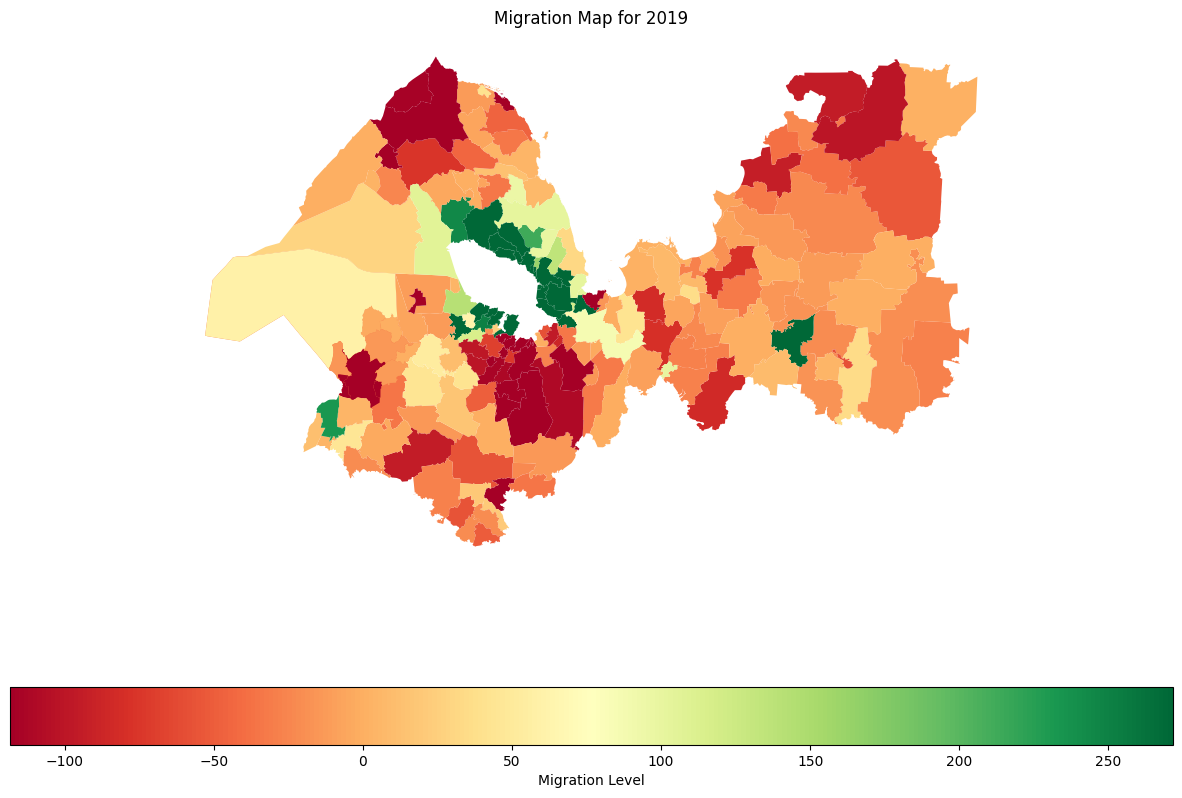

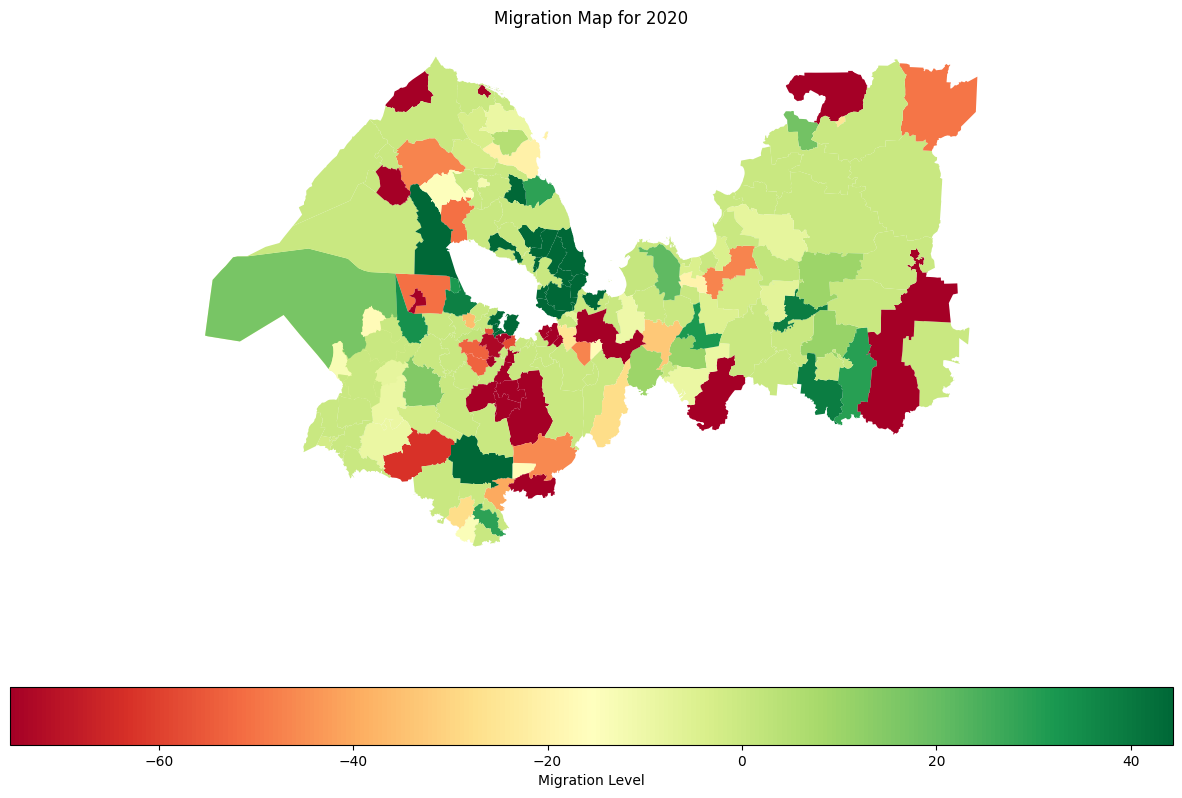

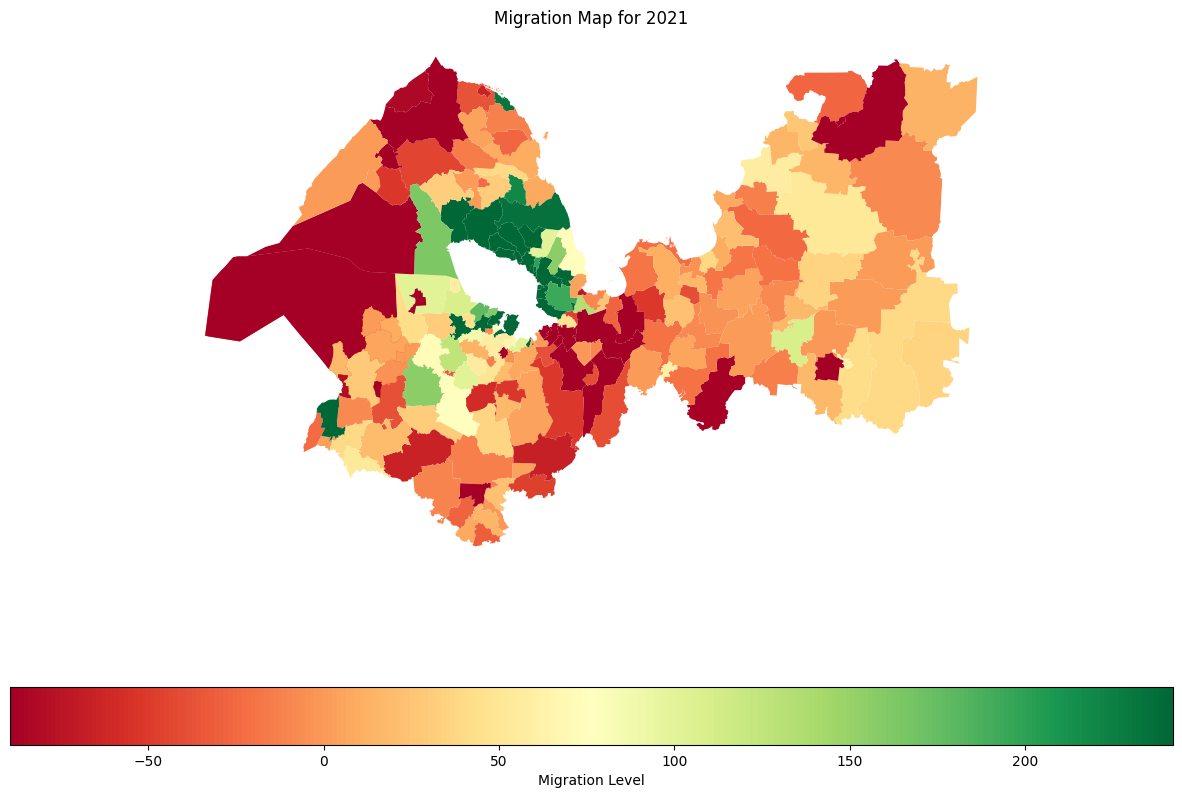

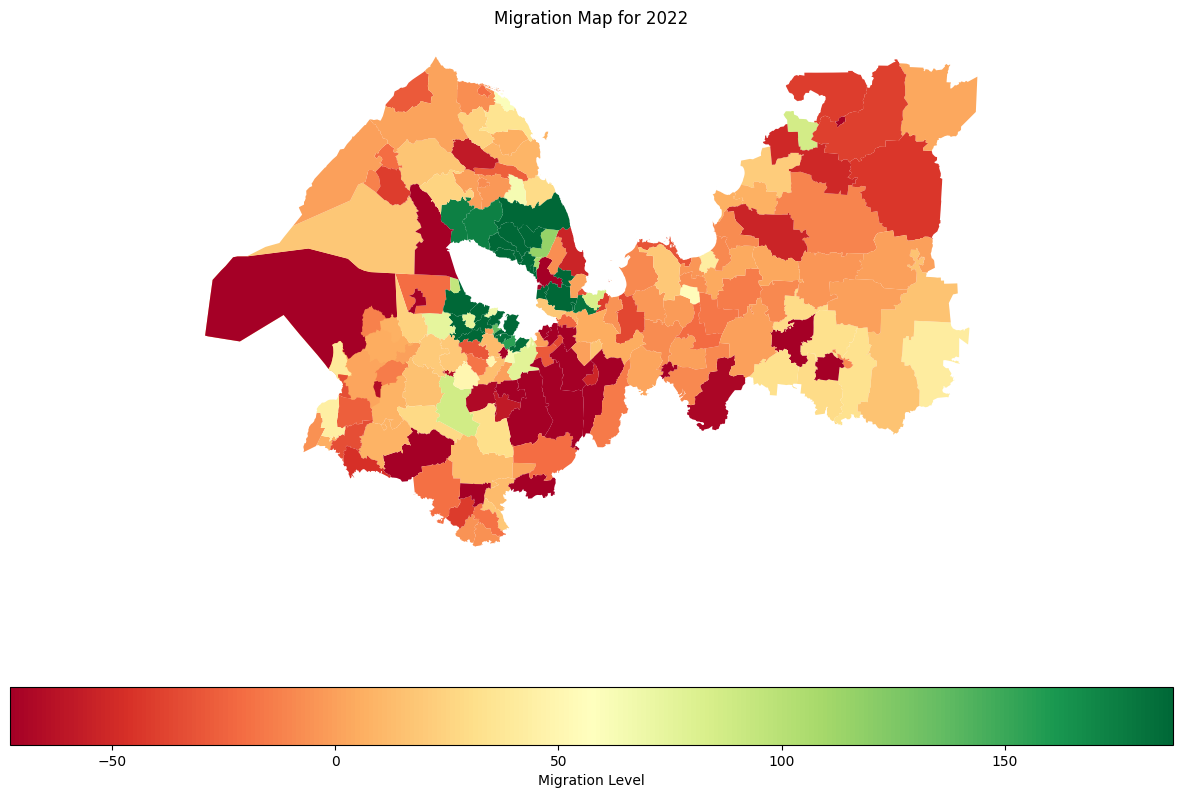

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def visualize_migration_map_gdf(gdf, year, max_value=None):
    column_name = f'migration_{year}'
    if column_name not in gdf.columns:
        print(f"Данные за {year} год не найдены.")
        return
    
    # Проверка и конвертация данных в числовой тип, если необходимо
    gdf[column_name] = pd.to_numeric(gdf[column_name], errors='coerce')

    # Обработка аномальных значений
    high_cutoff = gdf[column_name].quantile(0.9)  
    low_cutoff = gdf[column_name].quantile(0.1)
    if max_value is not None:
        high_cutoff = min(high_cutoff, max_value)  # Ограничение верхнего порога значением max_value
    gdf[column_name] = np.clip(gdf[column_name], low_cutoff, high_cutoff)

    # Установка цветовой схемы
    cmap = 'RdYlGn'  # Красный-Желтый-Зеленый цветовой градиент

    # Построение карты
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    gdf.plot(column=column_name, ax=ax, legend=True, cmap=cmap, legend_kwds={'label': "Migration Level", 'orientation': "horizontal"})
    plt.title(f'Migration Map for {year}')
    
    # Удаление рамки
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

# Пример вызова функции с возможностью задать максимальное значение:
years = ['2019', '2020', '2021', '2022']
max_migration_value = 600  # Максимальное значение миграции для визуализации
for year in years:
    visualize_migration_map_gdf(ter_gp, year, max_value=max_migration_value)



### Миграция МО

In [24]:
import pandas as pd

# Улучшенная функция нормализации названий
def normalize_name(name):
    name = name.lower().replace(' городской округ', '').replace(' муниципальный район', '')
    name = name.replace('тоснненский', 'тосненский')  # Пример специфической корректировки
    return name.strip()

# Применение функции нормализации
municipal_df['normalized_region'] = municipal_df['region'].apply(normalize_name)
ter_mo['normalized_name'] = ter_mo['name'].apply(normalize_name)

# Создание новых колонок для миграционных данных в ter_mo
for year in range(2019, 2023):
    ter_mo[f'migration_{year}'] = None

# Перенос данных
for index, row in municipal_df.iterrows():
    # Используем str.contains для более гибкого поиска
    # Убедитесь, что в вашем DataFrame нет дублирующихся нормализованных названий, иначе может возникнуть неоднозначность
    mask = ter_mo['normalized_name'].str.contains(row['normalized_region'], regex=False)
    for year in range(2019, 2023):
        ter_mo.loc[mask, f'migration_{year}'] = row[str(year)]

# Удаление временных колонок с нормализованными названиями
ter_mo.drop('normalized_name', axis=1, inplace=True)
municipal_df.drop('normalized_region', axis=1, inplace=True)

ter_mo




fid                                 name  \
0   200   Бокситогорский муниципальный район   
1   202    Кингисеппский муниципальный район   
2   201        Киришский муниципальный район   
3   207        Кировский муниципальный район   
4   203  Лодейнопольский муниципальный район   
5   204    Ломоносовский муниципальный район   
6   205     Подпорожский муниципальный район   
7   206      Приозерский муниципальный район   
8   188       Сосновоборский городской округ   
9   217      Волосовский муниципальный район   
10  215       Волховский муниципальный район   
11  210     Всеволожский муниципальный район   
12  211       Выборгский муниципальный район   
13  213       Гатчинский муниципальный район   
14  214          Лужский муниципальный район   
15  212      Сланцевский муниципальный район   
16  216       Тихвинский муниципальный район   
17  218      Тоснненский муниципальный район   

                                  layer    2019    2021    2022    2023  \
0    Бокситогорский муниципальный район   49256   48048   47236   50977   
1     Кингисеппский муниципальный район   76182   73714   72512   83838   
2         Киришский муниципальный район   62069   61474   60003   59877   
3         Кировский муниципальный район  105936  106077  104710  108460   
4   Лодейнопольский муниципальный район   28530   27651   27365   27548   
5     Ломоносовский муниципальный район   73475   78421   81817   85329   
6      Подпорожский муниципальный район   28263   27103   26547   25508   
7       Приозерский муниципальный район   61028   59903   59496   57047   
8        Сосновоборский городской округ   64121   67054   65941   64121   
9       Волосовский муниципальный район   51668   51587   51600   50211   
10       Волховский муниципальный район   51668   51587   51600   50211   
11     Всеволожский муниципальный район  398896  473514  506289  554288   
12       Выборгский муниципальный район  199571  195728  193863  195374   
13       Гатчинский муниципальный район  243156  232752  230324  261898   
14          Лужский муниципальный район   72035   70787   69153   67523   
15      Сланцевский муниципальный район   42494   42030   41931   45192   
16       Тихвинский муниципальный район   69567   68475   67768   66266   
17      Тоснненский муниципальный район  128327  123557  120734  133109   

      2020                                           geometry migration_2019  \
0    48625  POLYGON ((34.32777 59.19548, 34.32746 59.19544...          -99.0   
1    74881  POLYGON ((28.19187 59.32671, 28.19185 59.32673...         -812.0   
2    61474  POLYGON ((31.94327 59.42428, 31.93481 59.41883...         -128.0   
3   106016  MULTIPOLYGON (((31.91722 59.95916, 31.91717 59...          678.0   
4    28032  MULTIPOLYGON (((33.02438 60.72112, 33.06224 60...         -209.0   
5    76786  POLYGON ((29.45718 59.67313, 29.45392 59.67086...         3743.0   
6    27689  POLYGON ((33.77158 61.23326, 33.79156 61.23320...         -272.0   
7    60351  MULTIPOLYGON (((30.68940 60.50106, 30.68662 60...         -251.0   
8    67720  POLYGON ((29.17425 59.85037, 29.15581 59.84976...         -418.0   
9    51778  POLYGON ((28.98604 59.48401, 28.98321 59.48727...          397.0   
10   51778  MULTIPOLYGON (((32.84899 60.50379, 32.84623 60...         -173.0   
11  438607  MULTIPOLYGON (((30.55200 59.96912, 30.55246 59...        39719.0   
12  198226  POLYGON ((28.85880 60.04000, 28.82636 60.04088...         -210.0   
13  238034  POLYGON ((29.63372 59.57069, 29.63286 59.57065...        -3760.0   
14   75307  POLYGON ((29.74807 58.43754, 29.74811 58.43758...         -483.0   
15   42296  POLYGON ((28.55977 59.15308, 28.56023 59.15321...          273.0   
16   69457  POLYGON ((34.40750 60.15748, 34.41680 60.15734...          430.0   
17  126915  POLYGON ((30.68152 59.72665, 30.68134 59.72678...         -544.0   

   migration_2020 migration_2021 migration_2022  
0            15.0          -39.0           36.0  
1          -516.0         -229.0         -10

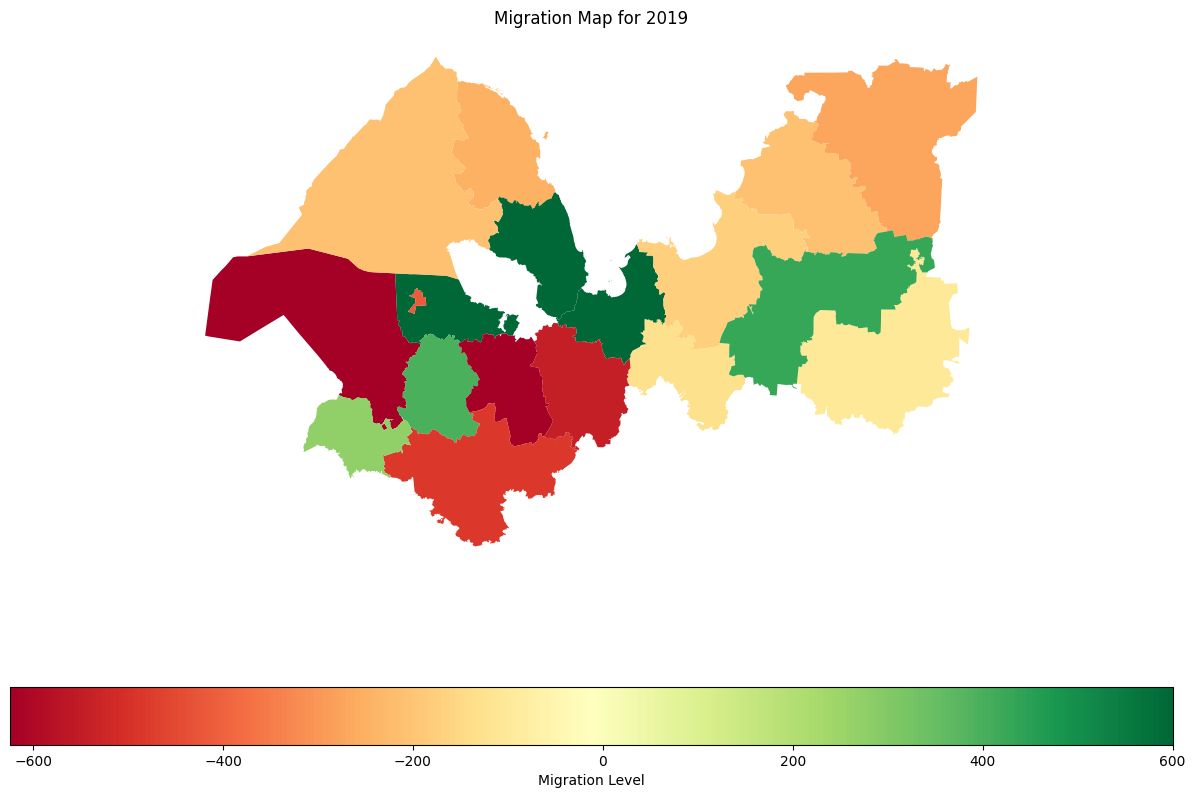

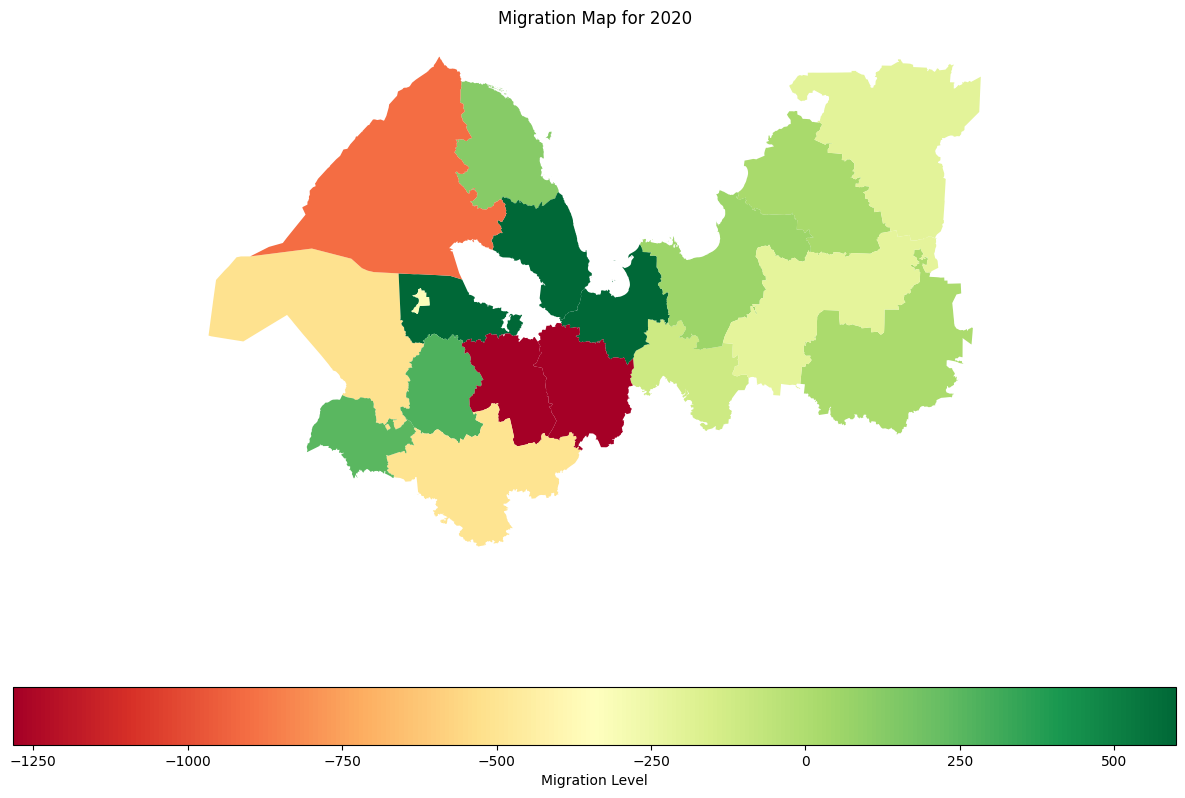

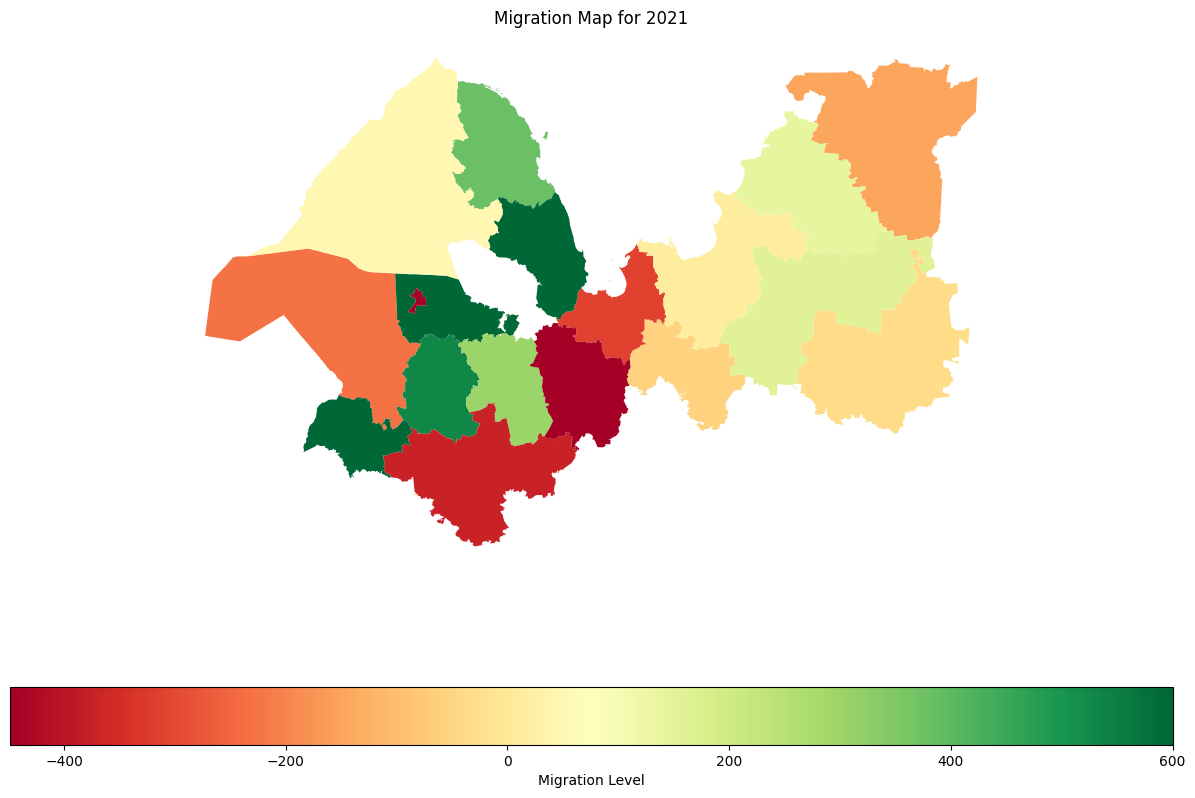

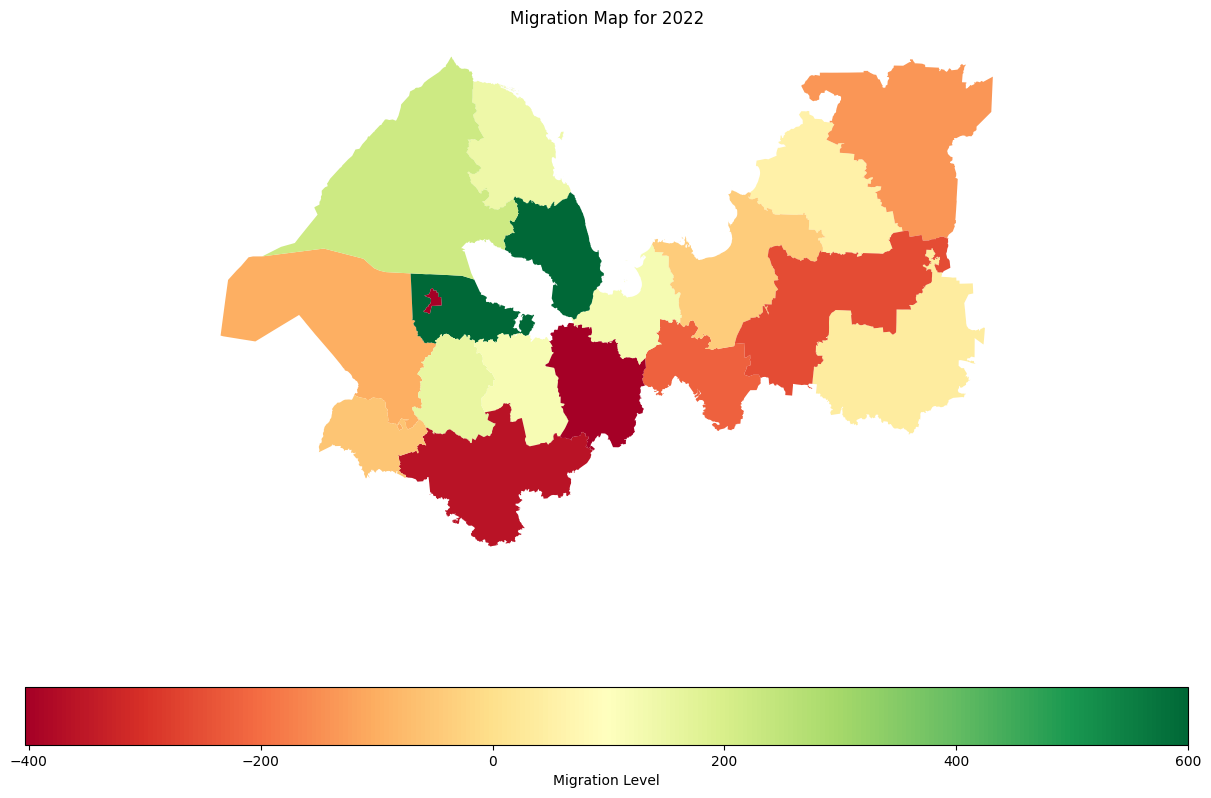

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def visualize_migration_map_gdf(gdf, year, max_value=None):
    column_name = f'migration_{year}'
    if column_name not in gdf.columns:
        print(f"Данные за {year} год не найдены.")
        return
    
    # Проверка и конвертация данных в числовой тип, если необходимо
    gdf[column_name] = pd.to_numeric(gdf[column_name], errors='coerce')

    # Обработка аномальных значений
    high_cutoff = gdf[column_name].quantile(0.9)  
    low_cutoff = gdf[column_name].quantile(0.1)
    if max_value is not None:
        high_cutoff = min(high_cutoff, max_value)  # Ограничение верхнего порога значением max_value
    gdf[column_name] = np.clip(gdf[column_name], low_cutoff, high_cutoff)

    # Установка цветовой схемы
    cmap = 'RdYlGn'  # Красный-Желтый-Зеленый цветовой градиент

    # Построение карты
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    gdf.plot(column=column_name, ax=ax, legend=True, cmap=cmap, legend_kwds={'label': "Migration Level", 'orientation': "horizontal"})
    plt.title(f'Migration Map for {year}')
    
    # Удаление рамки
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

# Пример вызова функции с возможностью задать максимальное значение:
years = ['2019', '2020', '2021', '2022']
max_migration_value = 600  # Максимальное значение миграции для визуализации
for year in years:
    visualize_migration_map_gdf(ter_mo, year, max_value=max_migration_value)




# Численность

### Численность МО

In [26]:
ter_mo

fid                                 name  \
0   200   Бокситогорский муниципальный район   
1   202    Кингисеппский муниципальный район   
2   201        Киришский муниципальный район   
3   207        Кировский муниципальный район   
4   203  Лодейнопольский муниципальный район   
5   204    Ломоносовский муниципальный район   
6   205     Подпорожский муниципальный район   
7   206      Приозерский муниципальный район   
8   188       Сосновоборский городской округ   
9   217      Волосовский муниципальный район   
10  215       Волховский муниципальный район   
11  210     Всеволожский муниципальный район   
12  211       Выборгский муниципальный район   
13  213       Гатчинский муниципальный район   
14  214          Лужский муниципальный район   
15  212      Сланцевский муниципальный район   
16  216       Тихвинский муниципальный район   
17  218      Тоснненский муниципальный район   

                                  layer    2019    2021    2022    2023  \
0    Бокситогорский муниципальный район   49256   48048   47236   50977   
1     Кингисеппский муниципальный район   76182   73714   72512   83838   
2         Киришский муниципальный район   62069   61474   60003   59877   
3         Кировский муниципальный район  105936  106077  104710  108460   
4   Лодейнопольский муниципальный район   28530   27651   27365   27548   
5     Ломоносовский муниципальный район   73475   78421   81817   85329   
6      Подпорожский муниципальный район   28263   27103   26547   25508   
7       Приозерский муниципальный район   61028   59903   59496   57047   
8        Сосновоборский городской округ   64121   67054   65941   64121   
9       Волосовский муниципальный район   51668   51587   51600   50211   
10       Волховский муниципальный район   51668   51587   51600   50211   
11     Всеволожский муниципальный район  398896  473514  506289  554288   
12       Выборгский муниципальный район  199571  195728  193863  195374   
13       Гатчинский муниципальный район  243156  232752  230324  261898   
14          Лужский муниципальный район   72035   70787   69153   67523   
15      Сланцевский муниципальный район   42494   42030   41931   45192   
16       Тихвинский муниципальный район   69567   68475   67768   66266   
17      Тоснненский муниципальный район  128327  123557  120734  133109   

      2020                                           geometry  migration_2019  \
0    48625  POLYGON ((34.32777 59.19548, 34.32746 59.19544...           -99.0   
1    74881  POLYGON ((28.19187 59.32671, 28.19185 59.32673...          -624.4   
2    61474  POLYGON ((31.94327 59.42428, 31.93481 59.41883...          -128.0   
3   106016  MULTIPOLYGON (((31.91722 59.95916, 31.91717 59...           600.0   
4    28032  MULTIPOLYGON (((33.02438 60.72112, 33.06224 60...          -209.0   
5    76786  POLYGON ((29.45718 59.67313, 29.45392 59.67086...           600.0   
6    27689  POLYGON ((33.77158 61.23326, 33.79156 61.23320...          -272.0   
7    60351  MULTIPOLYGON (((30.68940 60.50106, 30.68662 60...          -251.0   
8    67720  POLYGON ((29.17425 59.85037, 29.15581 59.84976...          -418.0   
9    51778  POLYGON ((28.98604 59.48401, 28.98321 59.48727...           397.0   
10   51778  MULTIPOLYGON (((32.84899 60.50379, 32.84623 60...          -173.0   
11  438607  MULTIPOLYGON (((30.55200 59.96912, 30.55246 59...           600.0   
12  198226  POLYGON ((28.85880 60.04000, 28.82636 60.04088...          -210.0   
13  238034  POLYGON ((29.63372 59.57069, 29.63286 59.57065...          -624.4   
14   75307  POLYGON ((29.74807 58.43754, 29.74811 58.43758...          -483.0   
15   42296  POLYGON ((28.55977 59.15308, 28.56023 59.15321...           273.0   
16   69457  POLYGON ((34.40750 60.15748, 34.41680 60.15734...           430.0   
17  126915  POLYGON ((30.68152 59.72665, 30.68134 59.72678...          -544.0   

    migration_2020  migration_2021  migration_2022  
0             15.0           -39.0            36.0  
1           -516.0 

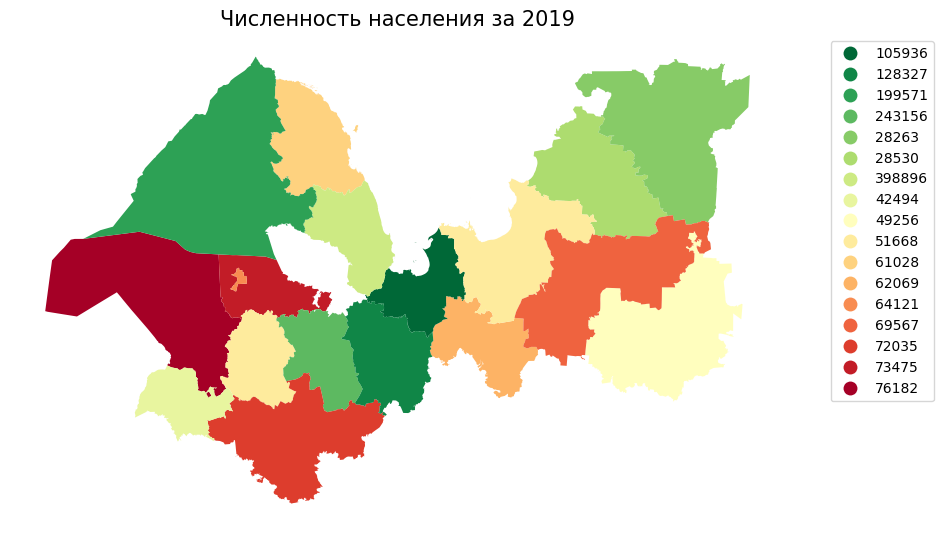

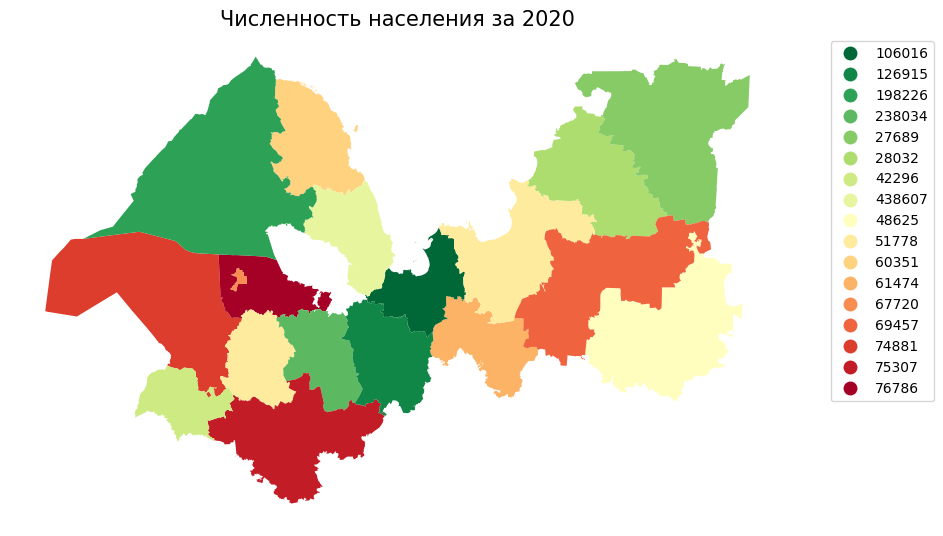

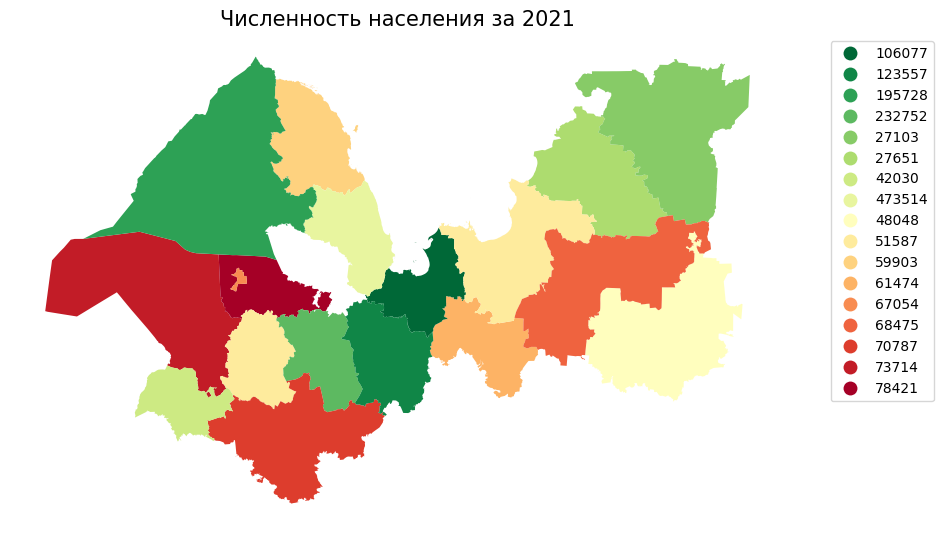

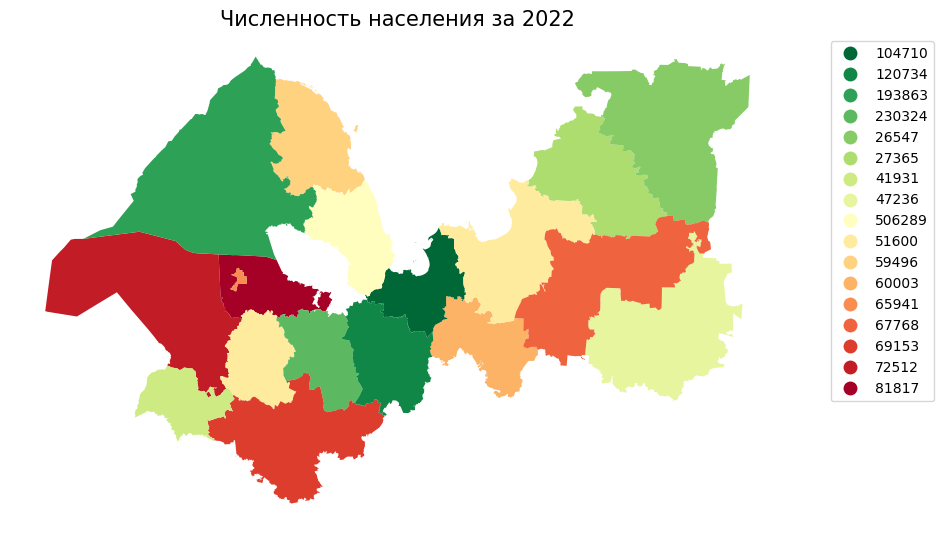

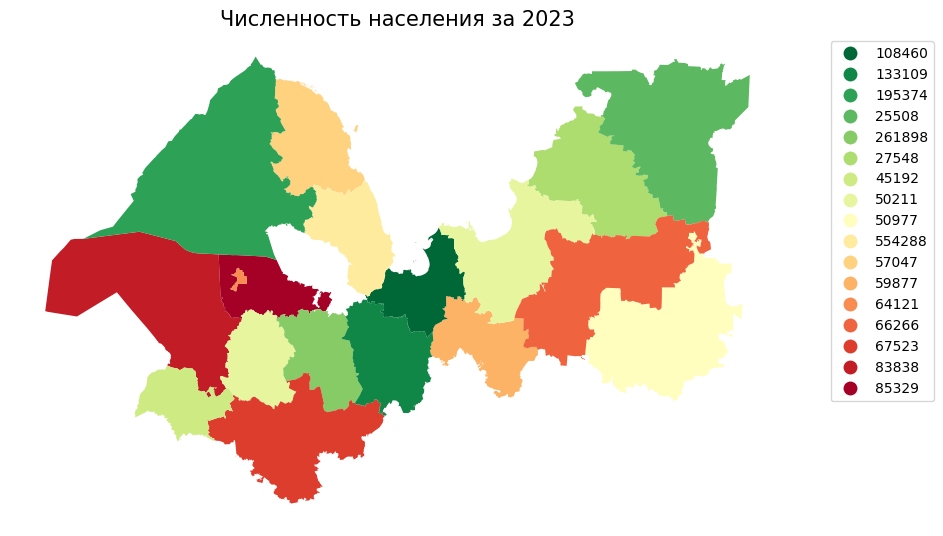

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Предполагаем, что gdf уже загружен и содержит столбцы 'geometry' и данные за годы

# Список годов для визуализации
years = ['2019', '2020', '2021', '2022', '2023']

# Создаем отдельные картинки для каждого года
for year in years:
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    # Визуализация с измененной цветовой шкалой
    ter_mo.plot(column=year, ax=ax, legend=True, cmap='RdYlGn_r', 
             legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left', 'prop': {'size': 10}})
    ax.set_title(f'Численность населения за {year}', fontsize=15)
    ax.set_axis_off()  # Убираем рамку и оси координат
    plt.show()


### Численность ГП

In [28]:
ter_gp= gpd.read_file('data/Границы+население/Границы только ГП и СП.geojson')
ter_gp['geometry'] = ter_gp.geometry.apply(lambda x: x.difference(water.unary_union))
ter_gp = ter_gp.dropna(axis=1, how='all')

ter_gp

fid                                name  \
0      7     Самойловское сельское поселение   
1      2   Большедворское сельское поселение   
2      6     Пикалевское городское поселение   
3      3          Борское сельское поселение   
4      1  Бокситогорское городское поселение   
..   ...                                 ...   
183  185     Фёдоровское городское поселение   
184  179       Нурминское сельское поселение   
185  175   Красноборское городское поселение   
186  183  Трубникоборское сельское поселение   
187  176        Лисинское сельское поселение   

                                  layer   2019   2021   2022   2023   2020  \
0    Бокситогорский муниципальный район   2069   2085   2096   2154   2088   
1    Бокситогорский муниципальный район   1575   1505   1486   1698   1528   
2    Бокситогорский муниципальный район  19981  19490  19250  20169  19746   
3    Бокситогорский муниципальный район   3312   3301   3272   3393   3279   
4    Бокситогорский муниципальный район  15370  15088  14606  15960  15200   
..                                  ...    ...    ...    ...    ...    ...   
183     Тоснненский муниципальный район   4460   4450   4562   6083   4536   
184     Тоснненский муниципальный район   3127   3018   2977   3354   3090   
185     Тоснненский муниципальный район   5145   4825   4657   4507   5006   
186     Тоснненский муниципальный район   1603   1541   1479   1620   1583   
187     Тоснненский муниципальный район   1984   1789   1703   1919   1856   

                                              geometry  
0    POLYGON ((34.42428 59.67150, 34.42548 59.66226...  
1    POLYGON ((34.30791 59.71295, 34.30701 59.71290...  
2    POLYGON ((34.13616 59.49064, 34.13765 59.49429...  
3    POLYGON ((34.06007 59.14658, 34.05620 59.14430...  
4    POLYGON ((34.05535 59.40393, 34.05026 59.40426...  
..                                                 ...  
183  POLYGON ((30.52316 59.69108, 30.52335 59.69094...  
184  POLYGON ((31.01394 59.63327, 31.01824 59.63223...  
185  POLYGON ((30.58367 59.65002, 30.58381 59.65022...  
186  POLYGON ((31.13522 59.09693, 31.13672 59.09956...  
187  POLYGON ((30.59899 59.48310, 30.59966 59.48256...  

[188 rows x 9 columns]

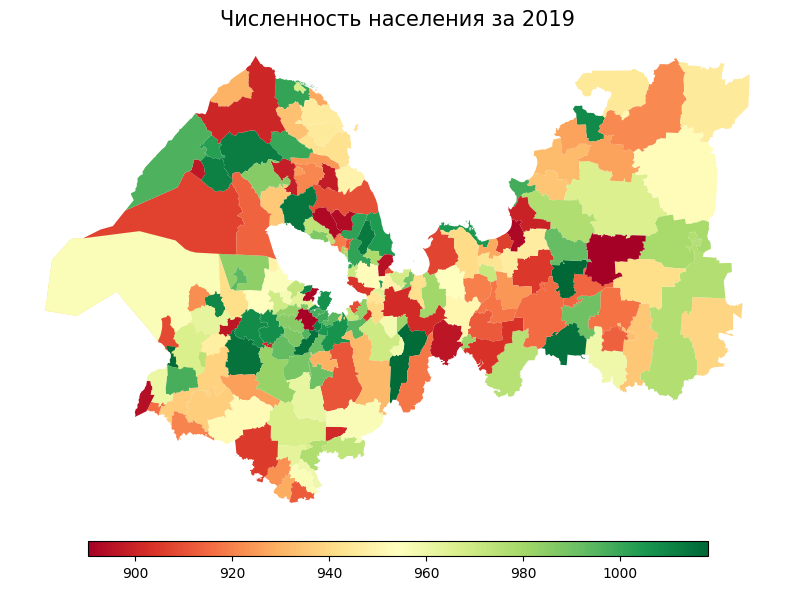

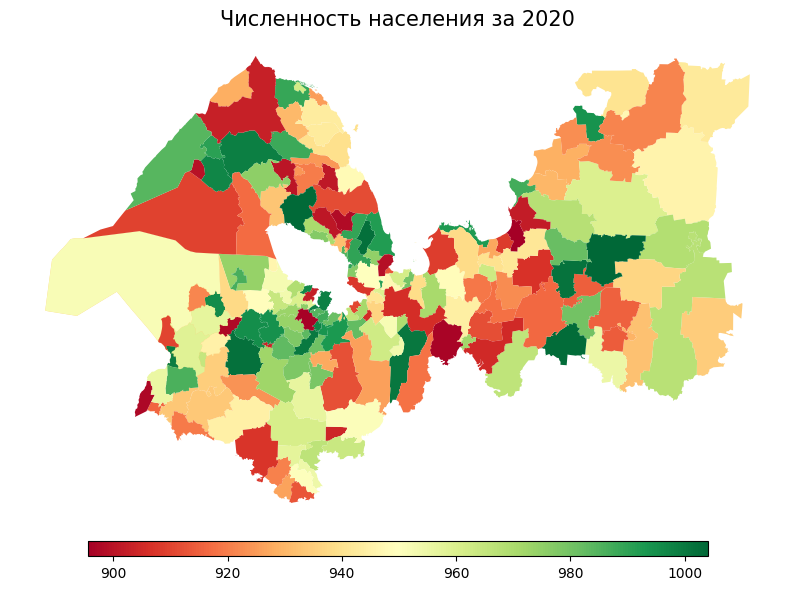

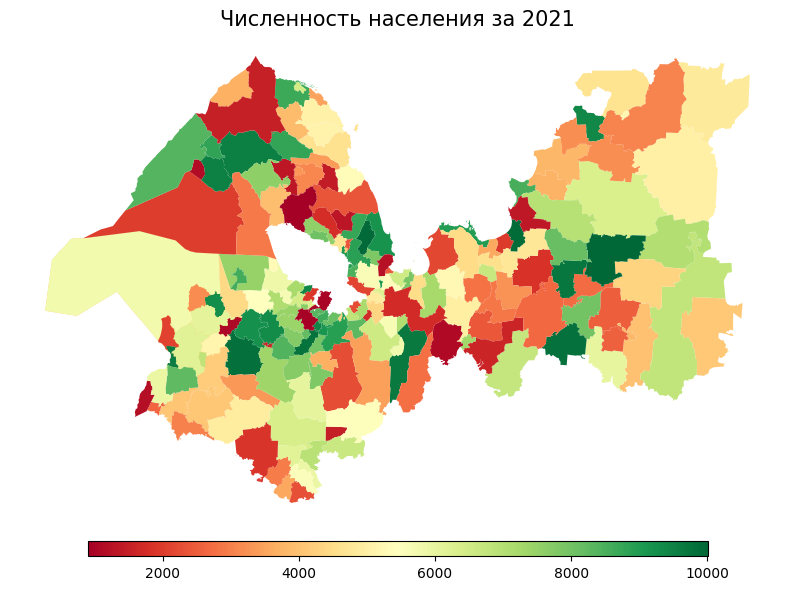

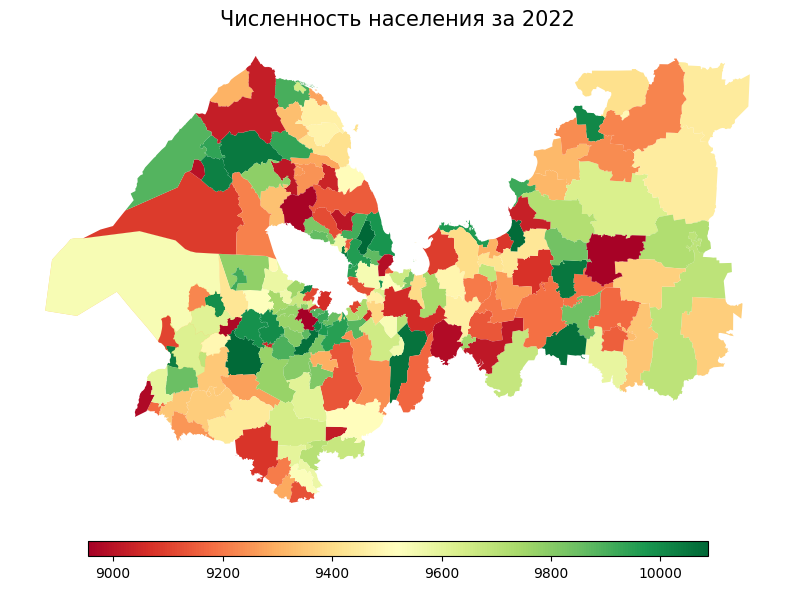

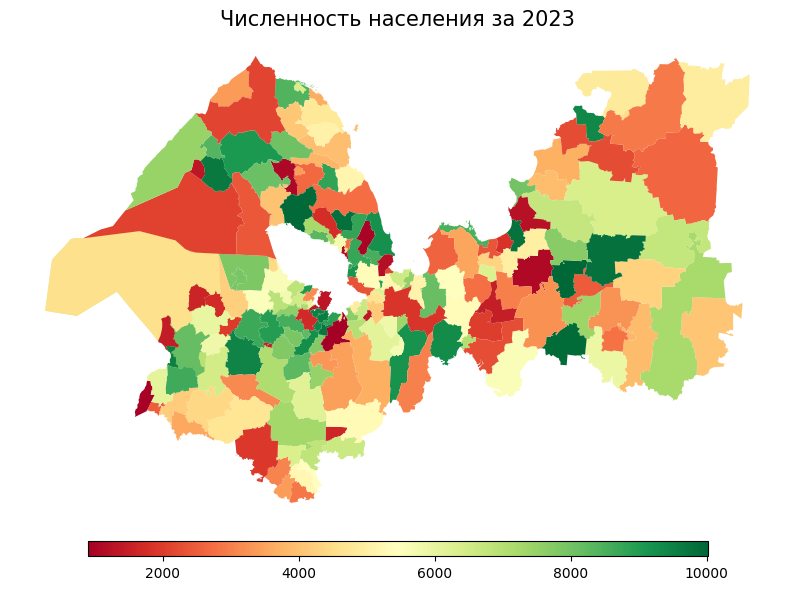

In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

# Предполагаем, что gdf уже загружен и содержит столбцы 'geometry' и данные за годы

# Список годов для визуализации
years = ['2019', '2020', '2021', '2022', '2023']

# Создаем отдельные картинки для каждого года
for year in years:
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    # Визуализация карты
    ter_gp.plot(column=year, ax=ax, cmap='RdYlGn')

    # Создаем непрерывную цветовую шкалу
    norm = Normalize(vmin=ter_gp[year].min(), vmax=ter_gp[year].max())
    sm = cm.ScalarMappable(cmap='RdYlGn', norm=norm)
    sm._A = []  # массив для ScalarMappable
    fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.8, aspect=40, pad=0.02)

    ax.set_title(f'Численность населения за {year}', fontsize=15)
    ax.set_axis_off()  # Убираем рамку и оси координат
    plt.show()


# Плотность

### Плотность ГП

In [30]:
import geopandas as gpd
import pandas as pd
import numpy as np

ter_gp= gpd.read_file('data/Границы+население/Границы только ГП и СП.geojson')
ter_gp['geometry'] = ter_gp.geometry.apply(lambda x: x.difference(water.unary_union))
ter_gp = ter_gp.dropna(axis=1, how='all')

ter_gp

fid                                name  \
0      7     Самойловское сельское поселение   
1      2   Большедворское сельское поселение   
2      6     Пикалевское городское поселение   
3      3          Борское сельское поселение   
4      1  Бокситогорское городское поселение   
..   ...                                 ...   
183  185     Фёдоровское городское поселение   
184  179       Нурминское сельское поселение   
185  175   Красноборское городское поселение   
186  183  Трубникоборское сельское поселение   
187  176        Лисинское сельское поселение   

                                  layer   2019   2021   2022   2023   2020  \
0    Бокситогорский муниципальный район   2069   2085   2096   2154   2088   
1    Бокситогорский муниципальный район   1575   1505   1486   1698   1528   
2    Бокситогорский муниципальный район  19981  19490  19250  20169  19746   
3    Бокситогорский муниципальный район   3312   3301   3272   3393   3279   
4    Бокситогорский муниципальный район  15370  15088  14606  15960  15200   
..                                  ...    ...    ...    ...    ...    ...   
183     Тоснненский муниципальный район   4460   4450   4562   6083   4536   
184     Тоснненский муниципальный район   3127   3018   2977   3354   3090   
185     Тоснненский муниципальный район   5145   4825   4657   4507   5006   
186     Тоснненский муниципальный район   1603   1541   1479   1620   1583   
187     Тоснненский муниципальный район   1984   1789   1703   1919   1856   

                                              geometry  
0    POLYGON ((34.42428 59.67150, 34.42548 59.66226...  
1    POLYGON ((34.30791 59.71295, 34.30701 59.71290...  
2    POLYGON ((34.13616 59.49064, 34.13765 59.49429...  
3    POLYGON ((34.06007 59.14658, 34.05620 59.14430...  
4    POLYGON ((34.05535 59.40393, 34.05026 59.40426...  
..                                                 ...  
183  POLYGON ((30.52316 59.69108, 30.52335 59.69094...  
184  POLYGON ((31.01394 59.63327, 31.01824 59.63223...  
185  POLYGON ((30.58367 59.65002, 30.58381 59.65022...  
186  POLYGON ((31.13522 59.09693, 31.13672 59.09956...  
187  POLYGON ((30.59899 59.48310, 30.59966 59.48256...  

[188 rows x 9 columns]

In [31]:


# Переводим данные за каждый год в числовой тип, заменяем некорректные значения на NaN, затем на 0
for year in ['2019', '2020', '2021', '2022', '2023']:
    ter_gp[year] = pd.to_numeric(ter_gp[year], errors='coerce').fillna(0)

# Проверка и корректировка проекции для расчета площади, если необходимо
ter_gp = ter_gp.to_crs(epsg=32636) # Пример перевода в метрическую проекцию

# Вычисление площади в квадратных километрах
ter_gp['area_sq_km'] = ter_gp['geometry'].area / 10**6

# Расчет плотности населения для каждого года
for year in ['2019', '2020', '2021', '2022', '2023']:
    ter_gp[f'density_{year}'] = ter_gp[year] / ter_gp['area_sq_km']


In [32]:
columns_to_drop = ['2019', '2021', '2022', '2023', '2020']  # Замените на имена столбцов, которые нужно удалить

# Создание нового GeoDataFrame без указанных столбцов
gp_desteny = ter_gp.drop(columns=columns_to_drop)
gp_desteny
# gp_desteny.to_file("gp_desteny.geojson", driver='GeoJSON')


fid                                name  \
0      7     Самойловское сельское поселение   
1      2   Большедворское сельское поселение   
2      6     Пикалевское городское поселение   
3      3          Борское сельское поселение   
4      1  Бокситогорское городское поселение   
..   ...                                 ...   
183  185     Фёдоровское городское поселение   
184  179       Нурминское сельское поселение   
185  175   Красноборское городское поселение   
186  183  Трубникоборское сельское поселение   
187  176        Лисинское сельское поселение   

                                  layer  \
0    Бокситогорский муниципальный район   
1    Бокситогорский муниципальный район   
2    Бокситогорский муниципальный район   
3    Бокситогорский муниципальный район   
4    Бокситогорский муниципальный район   
..                                  ...   
183     Тоснненский муниципальный район   
184     Тоснненский муниципальный район   
185     Тоснненский муниципальный район   
186     Тоснненский муниципальный район   
187     Тоснненский муниципальный район   

                                              geometry   area_sq_km  \
0    POLYGON ((580225.344 6615688.034, 580314.653 6...   957.967302   
1    POLYGON ((573579.919 6620168.561, 573529.368 6...   731.047141   
2    POLYGON ((564341.814 6595236.808, 564419.334 6...    44.305614   
3    POLYGON ((560642.857 6556855.275, 560425.475 6...   698.933242   
4    POLYGON ((559919.213 6585506.706, 559629.306 6...   260.278008   
..                                                 ...          ...   
183  POLYGON ((360583.132 6619610.835, 360592.826 6...    52.445342   
184  POLYGON ((388009.665 6612245.473, 388248.460 6...   137.025009   
185  POLYGON ((363821.597 6614914.660, 363830.478 6...    81.472074   
186  POLYGON ((393174.409 6552337.634, 393268.230 6...   711.384945   
187  POLYGON ((364013.066 6596302.633, 364048.768 6...  1037.058781   

     density_2019  density_2020  density_2021  density_2022  density_2023  
0        2.159781      2.179615      2.176483      2.187966      2.248511  
1        2.154444      2.090152      2.058691      2.032701      2.322696  
2      450.981227    445.677159    439.899110    434.482189    455.224482  
3        4.738650      4.691435      4.722912      4.681420      4.854541  
4       59.052242     58.399094     57.968785     56.116919     61.319049  
..            ...           ...           ...           ...           ...  
183     85.040918     86.490046     84.850243     86.985800    115.987422  
184     22.820652     22.550628     22.025176     21.725961     24.477283  
185     63.150473     61.444366     59.222746     57.160690     55.319568  
186      2.253351      2.225237      2.166197      2.079043      2.277248  
187      1.913103      1.789677      1.725071      1.642144      1.850425  

[188 rows x 10 columns]

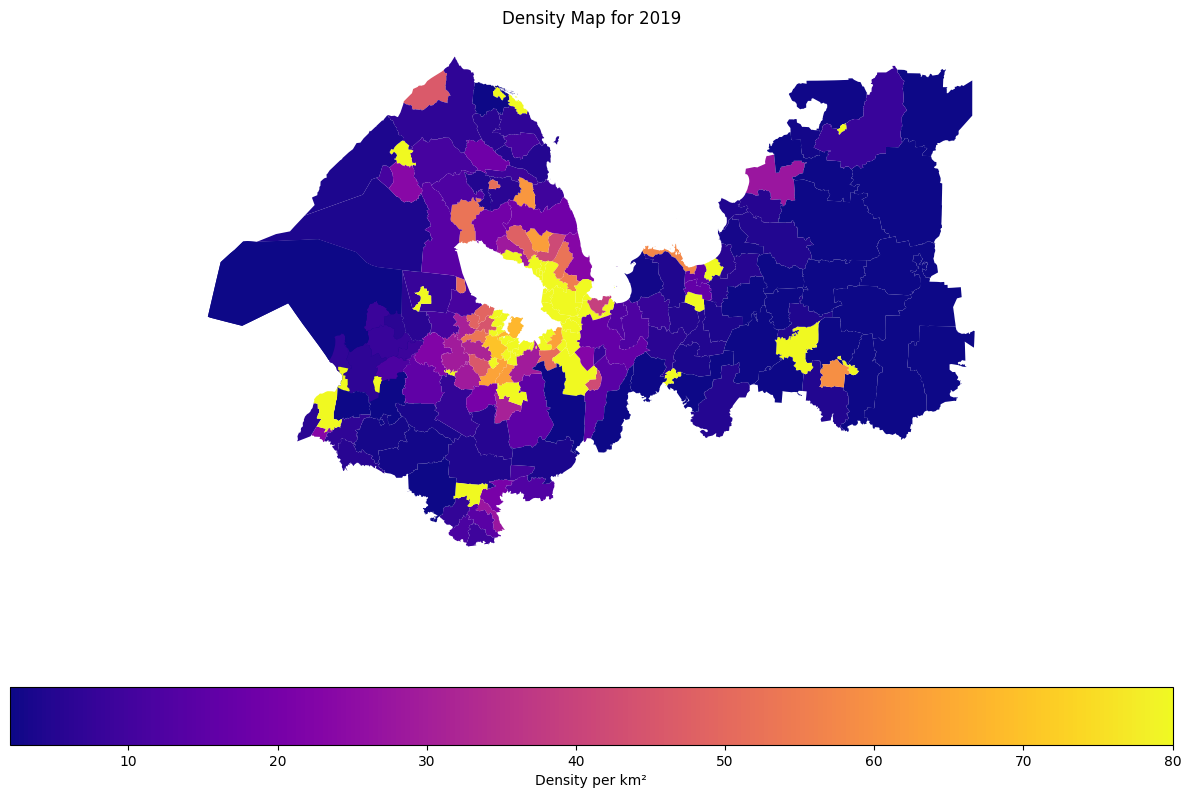

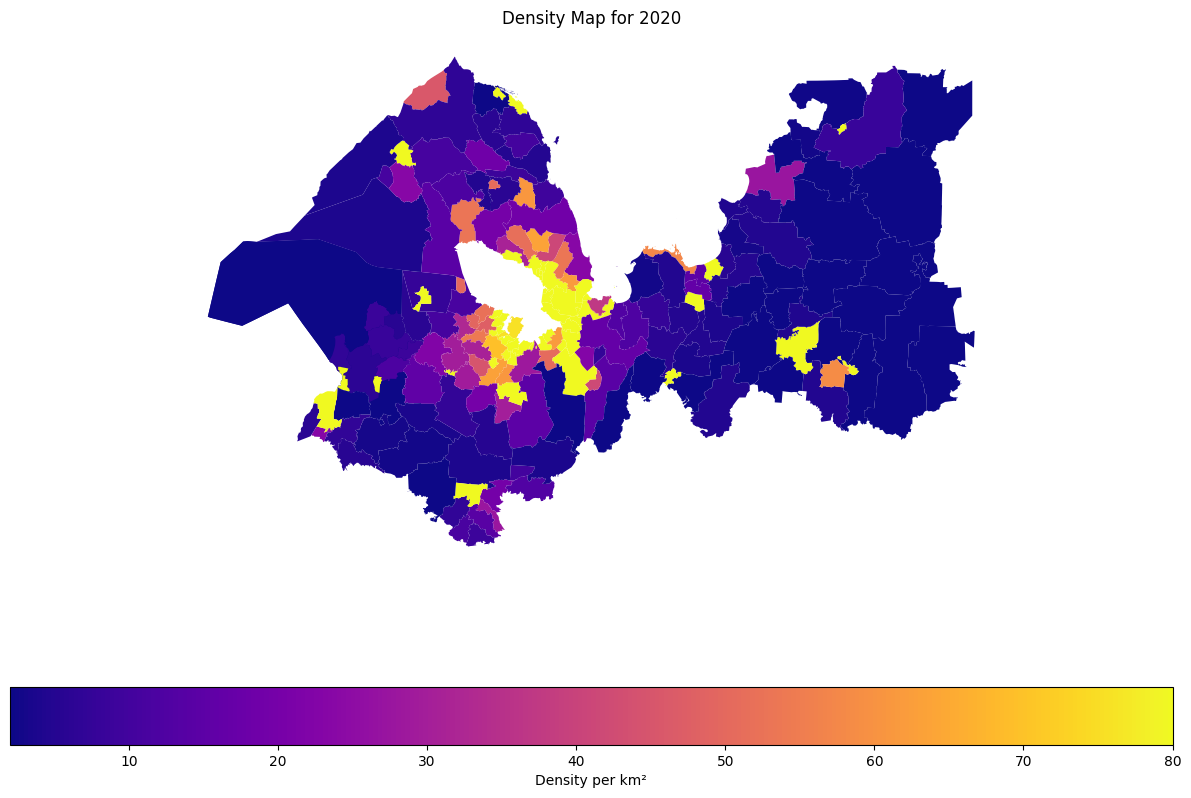

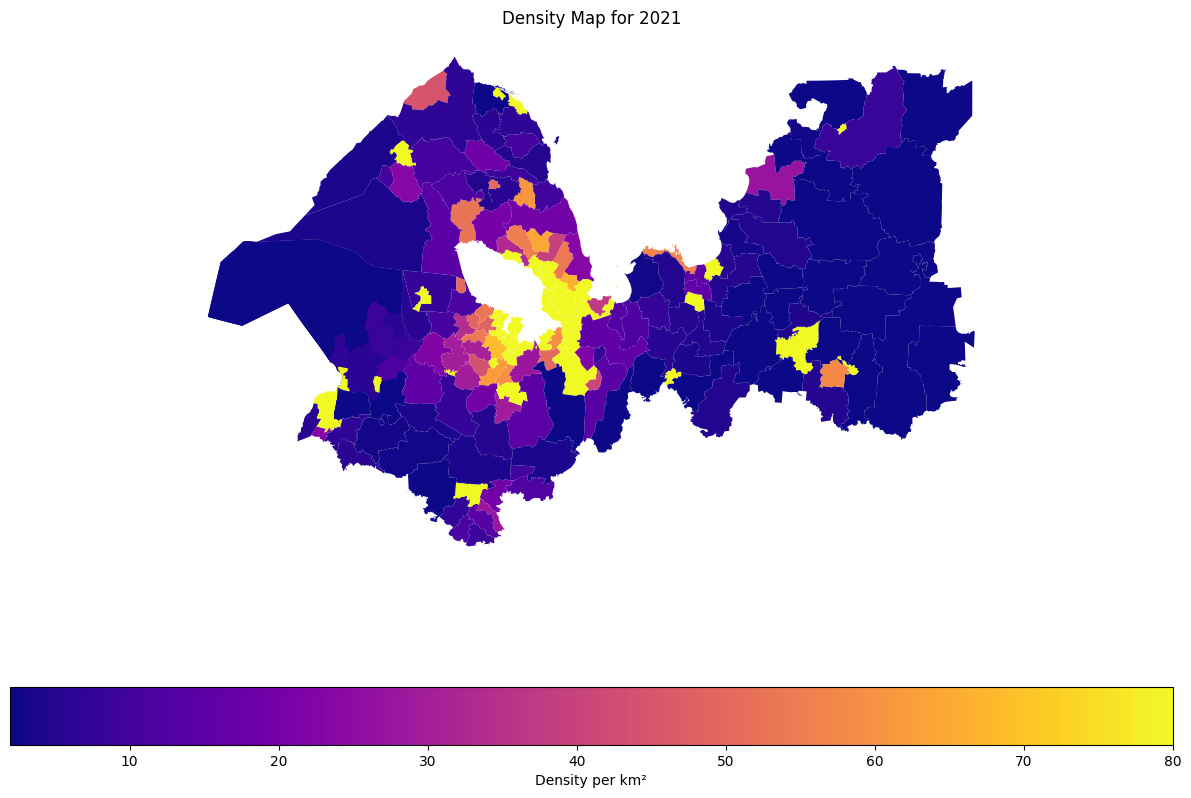

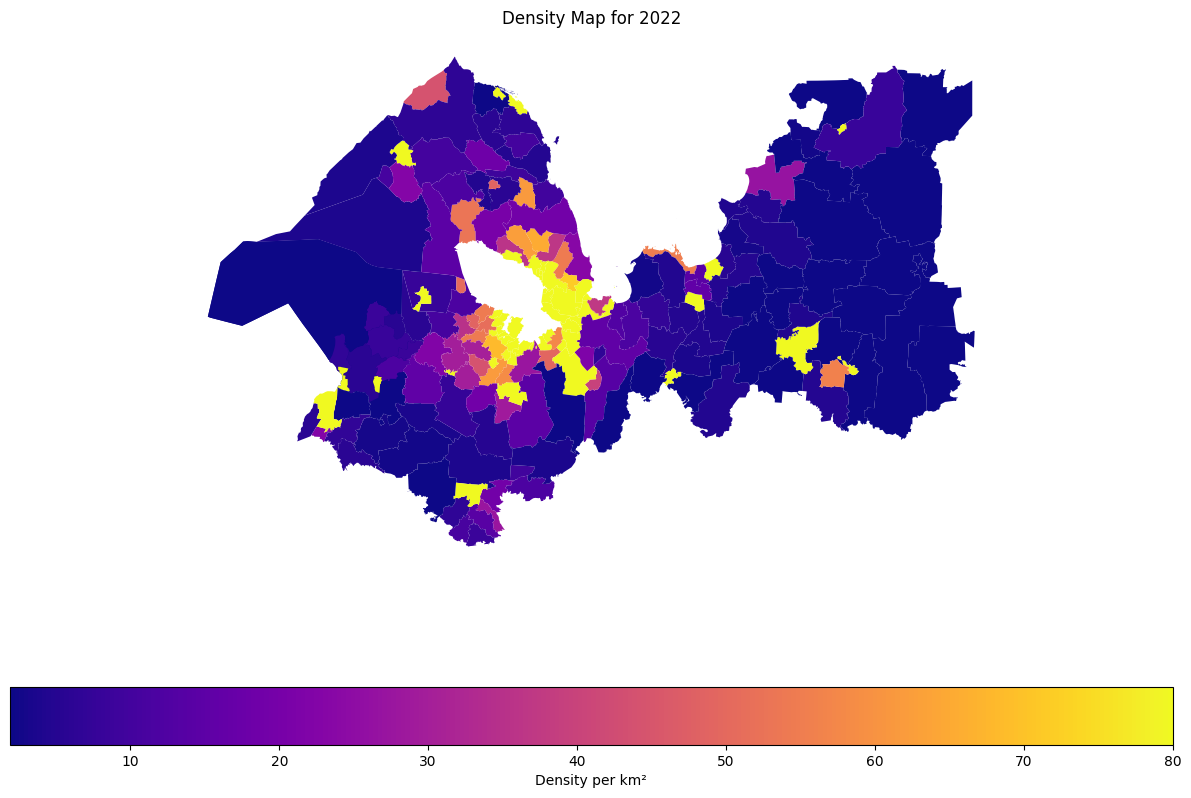

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

def visualize_density_map(data, year, max_value=None):
    column_name = f'density_{year}'
    if column_name not in data.columns:
        print(f"Данные по плотности населения за {year} год не найдены.")
        return
    
    # Нормализация данных плотности, использование квантилей для цветовой шкалы
    q_low = data[column_name].quantile(0.1)
    q_high = data[column_name].quantile(0.9)
    
    # Позволяет пользователю задавать максимальное значение для нормализации
    if max_value is not None:
        q_high = min(q_high, max_value)

    norm = plt.Normalize(vmin=q_low, vmax=q_high)

    # Установка цветовой схемы
    cmap = 'plasma'  # Изменена на plasma для лучшего представления данных

    # Построение карты
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    data.plot(column=column_name, ax=ax, legend=True, cmap=cmap, norm=norm,
             legend_kwds={'label': "Density per km²", 'orientation': "horizontal"})
    
    # Убрать рамку
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.title(f'Density Map for {year}')
    plt.show()

# Пример вызова функции с максимальным значением:
years = ['2019', '2020', '2021', '2022']
max_density = 80  # Пример максимального значения плотности, которое вы можете задать
for year in years:
    visualize_density_map(ter_gp, year, max_value=max_density)


### Плотность МО

In [34]:
ter_mo= gpd.read_file('data/Границы+население/Границы только МР.geojson')
ter_mo['geometry'] = ter_mo.geometry.apply(lambda x: x.difference(water.unary_union))
ter_mo = ter_mo.dropna(axis=1, how='all')
ter_mo

fid                                 name  \
0   200   Бокситогорский муниципальный район   
1   202    Кингисеппский муниципальный район   
2   201        Киришский муниципальный район   
3   207        Кировский муниципальный район   
4   203  Лодейнопольский муниципальный район   
5   204    Ломоносовский муниципальный район   
6   205     Подпорожский муниципальный район   
7   206      Приозерский муниципальный район   
8   188       Сосновоборский городской округ   
9   217      Волосовский муниципальный район   
10  215       Волховский муниципальный район   
11  210     Всеволожский муниципальный район   
12  211       Выборгский муниципальный район   
13  213       Гатчинский муниципальный район   
14  214          Лужский муниципальный район   
15  212      Сланцевский муниципальный район   
16  216       Тихвинский муниципальный район   
17  218      Тоснненский муниципальный район   

                                  layer    2019    2021    2022    2023  \
0    Бокситогорский муниципальный район   49256   48048   47236   50977   
1     Кингисеппский муниципальный район   76182   73714   72512   83838   
2         Киришский муниципальный район   62069   61474   60003   59877   
3         Кировский муниципальный район  105936  106077  104710  108460   
4   Лодейнопольский муниципальный район   28530   27651   27365   27548   
5     Ломоносовский муниципальный район   73475   78421   81817   85329   
6      Подпорожский муниципальный район   28263   27103   26547   25508   
7       Приозерский муниципальный район   61028   59903   59496   57047   
8        Сосновоборский городской округ   64121   67054   65941   64121   
9       Волосовский муниципальный район   51668   51587   51600   50211   
10       Волховский муниципальный район   51668   51587   51600   50211   
11     Всеволожский муниципальный район  398896  473514  506289  554288   
12       Выборгский муниципальный район  199571  195728  193863  195374   
13       Гатчинский муниципальный район  243156  232752  230324  261898   
14          Лужский муниципальный район   72035   70787   69153   67523   
15      Сланцевский муниципальный район   42494   42030   41931   45192   
16       Тихвинский муниципальный район   69567   68475   67768   66266   
17      Тоснненский муниципальный район  128327  123557  120734  133109   

      2020                                           geometry  
0    48625  POLYGON ((34.32777 59.19548, 34.32746 59.19544...  
1    74881  POLYGON ((28.19187 59.32671, 28.19185 59.32673...  
2    61474  POLYGON ((31.94327 59.42428, 31.93481 59.41883...  
3   106016  MULTIPOLYGON (((31.91722 59.95916, 31.91717 59...  
4    28032  MULTIPOLYGON (((33.02438 60.72112, 33.06224 60...  
5    76786  POLYGON ((29.45718 59.67313, 29.45392 59.67086...  
6    27689  POLYGON ((33.77158 61.23326, 33.79156 61.23320...  
7    60351  MULTIPOLYGON (((30.68940 60.50106, 30.68662 60...  
8    67720  POLYGON ((29.17425 59.85037, 29.15581 59.84976...  
9    51778  POLYGON ((28.98604 59.48401, 28.98321 59.48727...  
10   51778  MULTIPOLYGON (((32.84899 60.50379, 32.84623 60...  
11  438607  MULTIPOLYGON (((30.55200 59.96912, 30.55246 59...  
12  198226  POLYGON ((28.85880 60.04000, 28.82636 60.04088...  
13  238034  POLYGON ((29.63372 59.57069, 29.63286 59.57065...  
14   75307  POLYGON ((29.74807 58.43754, 29.74811 58.43758...  
15   42296  POLYGON ((28.55977 59.15308, 28.56023 59.15321...  
16   69457  POLYGON ((34.40750 60.15748, 34.41680 60.15734...  
17  126915  POLYGON ((30.68152 59.72665, 30.68134 59.72678...

In [35]:

# Переводим данные за каждый год в числовой тип, заменяем некорректные значения на NaN, затем на 0
for year in ['2019', '2020', '2021', '2022', '2023']:
    ter_mo[year] = pd.to_numeric(ter_mo[year], errors='coerce').fillna(0)

# Проверка и корректировка проекции для расчета площади, если необходимо
ter_mo = ter_mo.to_crs(epsg=32636) # Пример перевода в метрическую проекцию

# Вычисление площади в квадратных километрах
ter_mo['area_sq_km'] = ter_mo['geometry'].area / 10**6

# Расчет плотности населения для каждого года
for year in ['2019', '2020', '2021', '2022', '2023']:
    ter_mo[f'density_{year}'] = ter_mo[year] / ter_mo['area_sq_km']



In [36]:
columns_to_drop = ['2019', '2021', '2022', '2023', '2020']  # Замените на имена столбцов, которые нужно удалить

# Создание нового GeoDataFrame без указанных столбцов
mo_desteny = ter_mo.drop(columns=columns_to_drop)
# mo_desteny.to_file("mo_desteny.geojson", driver='GeoJSON')
mo_desteny

fid                                 name  \
0   200   Бокситогорский муниципальный район   
1   202    Кингисеппский муниципальный район   
2   201        Киришский муниципальный район   
3   207        Кировский муниципальный район   
4   203  Лодейнопольский муниципальный район   
5   204    Ломоносовский муниципальный район   
6   205     Подпорожский муниципальный район   
7   206      Приозерский муниципальный район   
8   188       Сосновоборский городской округ   
9   217      Волосовский муниципальный район   
10  215       Волховский муниципальный район   
11  210     Всеволожский муниципальный район   
12  211       Выборгский муниципальный район   
13  213       Гатчинский муниципальный район   
14  214          Лужский муниципальный район   
15  212      Сланцевский муниципальный район   
16  216       Тихвинский муниципальный район   
17  218      Тоснненский муниципальный район   

                                  layer  \
0    Бокситогорский муниципальный район   
1     Кингисеппский муниципальный район   
2         Киришский муниципальный район   
3         Кировский муниципальный район   
4   Лодейнопольский муниципальный район   
5     Ломоносовский муниципальный район   
6      Подпорожский муниципальный район   
7       Приозерский муниципальный район   
8        Сосновоборский городской округ   
9       Волосовский муниципальный район   
10       Волховский муниципальный район   
11     Всеволожский муниципальный район   
12       Выборгский муниципальный район   
13       Гатчинский муниципальный район   
14          Лужский муниципальный район   
15      Сланцевский муниципальный район   
16       Тихвинский муниципальный район   
17      Тоснненский муниципальный район   

                                             geometry    area_sq_km  \
0   POLYGON ((575847.419 6562573.945, 575829.774 6...   7262.338517   
1   POLYGON ((226537.507 6586309.598, 226536.599 6...   8732.102542   
2   POLYGON ((440038.819 6587773.334, 439548.949 6...   3063.683851   
3   MULTIPOLYGON (((439532.402 6647357.552, 439527...   2599.468837   
4   MULTIPOLYGON (((501330.291 6731725.734, 503396...   4953.059171   
5   POLYGON ((300505.946 6620335.111, 300308.831 6...   2405.269414   
6   POLYGON ((541424.648 6789013.400, 542497.377 6...   7954.948319   
7   MULTIPOLYGON (((373091.849 6709442.645, 372930...   3601.575245   
8   POLYGON ((285724.711 6640937.283, 284688.769 6...     88.424018   
9   POLYGON ((272723.663 6600811.980, 272585.535 6...   2702.261011   
10  MULTIPOLYGON (((491705.447 6707528.985, 491552...   5136.226767   
11  MULTIPOLYGON (((363349.556 6650499.869, 363374...   3034.414822   
12  POLYGON ((269393.306 6663091.329, 267594.234 6...  11100.200752   
13  POLYGON ((309862.379 6608419.379, 309813.978 6...   2902.127774   
14  POLYGON ((310177.633 6482016.449, 310179.919 6...   5969.585107   
15  POLYGON ((246152.596 6565548.936, 246179.927 6...   2221.652701   
16  POLYGON ((578129.882 6669782.281, 578646.142 6...   7050.859652   
17  POLYGON ((369632.767 6623247.786, 369623.368 6...   3653.224561   

    density_2019  density_2020  density_2021  density_2022  density_2023  
0       6.782388      6.695502      6.616051      6.504241      7.019364  
1       8.724359      8.575369      8.441724      8.304071      9.601124  
2      20.259597     20.065386     20.065386     19.585245     19.544118  
3      40.752941     40.783716     40.807183     40.281306     41.723909  
4       5.760077      5.659533      5.582610      5.524868      5.561815  
5      30.547514     31.924075     32.603832     34.015732     35.475860  
6       3.552883      3.480727      3.407062      3.337168      3.206558  
7      16.944808     16.756834     16.632444     16.519438     15.839458  
8     725.153654    765.855265    758.323375    745.736297    725.153654  
9      19.120285     19.160991     19.090310     19.095121     18.581107  
10     10.059525     10.080941     10.043754     10.046285      9.775853  
11    131.457307    144

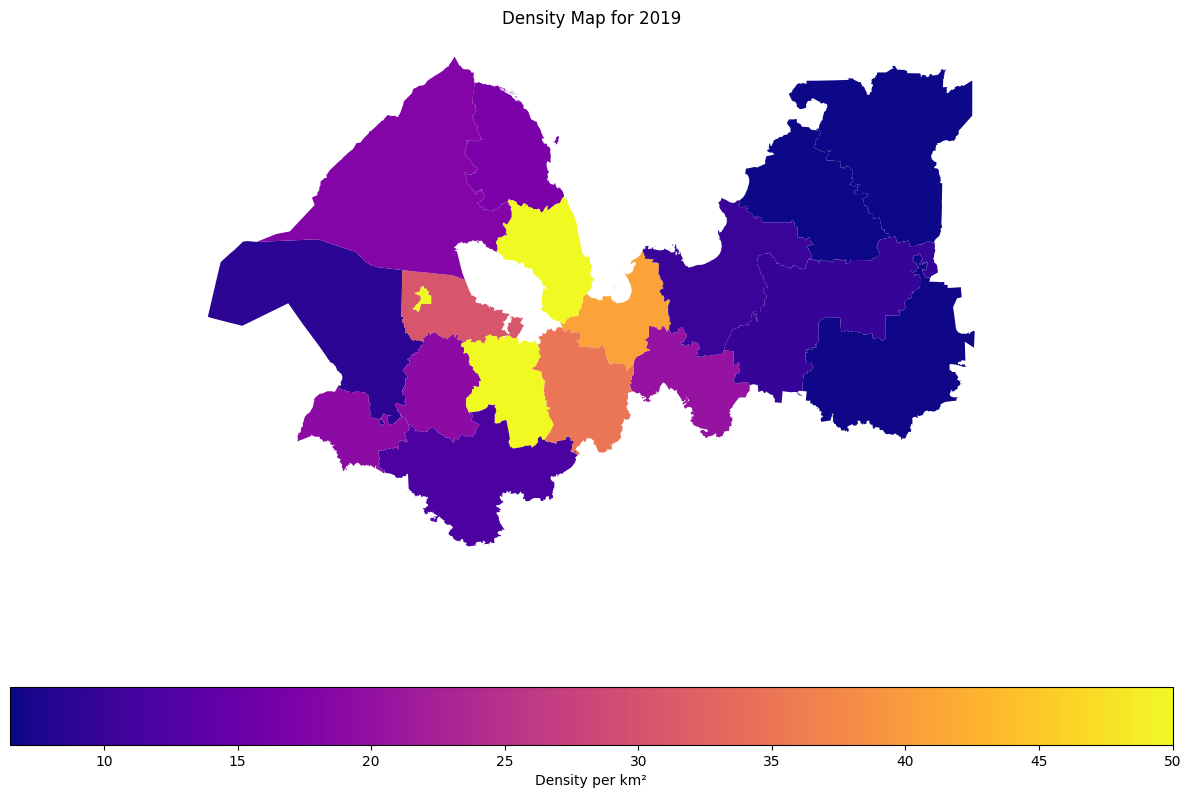

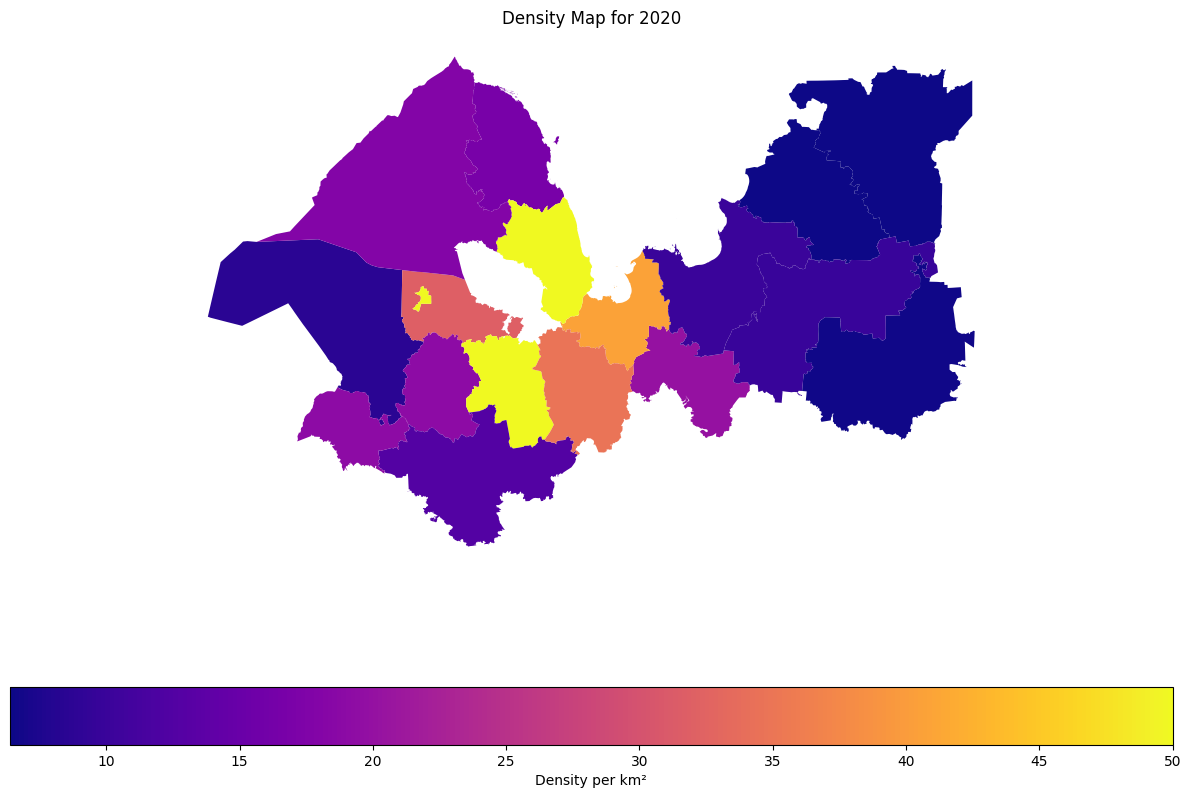

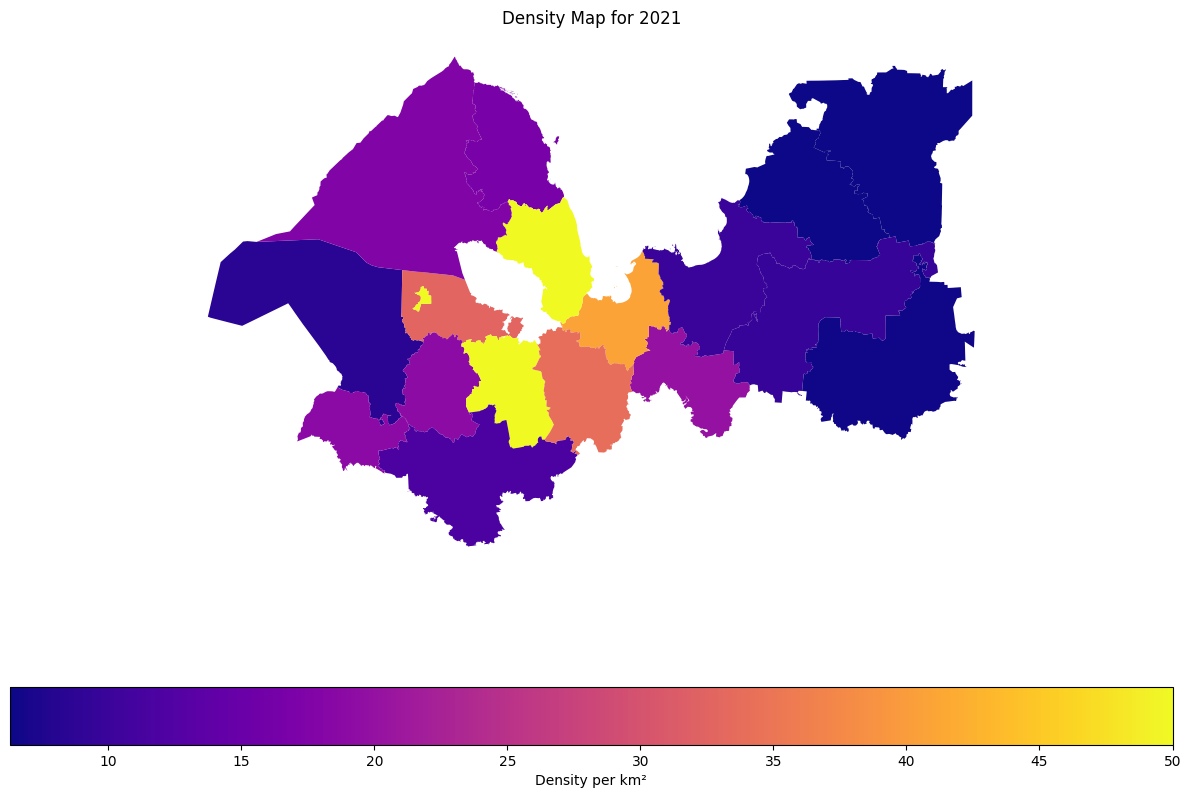

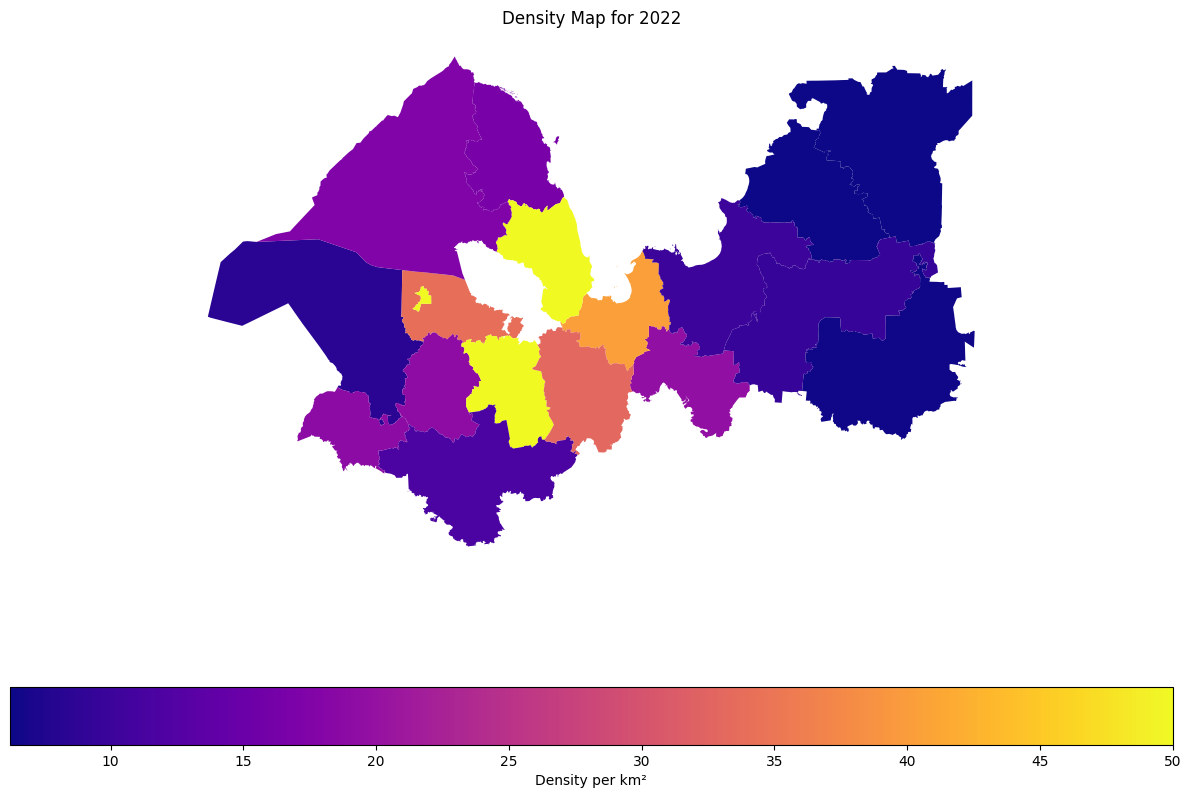

In [37]:

def visualize_density_map(data, year, max_value=None):
    column_name = f'density_{year}'
    if column_name not in data.columns:
        print(f"Данные по плотности населения за {year} год не найдены.")
        return
    
    # Нормализация данных плотности, использование квантилей для цветовой шкалы
    q_low = data[column_name].quantile(0.1)
    q_high = data[column_name].quantile(0.9)
    
    # Позволяет пользователю задавать максимальное значение для нормализации
    if max_value is not None:
        q_high = min(q_high, max_value)

    norm = plt.Normalize(vmin=q_low, vmax=q_high)

    # Установка цветовой схемы
    cmap = 'plasma'  # Изменена на plasma для лучшего представления данных

    # Построение карты
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    data.plot(column=column_name, ax=ax, legend=True, cmap=cmap, norm=norm,
             legend_kwds={'label': "Density per km²", 'orientation': "horizontal"})
    
    # Убрать рамку
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.title(f'Density Map for {year}')
    plt.show()

# Пример вызова функции с максимальным значением:
years = ['2019', '2020', '2021', '2022']
max_density = 50  # Пример максимального значения плотности, которое вы можете задать
for year in years:
    visualize_density_map(ter_mo, year, max_value=max_density)


# Средний возраст населения

### Средний возраст населения МО

In [38]:
import pandas as pd

# Load the Excel file to see the sheets and structure
file_path = 'data/Копия Половозрастная пирамида ЛО по МР.xlsx'
xls = pd.ExcelFile(file_path)

# Displaying the names of the sheets in the Excel file
sheet_names = xls.sheet_names


In [39]:
import pandas as pd

# Load the Excel file
file_path = 'data/Копия Половозрастная пирамида ЛО по МР.xlsx'
xls = pd.ExcelFile(file_path)

# Prepare to accumulate the results in a new DataFrame
final_df = pd.DataFrame()

# Iterate over each sheet in the Excel file
for sheet_name in xls.sheet_names:
    # Load data from the current sheet with no header initially
    df = pd.read_excel(xls, sheet_name=sheet_name, header=None)

    # Extract years from the second row (index 1) starting from the second cell (index 1)
    years = df.iloc[1, 1:].astype(str).values.tolist()

    # Assign column names, starting from the second column since the first is 'name'
    columns_dict = {0: 'name'}
    for i, year in enumerate(years, start=1):
        columns_dict[i] = year
    df.rename(columns=columns_dict, inplace=True)

    # Filter rows where name matches 'Всего'
    filtered_rows = df[df['name'] == 'Всего']

    # Extract necessary information
    for index in filtered_rows.index:
        age = df.loc[index - 1, 'name'] if index > 0 else None
        age_data = {year: df.loc[index, year] for year in years}  # Use dict comprehension

        # Create a temporary DataFrame to append to final_df
        temp_df = pd.DataFrame({
            'sheet_name': [sheet_name],
            'age': [age],
            **age_data
        })
        # Append to the final DataFrame
        final_df = pd.concat([final_df, temp_df], ignore_index=True)

# Handle 'age' data to ensure it is numeric where applicable
final_df['age'] = final_df['age'].replace('70 и старше', '70')
final_df['age_numeric'] = pd.to_numeric(final_df['age'], errors='coerce')  # Convert the 'age' column to numeric format, non-numeric becomes NaN
age_df = final_df.dropna(subset=['age_numeric'])  # Remove rows where 'age_numeric' is NaN
age_df['age'] = pd.to_numeric(age_df['age'], errors='coerce')
age_df['age'] = age_df['age'].fillna(0).astype(int)
age_df.columns = [str(int(float(col))) if col.isdigit() or '.' in col else col for col in age_df.columns]
# Optionally remove the temporary 'age_numeric' column if it's no longer needed
age_df.drop('age_numeric', axis=1, inplace=True)

max_age = 100

# Создаем новый DataFrame для хранения результатов
extended_df = pd.DataFrame()

for index, row in age_df.iterrows():
    if row['age'] == 70:
        # Извлекаем данные по возрасту 70
        base_value = row.drop(['sheet_name', 'age'])
        
        # Распределяем значения от 70 до 100 лет
        ages = range(70, max_age + 1)
        weights = np.exp(-0.1 * (np.array(ages) - 70))  # Экспоненциальное убывание весов
        weights /= weights.sum()  # Нормализуем веса, чтобы сумма была равна 1

        # Создаем новые строки для каждого возраста от 70 до 100
        for age, weight in zip(ages, weights):
            new_row = row.copy()
            new_row['age'] = age
            new_row[base_value.index] = base_value * weight
            extended_df = pd.concat([extended_df, new_row.to_frame().T], ignore_index=True)
    else:
        # Для всех остальных возрастов просто добавляем строку в новый DataFrame
        extended_df = pd.concat([extended_df, row.to_frame().T], ignore_index=True)

# Список колонок с годами
year_columns = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Создаем новый DataFrame для хранения результатов
average_ages = []

# Группируем данные по 'sheet_name'
grouped = extended_df.groupby('sheet_name')

# Вычисляем взвешенный средний возраст для каждой группы
for name, group in grouped:
    weighted_averages = {'sheet_name': name}
    for year in year_columns:
        if year in group.columns:
            # Вычисляем взвешенный средний возраст
            total_people = group[year].sum()
            weighted_age = (group['age'] * group[year]).sum()
            weighted_average_age = weighted_age / total_people if total_people != 0 else None
            weighted_averages[year] = weighted_average_age
        else:
            weighted_averages[year] = None

    # Добавляем результаты в список
    average_ages.append(weighted_averages)

# Создаем DataFrame из списка результатов
average_ages_df = pd.DataFrame(average_ages)
average_ages_df.fillna(0, inplace=True)
for col in average_ages_df.columns[1:]:  # Применение только к столбцам с годами
    average_ages_df[col] = average_ages_df[col].astype(int)

# Выводим результаты
average_ages_df


sheet_name  2014  2015  2016  2017  2018  2019  2020  2021  2022  \
0     Бокситогорский    42    42    41    41    42    41    41    41    43   
1        Волосовский    40    40    39    39    40    40    40    40    41   
2        Волховский     42    42    42    42    42    42    43    43    44   
3      Всеволожский      0     0     0     0     0    38    38    38    38   
4         Выборгский    40    40    40    41    41    41    42    42    42   
5         Гатчинский    41    41    41    41    41    42    42    42    42   
6      Кингисеппский    41    41    41    41    41    42    42    42    42   
7         Киришский     40    40    40    40    40    40    41    41    42   
8         Кировский     41    41    41    41    41    42    42    42    43   
9   Лодейнопольский     42    42    42    42    42    42    42    42    43   
10    Ломоносовский     40    40    40    40    41    41    40    40    40   
11           Лужский    42    42    42    42    42    42    42    42    43   
12     Подпорожский     43    43    43    43    43    42    42    42    44   
13      Приозерский     41    41    41    41    41    42    42    42    44   
14      Сланцевский     43    43    42    42    42    43    43    43    43   
15    Сосновоборский    41    41    41    41    41    42    42    42    42   
16       Тихвинский     42    42    41    42    42    42    42    42    43   
17       Тосненский     40    40    40    40    41    41    42    42    42   

    2023  
0     43  
1     41  
2     44  
3     38  
4     43  
5     43  
6     43  
7     43  
8     43  
9     43  
10    40  
11    44  
12    45  
13    44  
14    43  
15    43  
16    44  
17    42

In [40]:
ter_mo_age = gpd.read_file('data/Границы+население/Границы только МР.geojson')
ter_mo_age

fid                                 name  \
0   200   Бокситогорский муниципальный район   
1   202    Кингисеппский муниципальный район   
2   201        Киришский муниципальный район   
3   207        Кировский муниципальный район   
4   203  Лодейнопольский муниципальный район   
5   204    Ломоносовский муниципальный район   
6   205     Подпорожский муниципальный район   
7   206      Приозерский муниципальный район   
8   188       Сосновоборский городской округ   
9   217      Волосовский муниципальный район   
10  215       Волховский муниципальный район   
11  210     Всеволожский муниципальный район   
12  211       Выборгский муниципальный район   
13  213       Гатчинский муниципальный район   
14  214          Лужский муниципальный район   
15  212      Сланцевский муниципальный район   
16  216       Тихвинский муниципальный район   
17  218      Тоснненский муниципальный район   

                                  layer    2019    2021    2022    2023  \
0    Бокситогорский муниципальный район   49256   48048   47236   50977   
1     Кингисеппский муниципальный район   76182   73714   72512   83838   
2         Киришский муниципальный район   62069   61474   60003   59877   
3         Кировский муниципальный район  105936  106077  104710  108460   
4   Лодейнопольский муниципальный район   28530   27651   27365   27548   
5     Ломоносовский муниципальный район   73475   78421   81817   85329   
6      Подпорожский муниципальный район   28263   27103   26547   25508   
7       Приозерский муниципальный район   61028   59903   59496   57047   
8        Сосновоборский городской округ   64121   67054   65941   64121   
9       Волосовский муниципальный район   51668   51587   51600   50211   
10       Волховский муниципальный район   51668   51587   51600   50211   
11     Всеволожский муниципальный район  398896  473514  506289  554288   
12       Выборгский муниципальный район  199571  195728  193863  195374   
13       Гатчинский муниципальный район  243156  232752  230324  261898   
14          Лужский муниципальный район   72035   70787   69153   67523   
15      Сланцевский муниципальный район   42494   42030   41931   45192   
16       Тихвинский муниципальный район   69567   68475   67768   66266   
17      Тоснненский муниципальный район  128327  123557  120734  133109   

      2020                                           geometry  
0    48625  MULTIPOLYGON (((34.32834 59.19564, 34.32777 59...  
1    74881  MULTIPOLYGON (((28.19199 59.32665, 28.19187 59...  
2    61474  MULTIPOLYGON (((31.94177 59.42479, 31.94327 59...  
3   106016  MULTIPOLYGON (((31.91715 59.95987, 31.91722 59...  
4    28032  MULTIPOLYGON (((32.95801 60.71431, 33.02438 60...  
5    76786  MULTIPOLYGON (((29.45522 59.67542, 29.45718 59...  
6    27689  MULTIPOLYGON (((33.75559 61.23334, 33.77158 61...  
7    60351  MULTIPOLYGON (((30.69201 60.50326, 30.68940 60...  
8    67720  MULTIPOLYGON (((29.19344 59.85095, 29.17425 59...  
9    51778  MULTIPOLYGON (((28.98894 59.48069, 28.98604 59...  
10   51778  MULTIPOLYGON (((32.85314 60.51175, 32.84899 60...  
11  438607  MULTIPOLYGON (((30.55161 59.96981, 30.55200 59...  
12  198226  MULTIPOLYGON (((28.99640 60.03638, 28.85880 60...  
13  238034  MULTIPOLYGON (((29.63489 59.57073, 29.63372 59...  
14   75307  MULTIPOLYGON (((29.74752 58.43696, 29.74807 58...  
15   42296  MULTIPOLYGON (((28.55918 59.15314, 28.55977 59...  
16   69457  MULTIPOLYGON (((34.40706 60.15749, 34.40750 60...  
17  126915  MULTIPOLYGON (((30.68185 59.72645, 30.68152 59...

In [41]:
# Выполните разность геометрий, чтобы удалить воду из границ муниципальных образований
ter_mo_age['geometry'] = ter_mo_age.geometry.apply(lambda x: x.difference(water.unary_union))
# ter_gp['geometry'] = ter_gp.geometry.apply(lambda x: x.difference(water.unary_union))
# Очистите GeoDataFrame от столбцов, которые стали полностью пустыми после удаления воды
ter_mo_age = ter_mo_age.dropna(axis=1, how='all')
# ter_gp = ter_gp.dropna(axis=1, how='all')

In [42]:
df = average_ages_df
gdf = ter_mo_age

In [43]:
import pandas as pd

# Предположим, что df и gdf уже загружены в вашу среду выполнения
# Определение функции нормализации названий
def normalize_name(name):
    name = name.lower().replace(' городской округ', '').replace(' муниципальный район', '')
    name = name.replace('тоснненский', 'тосненский')  # Пример специфической корректировки
    return name.strip()

# Применение функции нормализации к обоим DataFrame
df['normalized_region'] = df['sheet_name'].apply(normalize_name)
gdf['normalized_name'] = gdf['name'].apply(normalize_name)

# Создание новых колонок для миграционных данных в gdf
for year in range(2014, 2024):
    gdf[f'avg_age_{year}'] = None

# Перенос данных
for index, row in df.iterrows():
    # Используем str.contains для более гибкого поиска
    # Убедитесь, что в вашем DataFrame нет дублирующихся нормализованных названий, иначе может возникнуть неоднозначность
    mask = gdf['normalized_name'].str.contains(row['normalized_region'], regex=False)
    for year in range(2014, 2024):
        gdf.loc[mask, f'avg_age_{year}'] = row[str(year)]

# Удаление временных колонок с нормализованными названиями
gdf.drop('normalized_name', axis=1, inplace=True)
# df.drop('normalized_region', axis=1, inplace=True)
columns_to_drop = ['2019', '2021', '2022', '2023', '2020', 'layer', 'fid']  # Замените на имена столбцов, которые нужно удалить
# Создание нового GeoDataFrame без указанных столбцов
gdf = gdf.drop(columns=columns_to_drop)
# gdf.to_file("mo_avg_age.geojson", driver='GeoJSON')
gdf



name  \
0    Бокситогорский муниципальный район   
1     Кингисеппский муниципальный район   
2         Киришский муниципальный район   
3         Кировский муниципальный район   
4   Лодейнопольский муниципальный район   
5     Ломоносовский муниципальный район   
6      Подпорожский муниципальный район   
7       Приозерский муниципальный район   
8        Сосновоборский городской округ   
9       Волосовский муниципальный район   
10       Волховский муниципальный район   
11     Всеволожский муниципальный район   
12       Выборгский муниципальный район   
13       Гатчинский муниципальный район   
14          Лужский муниципальный район   
15      Сланцевский муниципальный район   
16       Тихвинский муниципальный район   
17      Тоснненский муниципальный район   

                                             geometry avg_age_2014  \
0   POLYGON ((34.32777 59.19548, 34.32746 59.19544...           42   
1   POLYGON ((28.19187 59.32671, 28.19185 59.32673...           41   
2   POLYGON ((31.94327 59.42428, 31.93481 59.41883...           40   
3   MULTIPOLYGON (((31.91722 59.95916, 31.91717 59...           41   
4   MULTIPOLYGON (((33.02438 60.72112, 33.06224 60...           42   
5   POLYGON ((29.45718 59.67313, 29.45392 59.67086...           40   
6   POLYGON ((33.77158 61.23326, 33.79156 61.23320...           43   
7   MULTIPOLYGON (((30.68940 60.50106, 30.68662 60...           41   
8   POLYGON ((29.17425 59.85037, 29.15581 59.84976...           41   
9   POLYGON ((28.98604 59.48401, 28.98321 59.48727...           40   
10  MULTIPOLYGON (((32.84899 60.50379, 32.84623 60...           42   
11  MULTIPOLYGON (((30.55200 59.96912, 30.55246 59...            0   
12  POLYGON ((28.85880 60.04000, 28.82636 60.04088...           40   
13  POLYGON ((29.63372 59.57069, 29.63286 59.57065...           41   
14  POLYGON ((29.74807 58.43754, 29.74811 58.43758...           42   
15  POLYGON ((28.55977 59.15308, 28.56023 59.15321...           43   
16  POLYGON ((34.40750 60.15748, 34.41680 60.15734...           42   
17  POLYGON ((30.68152 59.72665, 30.68134 59.72678...           40   

   avg_age_2015 avg_age_2016 avg_age_2017 avg_age_2018 avg_age_2019  \
0            42           41           41           42           41   
1            41           41           41           41           42   
2            40           40           40           40           40   
3            41           41           41           41           42   
4            42           42           42           42           42   
5            40           40           40           41           41   
6            43           43           43           43           42   
7            41           41           41           41           42   
8            41           41           41           41           42   
9            40           39           39           40           40   
10           42           42           42           42           42   
11            0            0            0            0           38   
12           40           40           41           41           41   
13           41           41           41           41           42   
14           42           42           42           42           42   
15           43           42           42           42           43   
16           42           41           42           42           42   
17           40           40           40           41           41   

   avg_age_2020 avg_age_2021 avg_age_2022 avg_age_2023  
0            41           41           43           43  
1            42           42           42           43  
2            41           41           42           43  
3            42           42           43           43  
4            42           42           43           43  
5            40           40           40           40  
6            42           42           44           45  
7            42           42           44           44  
8            42        

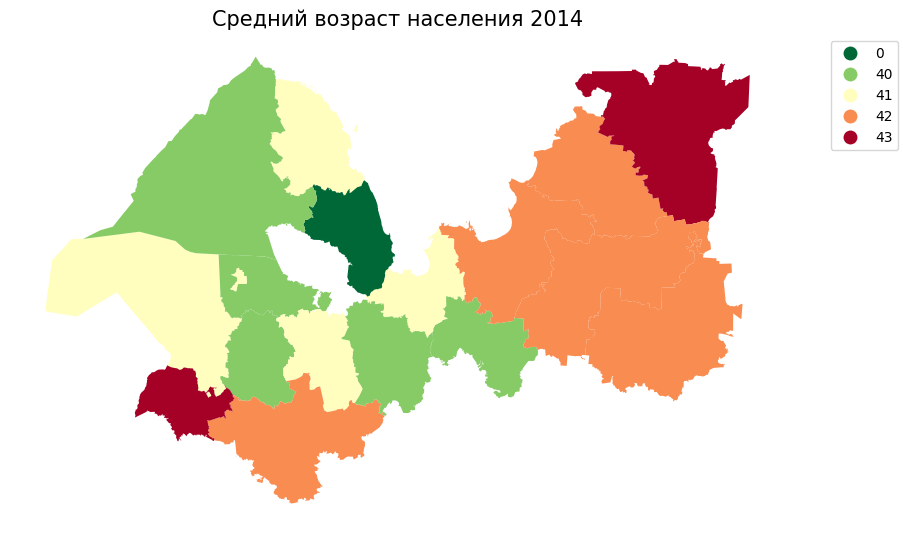

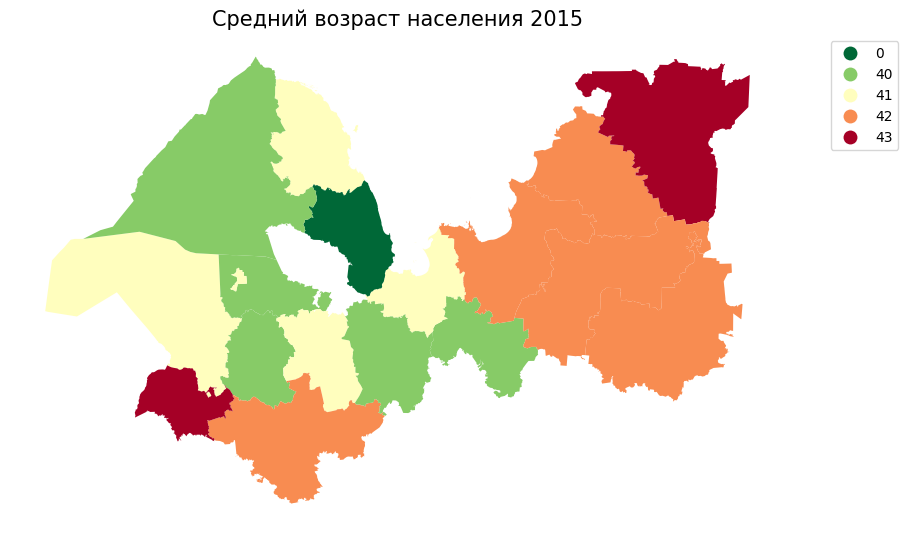

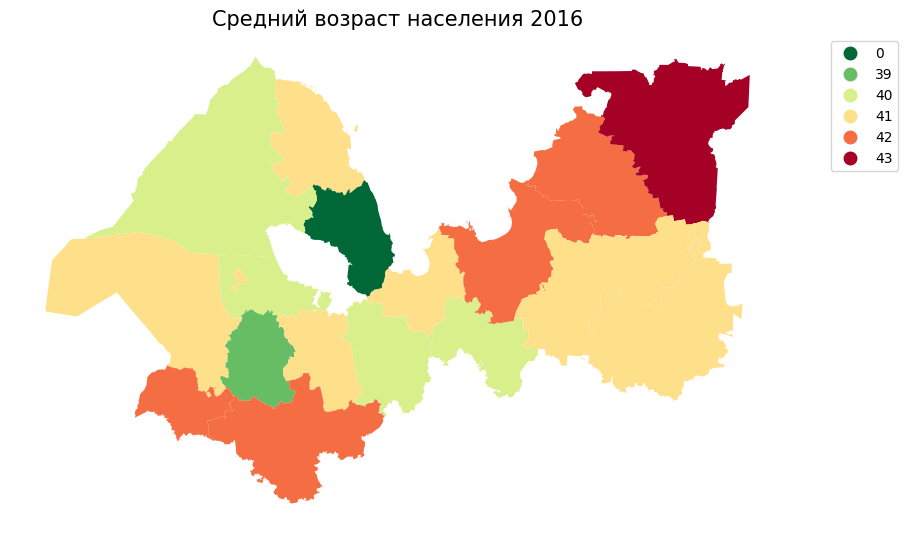

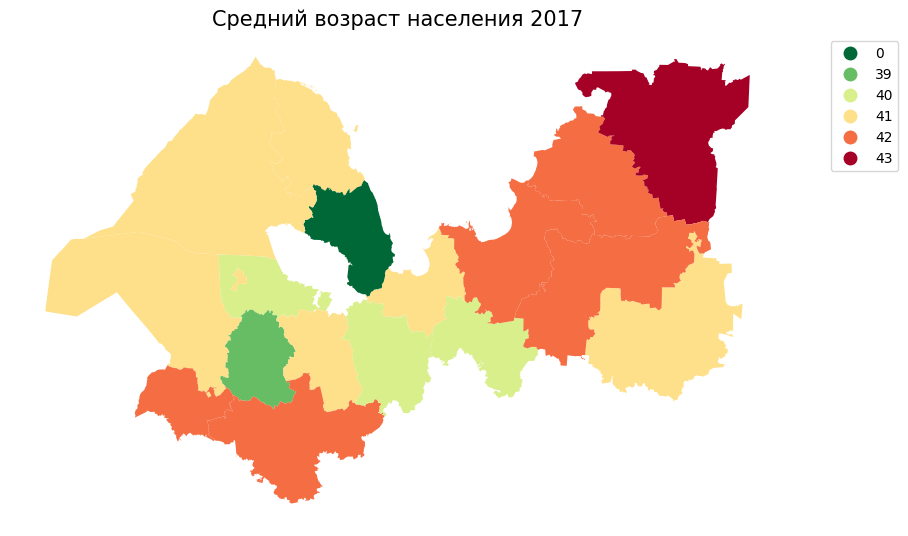

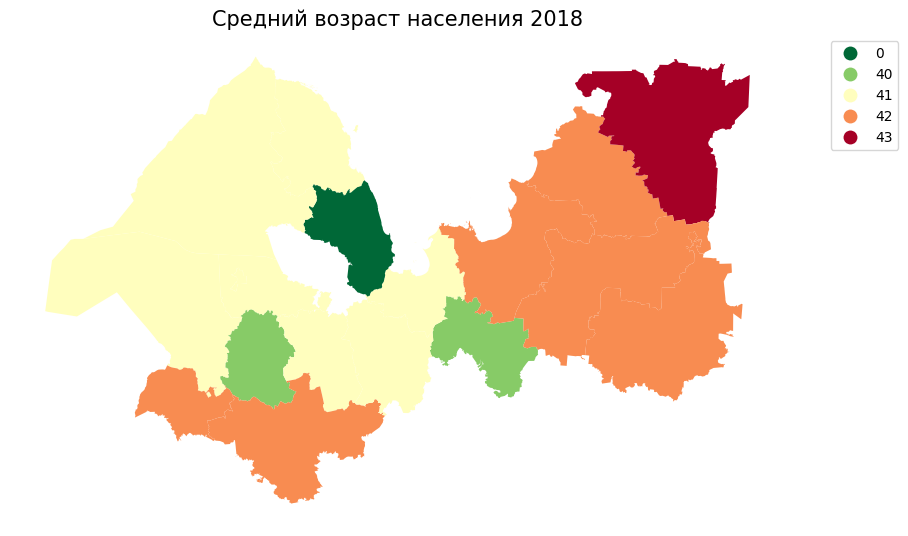

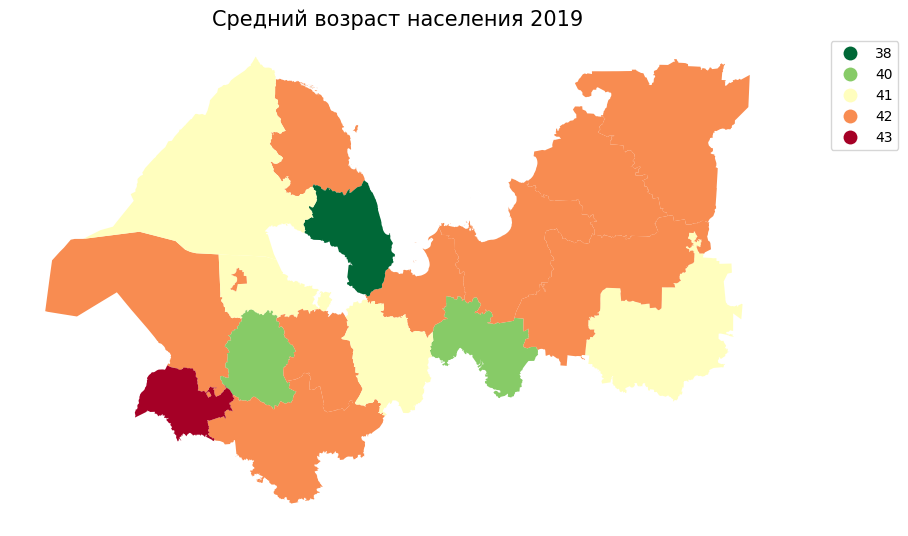

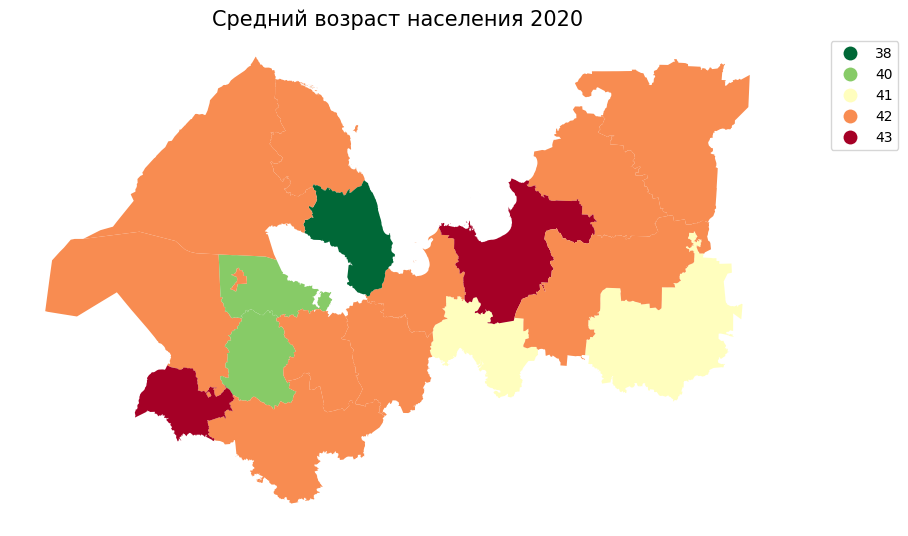

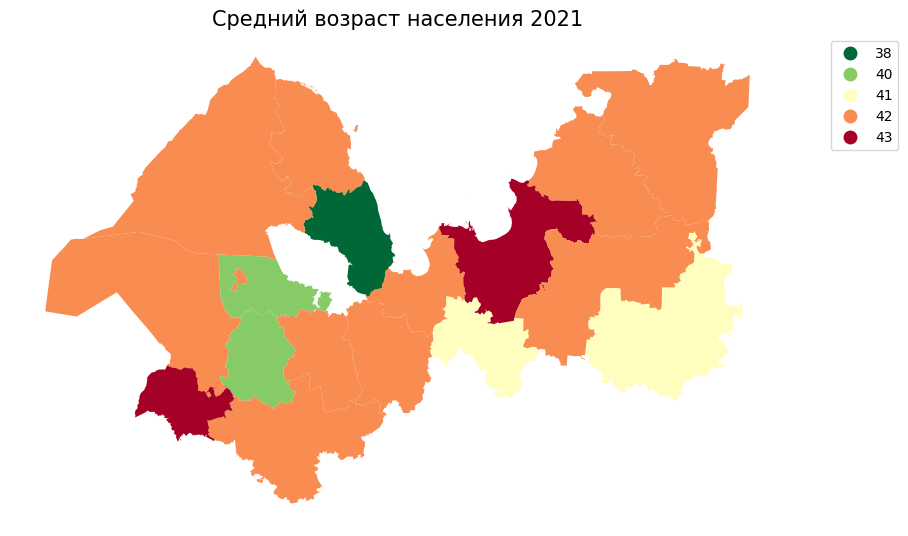

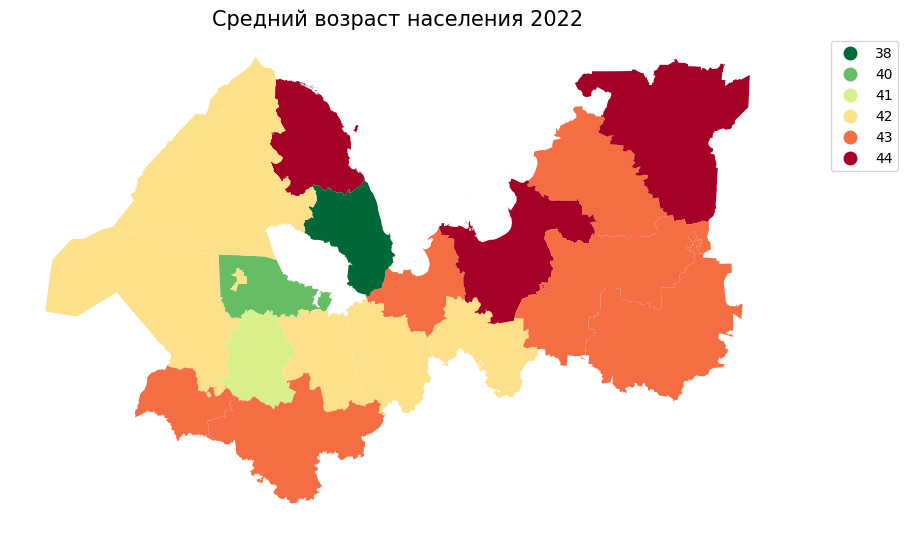

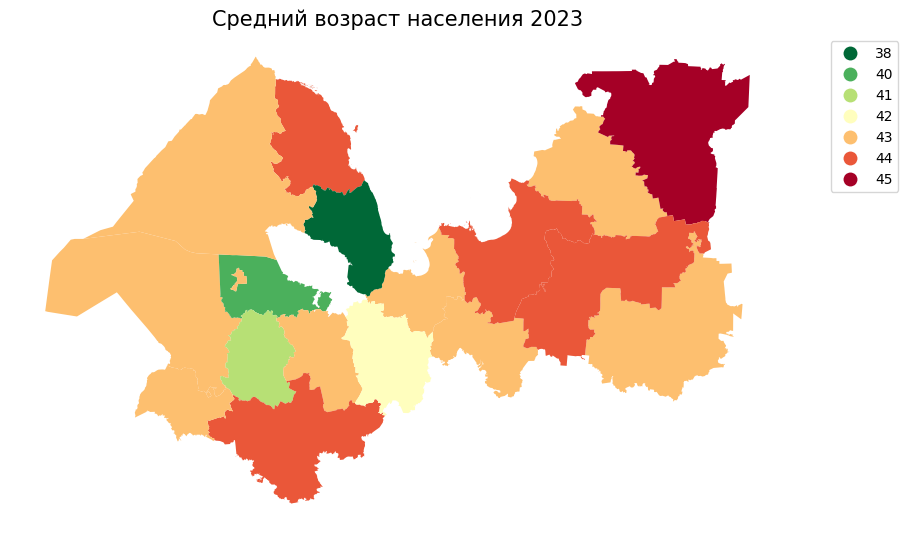

In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Предполагаем, что gdf уже загружен и содержит столбцы 'geometry' и данные за годы

# Список годов для визуализации
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Создаем отдельные картинки для каждого года
for year in years:
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    # Визуализация с измененной цветовой шкалой
    gdf.plot(column=f'avg_age_{year}', ax=ax, legend=True, cmap='RdYlGn_r', 
             legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left', 'prop': {'size': 10}})
    ax.set_title(f'Средний возраст населения {year}', fontsize=15)
    ax.set_axis_off()  # Убираем рамку и оси координат
    plt.show()

### Средний возраст населения ГП

In [45]:
def normalize_name(name):
    name = name.lower().replace(' городской округ', '').replace(' муниципальный район', '')
    name = name.replace('тоснненский', 'тосненский')  # Пример специфической корректировки
    return name.strip()


In [46]:
extended_df['normalized_region'] = extended_df['sheet_name'].apply(normalize_name)
extended_df

sheet_name  age       2014       2015       2016       2017  \
0     Бокситогорский    0      453.0      496.0      479.0      456.0   
1     Бокситогорский    1      457.0      459.0      497.0      479.0   
2     Бокситогорский    2      470.0      459.0      454.0      497.0   
3     Бокситогорский    3      488.0      472.0      454.0      448.0   
4     Бокситогорский    4      506.0      488.0      465.0      470.0   
...              ...  ...        ...        ...        ...        ...   
1812  Сосновоборский   96  52.387796  51.573631  50.981511  52.372993   
1813  Сосновоборский   97  47.402438  46.665751  46.129979  47.389044   
1814  Сосновоборский   98    42.8915  42.224918  41.740131   42.87938   
1815  Сосновоборский   99  38.809834  38.206686  37.768033  38.798867   
1816  Сосновоборский  100   35.11659  34.570839  34.173929  35.106667   

           2018       2019       2020       2021       2022       2023  \
0         398.0      369.0      317.0      334.0      304.0      315.0   
1         449.0      367.0      359.0      309.0      357.0      293.0   
2         462.0      415.0      351.0      342.0      358.0      337.0   
3         502.0      438.0      396.0      361.0      376.0      347.0   
4         465.0      525.0      461.0      386.0      421.0      397.0   
...         ...        ...        ...        ...        ...        ...   
1812  54.134549  57.272784  60.988335  62.194779  57.324594  59.241582   
1813  48.982966  51.822558  55.184528  56.276164  51.869438     53.604   
1814   44.32162  46.890989  49.933026  50.920779  46.933408  48.502905   
1815   40.10386  42.428722   45.18127  46.075026  42.467104  43.887243   
1816  36.287473  38.391095  40.881704  41.690407  38.425825   39.71082   

     normalized_region  
0       бокситогорский  
1       бокситогорский  
2       бокситогорский  
3       бокситогорский  
4       бокситогорский  
...                ...  
1812    сосновоборский  
1813    сосновоборский  
1814    сосновоборский  
1815    сосновоборский  
1816    сосновоборский  

[1817 rows x 13 columns]

In [47]:
ter_gp_age = gpd.read_file('data/Границы+население/Границы только ГП и СП.geojson')
# Применение функции нормализации к обоим DataFrame
ter_gp_age['normalized_region'] = ter_gp_age['layer'].apply(normalize_name)
ter_gp_age

fid                                name  \
0      7     Самойловское сельское поселение   
1      2   Большедворское сельское поселение   
2      6     Пикалевское городское поселение   
3      3          Борское сельское поселение   
4      1  Бокситогорское городское поселение   
..   ...                                 ...   
183  185     Фёдоровское городское поселение   
184  179       Нурминское сельское поселение   
185  175   Красноборское городское поселение   
186  183  Трубникоборское сельское поселение   
187  176        Лисинское сельское поселение   

                                  layer   2019   2021   2022   2023   2020  \
0    Бокситогорский муниципальный район   2069   2085   2096   2154   2088   
1    Бокситогорский муниципальный район   1575   1505   1486   1698   1528   
2    Бокситогорский муниципальный район  19981  19490  19250  20169  19746   
3    Бокситогорский муниципальный район   3312   3301   3272   3393   3279   
4    Бокситогорский муниципальный район  15370  15088  14606  15960  15200   
..                                  ...    ...    ...    ...    ...    ...   
183     Тоснненский муниципальный район   4460   4450   4562   6083   4536   
184     Тоснненский муниципальный район   3127   3018   2977   3354   3090   
185     Тоснненский муниципальный район   5145   4825   4657   4507   5006   
186     Тоснненский муниципальный район   1603   1541   1479   1620   1583   
187     Тоснненский муниципальный район   1984   1789   1703   1919   1856   

                                              geometry normalized_region  
0    MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    бокситогорский  
1    MULTIPOLYGON (((34.30682 59.71494, 34.30791 59...    бокситогорский  
2    MULTIPOLYGON (((34.14251 59.48759, 34.13616 59...    бокситогорский  
3    MULTIPOLYGON (((34.05997 59.15087, 34.06007 59...    бокситогорский  
4    MULTIPOLYGON (((34.06836 59.40315, 34.05535 59...    бокситогорский  
..                                                 ...               ...  
183  MULTIPOLYGON (((30.52049 59.69087, 30.52316 59...        тосненский  
184  MULTIPOLYGON (((31.01271 59.63362, 31.01394 59...        тосненский  
185  MULTIPOLYGON (((30.58336 59.64993, 30.58367 59...        тосненский  
186  MULTIPOLYGON (((31.13126 59.08942, 31.13522 59...        тосненский  
187  MULTIPOLYGON (((30.59799 59.48382, 30.59899 59...        тосненский  

[188 rows x 10 columns]

In [48]:
import pandas as pd
import geopandas as gpd
import numpy as np


# Преобразуем данные в числовой формат во втором DataFrame для годовых столбцов
for year in ['2019', '2020', '2021', '2022', '2023']:
    ter_gp_age[year] = pd.to_numeric(ter_gp_age[year], errors='coerce')

# Агрегация общего населения по каждому муниципальному округу во втором DataFrame
total_pop_by_region = ter_gp_age.groupby('normalized_region')[['2019', '2020', '2021', '2022', '2023']].sum()

# Создаем список для временного хранения данных
data_list = []

# Перебор городов во втором DataFrame
for _, city in ter_gp_age.iterrows():
    city_name = city['name']
    region = city['normalized_region']
    geometry = city['geometry']
    
    # Вычисление долей населения для каждого года
    city_pop_shares = {year: city[year] / total_pop_by_region.loc[region, year] for year in ['2019', '2020', '2021', '2022', '2023']}

    # Перебор возрастов в первом DataFrame
    for idx, row in extended_df[extended_df['normalized_region'] == region].iterrows():
        age = row['age']
        
        # Создание словаря для новой строки
        new_row = {'city': city_name, 'region': region, 'age': age, 'geometry': geometry}
        
        # Доступ к данным по возрасту для каждого года
        for year in range(2014, 2024):
            year_str = str(year)
            pop = row[year_str] * city_pop_shares.get(year_str, city_pop_shares[max(city_pop_shares.keys())])
            
            # Добавление населения в словарь
            new_row[year_str] = pop

        # Добавление словаря в список
        data_list.append(new_row)

# Преобразование списка словарей в GeoDataFrame
final_gdf = gpd.GeoDataFrame(data_list, geometry='geometry')

# Просмотр результатов
final_gdf.head(30)



city          region  age  \
0   Самойловское сельское поселение  бокситогорский    0   
1   Самойловское сельское поселение  бокситогорский    1   
2   Самойловское сельское поселение  бокситогорский    2   
3   Самойловское сельское поселение  бокситогорский    3   
4   Самойловское сельское поселение  бокситогорский    4   
5   Самойловское сельское поселение  бокситогорский    5   
6   Самойловское сельское поселение  бокситогорский    6   
7   Самойловское сельское поселение  бокситогорский    7   
8   Самойловское сельское поселение  бокситогорский    8   
9   Самойловское сельское поселение  бокситогорский    9   
10  Самойловское сельское поселение  бокситогорский   10   
11  Самойловское сельское поселение  бокситогорский   11   
12  Самойловское сельское поселение  бокситогорский   12   
13  Самойловское сельское поселение  бокситогорский   13   
14  Самойловское сельское поселение  бокситогорский   14   
15  Самойловское сельское поселение  бокситогорский   15   
16  Самойловское сельское поселение  бокситогорский   16   
17  Самойловское сельское поселение  бокситогорский   17   
18  Самойловское сельское поселение  бокситогорский   18   
19  Самойловское сельское поселение  бокситогорский   19   
20  Самойловское сельское поселение  бокситогорский   20   
21  Самойловское сельское поселение  бокситогорский   21   
22  Самойловское сельское поселение  бокситогорский   22   
23  Самойловское сельское поселение  бокситогорский   23   
24  Самойловское сельское поселение  бокситогорский   24   
25  Самойловское сельское поселение  бокситогорский   25   
26  Самойловское сельское поселение  бокситогорский   26   
27  Самойловское сельское поселение  бокситогорский   27   
28  Самойловское сельское поселение  бокситогорский   28   
29  Самойловское сельское поселение  бокситогорский   29   

                                             geometry       2014       2015  \
0   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  19.141221  20.958158   
1   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  19.310238  19.394747   
2   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  19.859545  19.394747   
3   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  20.620123  19.944053   
4   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  21.380701  20.620123   
5   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  24.845558  21.338447   
6   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  19.563764  24.803303   
7   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  18.972203  19.732781   
8   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  19.437001  18.887694   
9   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  22.648332  19.437001   
10  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  23.366656  22.563823   
11  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  20.155325  23.239893   
12  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  20.746886  20.113071   
13  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  21.422955  20.662377   
14  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  19.056712  21.296192   
15  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  21.211684  19.098966   
16  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  23.028621  21.296192   
17  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...        NaN        NaN   
18  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  24.127234  22.901858   
19  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  24.042725  25.437119   
20  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  22.099025  23.831453   
21  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  19.986308  22.099025   
22  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  16.901740  19.775036   
23  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  22.437060  17.070757   
24  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  24.507523  22.479314   
25  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...  30.296369  24.338506   
26  MULTIPOLYGON (((34.42169 59.68391

In [49]:
final_gdf.fillna(0, inplace=True)
columns_to_round = [str(year) for year in range(2014, 2024)]
final_gdf[columns_to_round] = final_gdf[columns_to_round].round(0).astype(int)
final_gdf.head(30)

city          region  age  \
0   Самойловское сельское поселение  бокситогорский    0   
1   Самойловское сельское поселение  бокситогорский    1   
2   Самойловское сельское поселение  бокситогорский    2   
3   Самойловское сельское поселение  бокситогорский    3   
4   Самойловское сельское поселение  бокситогорский    4   
5   Самойловское сельское поселение  бокситогорский    5   
6   Самойловское сельское поселение  бокситогорский    6   
7   Самойловское сельское поселение  бокситогорский    7   
8   Самойловское сельское поселение  бокситогорский    8   
9   Самойловское сельское поселение  бокситогорский    9   
10  Самойловское сельское поселение  бокситогорский   10   
11  Самойловское сельское поселение  бокситогорский   11   
12  Самойловское сельское поселение  бокситогорский   12   
13  Самойловское сельское поселение  бокситогорский   13   
14  Самойловское сельское поселение  бокситогорский   14   
15  Самойловское сельское поселение  бокситогорский   15   
16  Самойловское сельское поселение  бокситогорский   16   
17  Самойловское сельское поселение  бокситогорский   17   
18  Самойловское сельское поселение  бокситогорский   18   
19  Самойловское сельское поселение  бокситогорский   19   
20  Самойловское сельское поселение  бокситогорский   20   
21  Самойловское сельское поселение  бокситогорский   21   
22  Самойловское сельское поселение  бокситогорский   22   
23  Самойловское сельское поселение  бокситогорский   23   
24  Самойловское сельское поселение  бокситогорский   24   
25  Самойловское сельское поселение  бокситогорский   25   
26  Самойловское сельское поселение  бокситогорский   26   
27  Самойловское сельское поселение  бокситогорский   27   
28  Самойловское сельское поселение  бокситогорский   28   
29  Самойловское сельское поселение  бокситогорский   29   

                                             geometry  2014  2015  2016  2017  \
0   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    19    21    20    19   
1   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    19    19    21    20   
2   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    20    19    19    21   
3   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    21    20    19    19   
4   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    21    21    20    20   
5   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    25    21    21    20   
6   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    20    25    21    21   
7   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    19    20    25    21   
8   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    19    19    20    25   
9   MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    23    19    19    20   
10  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    23    23    20    20   
11  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    20    23    22    20   
12  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    21    20    23    23   
13  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    21    21    20    23   
14  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    19    21    21    20   
15  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    21    19    22    21   
16  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    23    21    20    23   
17  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...     0     0    21    21   
18  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    24    23    21    21   
19  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    24    25    23    21   
20  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    22    24    24    22   
21  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    20    22    24    24   
22  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    17    20    24    24   
23  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    22    17    20    24   
24  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    25    22    17    20   
25  MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...    30    2

In [50]:
# final_gdf.to_file("Половозростной состав для всех ГП.geojson", driver='GeoJSON')

In [51]:
# Фильтрация данных по региону, возрасту и году
filtered_data = final_gdf[
    (final_gdf['region'] == 'бокситогорский') & 
    (final_gdf['age'] == 0)
]

# Суммирование данных по населению для года 2014
total_population_2014 = filtered_data['2014'].sum()

print("Суммарное количество людей в возрасте 0 лет в муниципальном округе Бокситогорский за 2014 год:", total_population_2014)

Суммарное количество людей в возрасте 0 лет в муниципальном округе Бокситогорский за 2014 год: 453


In [52]:
# Список колонок с годами
year_columns = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Создаем новый DataFrame для хранения результатов
average_ages = []

# Группируем данные по 'sheet_name'
grouped = final_gdf.groupby('city')

# Вычисляем взвешенный средний возраст для каждой группы
for name, group in grouped:
    weighted_averages = {'city': name}
    for year in year_columns:
        if year in group.columns:
            # Вычисляем взвешенный средний возраст
            total_people = group[year].sum()
            weighted_age = (group['age'] * group[year]).sum()
            weighted_average_age = weighted_age / total_people if total_people != 0 else None
            weighted_averages[year] = weighted_average_age
        else:
            weighted_averages[year] = None

    # Добавляем результаты в список
    average_ages.append(weighted_averages)

# Создаем DataFrame из списка результатов
average_ages_df = pd.DataFrame(average_ages)
average_ages_df.fillna(0, inplace=True)
for col in average_ages_df.columns[1:]:  # Применение только к столбцам с годами
    average_ages_df[col] = average_ages_df[col].astype(int)

# Выводим результаты
average_ages_df


city  2014  2015  2016  2017  2018  2019  \
0    Агалатовское сельское поселение\n     0     0     0     0     0    38   
1     Алеховщинское сельское поселение    42    42    42    42    42    42   
2        Аннинское городское поселение    40    40    40    40    41    41   
3        Бегуницкое сельское поселение    40    40    39    39    40    40   
4      Бережковское сельское поселение    42    42    42    42    42    42   
..                                 ...   ...   ...   ...   ...   ...   ...   
181         Шумское сельское поселение    41    41    41    41    41    42   
182      Щегловское сельское поселение     0     0     0     0     0    38   
183       Юкковское сельское поселение     0     0     0     0     0    38   
184    Ям-Тесовское сельское поселение    42    42    42    42    42    42   
185        Янегское сельское поселение    42    42    42    42    42    42   

     2020  2021  2022  2023  
0      38    38    38    38  
1      42    42    43    43  
2      40    40    40    40  
3      40    40    41    41  
4      43    43    44    44  
..    ...   ...   ...   ...  
181    42    42    43    43  
182    38    38    38    38  
183    38    38    38    38  
184    42    42    43    44  
185    42    42    43    43  

[186 rows x 11 columns]

In [53]:
import pandas as pd

# Предположим, что df и gdf уже загружены в вашу среду выполнения
# Определение функции нормализации названий
def normalize_name(name):
    name = name.lower().replace(' городской округ', '').replace(' муниципальный район', '')
    name = name.replace('тоснненский', 'тосненский')  # Пример специфической корректировки
    return name.strip()


ter_gp_age = gpd.read_file('data/Границы+население/Границы только ГП и СП.geojson')
# Применение функции нормализации к обоим DataFrame
average_ages_df['normalized_region'] = average_ages_df['city'].apply(normalize_name)
ter_gp_age['normalized_name'] = ter_gp_age['name'].apply(normalize_name)


In [54]:
ter_gp_age['geometry'] = ter_gp_age.geometry.apply(lambda x: x.difference(water.unary_union))
ter_gp_age = ter_gp_age.dropna(axis=1, how='all')


In [55]:
df = average_ages_df
gdf = ter_gp_age

In [56]:
# Создание новых колонок для миграционных данных в gdf
for year in range(2014, 2024):
    gdf[f'avg_age_{year}'] = None

# Перенос данных
for index, row in df.iterrows():
    # Используем str.contains для более гибкого поиска
    # Убедитесь, что в вашем DataFrame нет дублирующихся нормализованных названий, иначе может возникнуть неоднозначность
    mask = gdf['normalized_name'].str.contains(row['normalized_region'], regex=False)
    for year in range(2014, 2024):
        gdf.loc[mask, f'avg_age_{year}'] = row[str(year)]

# Удаление временных колонок с нормализованными названиями
gdf.drop('normalized_name', axis=1, inplace=True)
# df.drop('normalized_region', axis=1, inplace=True)
columns_to_drop = ['2019', '2021', '2022', '2023', '2020', 'fid']  # Замените на имена столбцов, которые нужно удалить
# Создание нового GeoDataFrame без указанных столбцов
gdf = gdf.drop(columns=columns_to_drop)
# gdf.to_file("mo_avg_age.geojson", driver='GeoJSON')
gdf

name                               layer  \
0       Самойловское сельское поселение  Бокситогорский муниципальный район   
1     Большедворское сельское поселение  Бокситогорский муниципальный район   
2       Пикалевское городское поселение  Бокситогорский муниципальный район   
3            Борское сельское поселение  Бокситогорский муниципальный район   
4    Бокситогорское городское поселение  Бокситогорский муниципальный район   
..                                  ...                                 ...   
183     Фёдоровское городское поселение     Тоснненский муниципальный район   
184       Нурминское сельское поселение     Тоснненский муниципальный район   
185   Красноборское городское поселение     Тоснненский муниципальный район   
186  Трубникоборское сельское поселение     Тоснненский муниципальный район   
187        Лисинское сельское поселение     Тоснненский муниципальный район   

                                              geometry avg_age_2014  \
0    POLYGON ((34.42428 59.67150, 34.42548 59.66226...           42   
1    POLYGON ((34.30791 59.71295, 34.30701 59.71290...           42   
2    POLYGON ((34.13616 59.49064, 34.13765 59.49429...           42   
3    POLYGON ((34.06007 59.14658, 34.05620 59.14430...           42   
4    POLYGON ((34.05535 59.40393, 34.05026 59.40426...           42   
..                                                 ...          ...   
183  POLYGON ((30.52316 59.69108, 30.52335 59.69094...           40   
184  POLYGON ((31.01394 59.63327, 31.01824 59.63223...           40   
185  POLYGON ((30.58367 59.65002, 30.58381 59.65022...           40   
186  POLYGON ((31.13522 59.09693, 31.13672 59.09956...           40   
187  POLYGON ((30.59899 59.48310, 30.59966 59.48256...           40   

    avg_age_2015 avg_age_2016 avg_age_2017 avg_age_2018 avg_age_2019  \
0             42           41           41           41           41   
1             42           41           41           42           41   
2             42           41           41           42           41   
3             42           41           41           42           41   
4             42           41           41           41           41   
..           ...          ...          ...          ...          ...   
183           40           40           41           41           41   
184           40           40           41           41           41   
185           40           40           41           41           41   
186           40           40           40           41           41   
187           40           40           41           41           41   

    avg_age_2020 avg_age_2021 avg_age_2022 avg_age_2023  
0             41           41           43           43  
1             41           41           43           43  
2             41           41           43           43  
3             41           41           43           43  
4             41           41           43           43  
..           ...          ...          ...          ...  
183           42           42           42           42  
184           42           42           42           42  
185           42           42           42           42  
186           42           42           42           42  
187           42           42           42           42  

[188 rows x 13 columns]

In [57]:
# gdf.to_file("gp_avg_age.geojson", driver='GeoJSON')

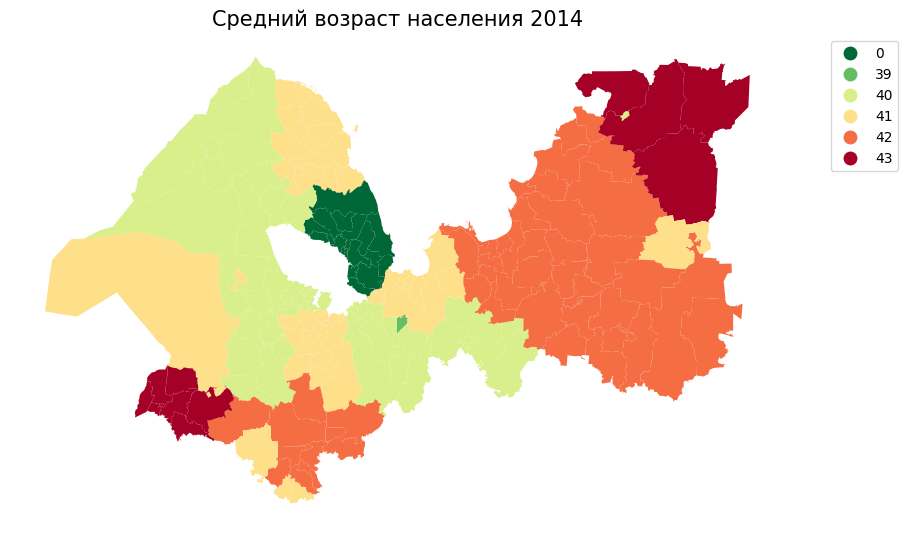

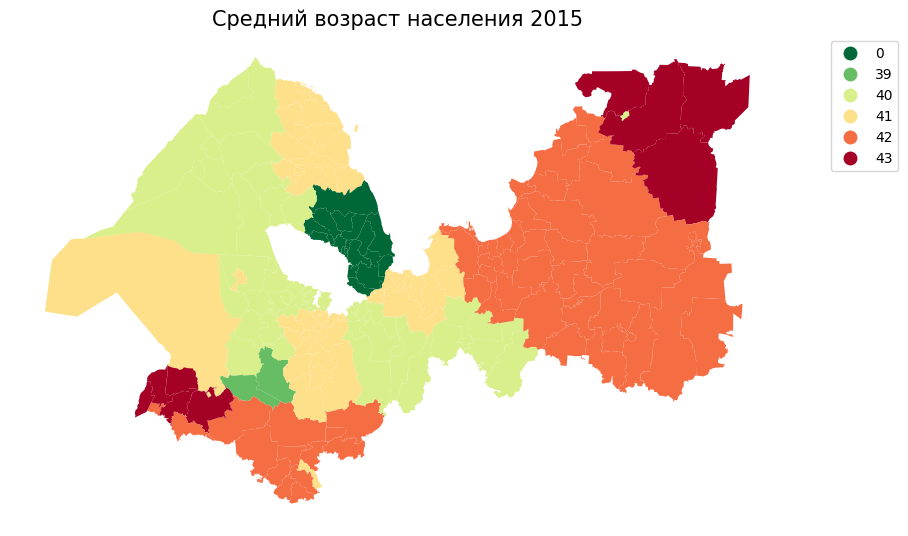

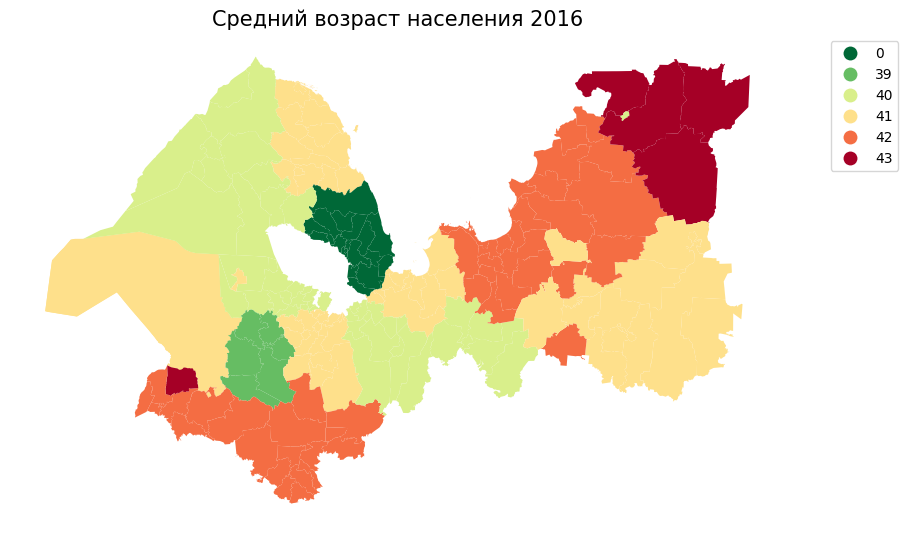

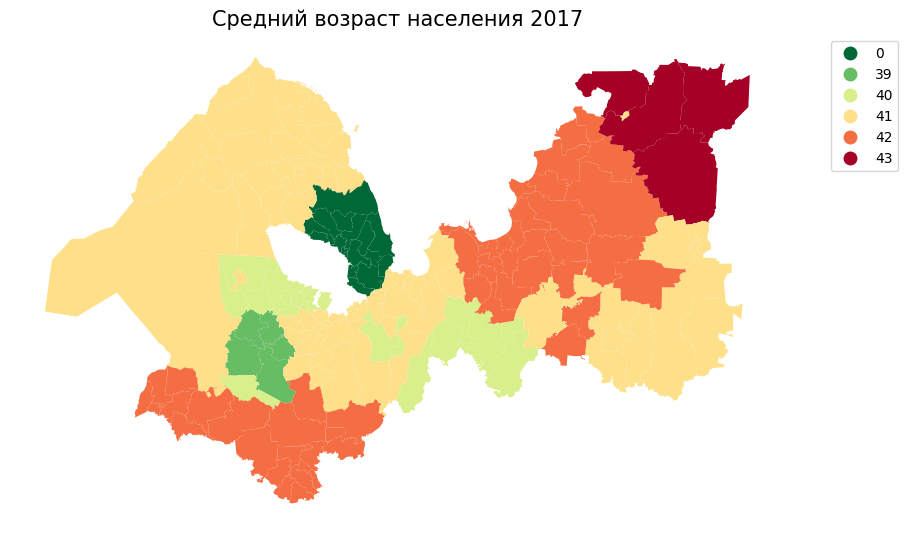

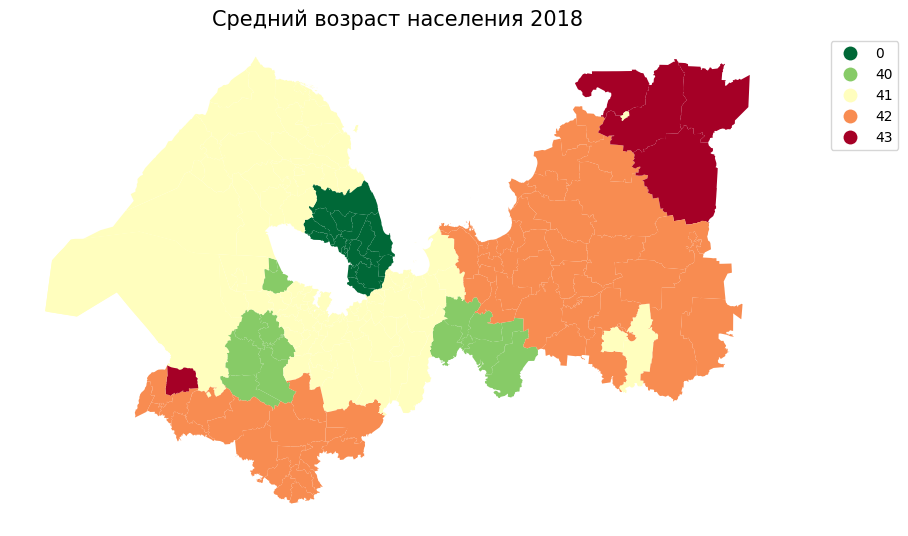

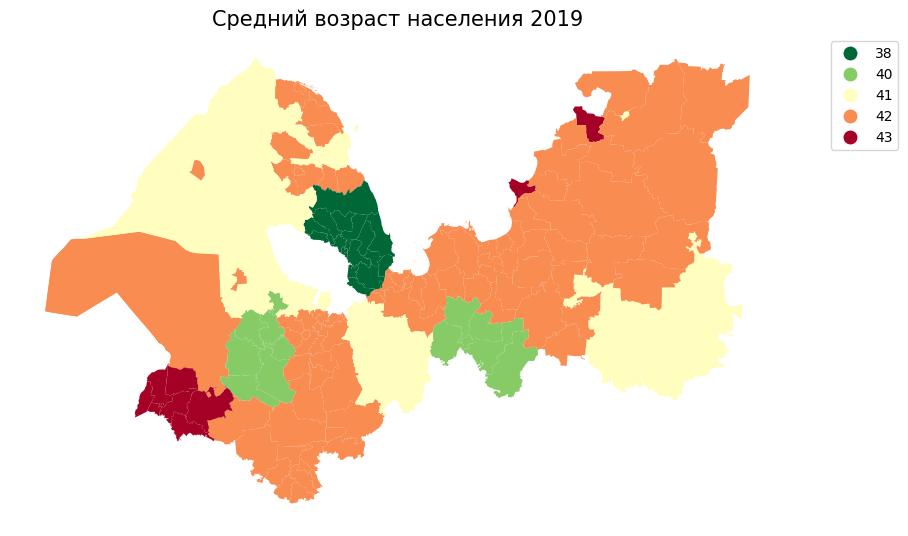

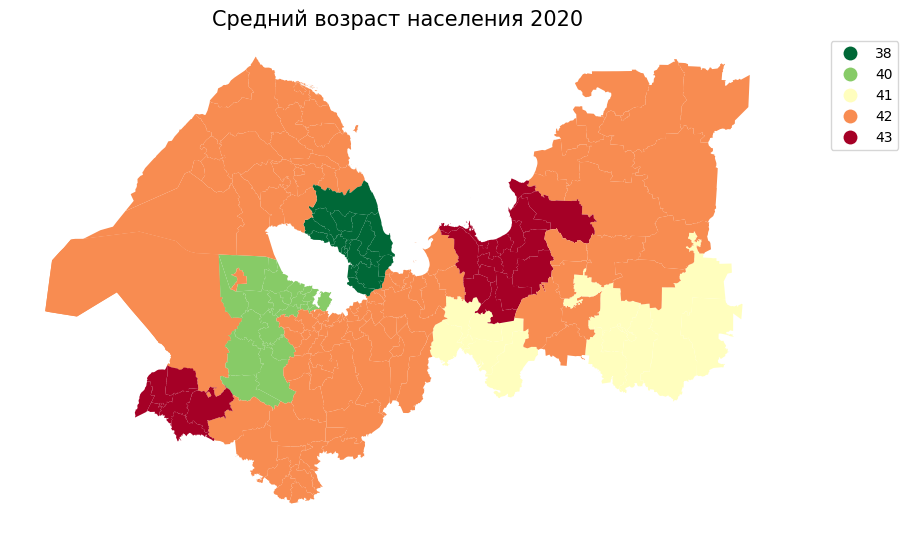

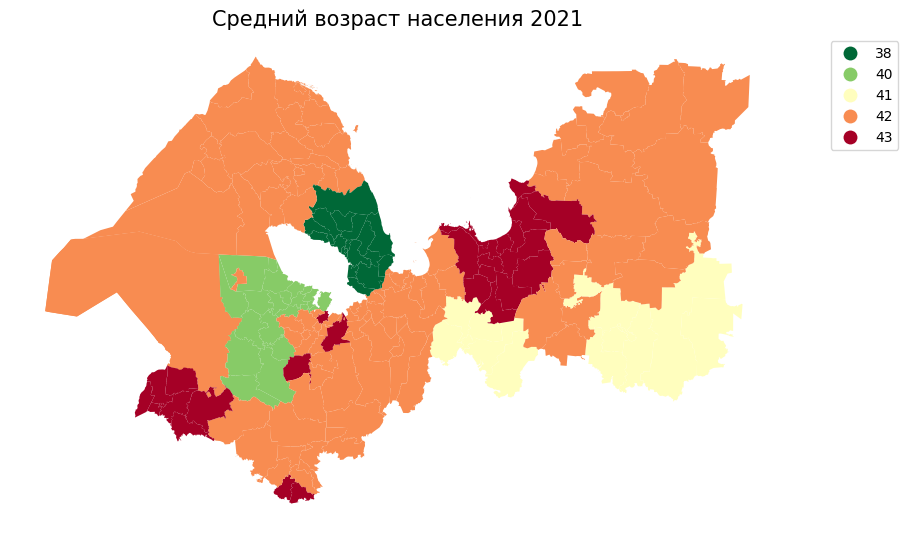

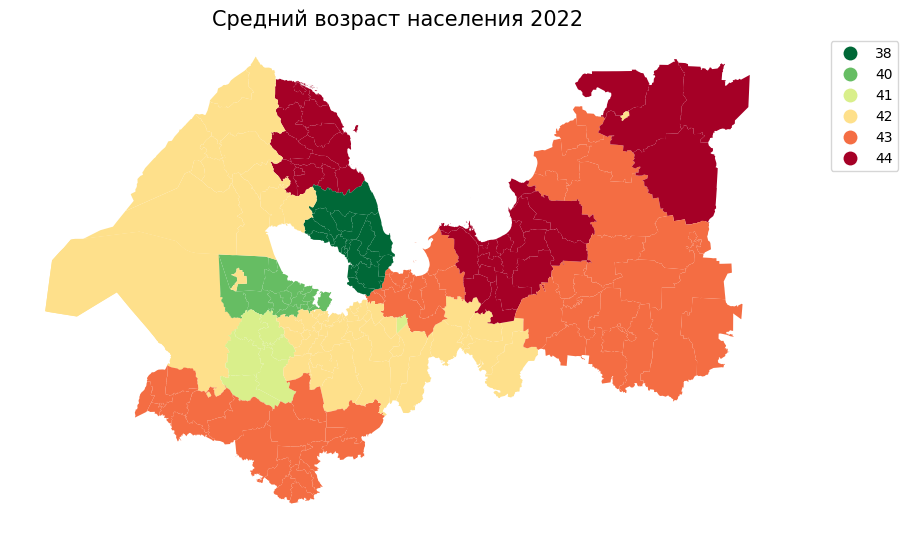

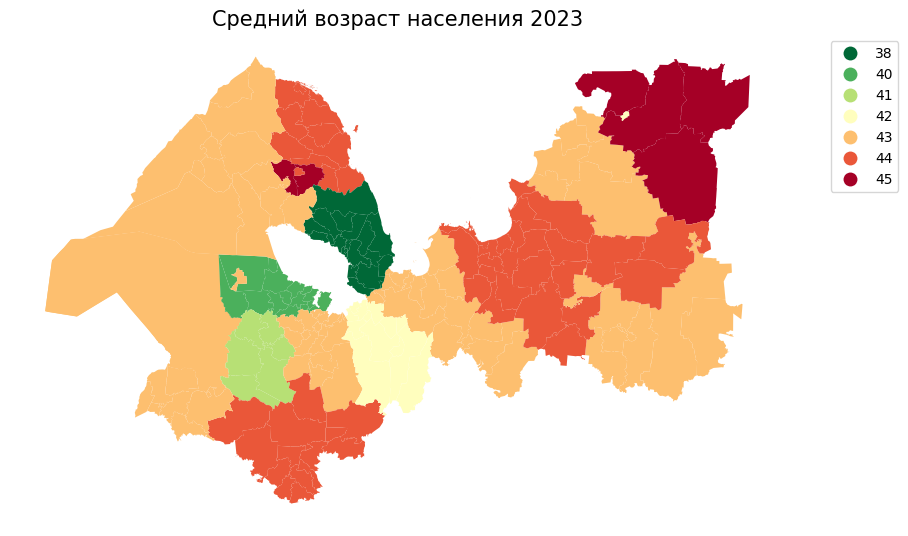

In [58]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Предполагаем, что gdf уже загружен и содержит столбцы 'geometry' и данные за годы

# Список годов для визуализации
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Создаем отдельные картинки для каждого года
for year in years:
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    # Визуализация с измененной цветовой шкалой
    gdf.plot(column=f'avg_age_{year}', ax=ax, legend=True, cmap='RdYlGn_r', 
             legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left', 'prop': {'size': 10}})
    ax.set_title(f'Средний возраст населения {year}', fontsize=15)
    ax.set_axis_off()  # Убираем рамку и оси координат
    plt.show()

# Смертность

### Смертность МО


In [59]:
ter_mo= gpd.read_file('data/Границы+население/Границы только МР.geojson')
ter_mo['geometry'] = ter_mo.geometry.apply(lambda x: x.difference(water.unary_union))
ter_mo = ter_mo.dropna(axis=1, how='all')
ter_mo

fid                                 name  \
0   200   Бокситогорский муниципальный район   
1   202    Кингисеппский муниципальный район   
2   201        Киришский муниципальный район   
3   207        Кировский муниципальный район   
4   203  Лодейнопольский муниципальный район   
5   204    Ломоносовский муниципальный район   
6   205     Подпорожский муниципальный район   
7   206      Приозерский муниципальный район   
8   188       Сосновоборский городской округ   
9   217      Волосовский муниципальный район   
10  215       Волховский муниципальный район   
11  210     Всеволожский муниципальный район   
12  211       Выборгский муниципальный район   
13  213       Гатчинский муниципальный район   
14  214          Лужский муниципальный район   
15  212      Сланцевский муниципальный район   
16  216       Тихвинский муниципальный район   
17  218      Тоснненский муниципальный район   

                                  layer    2019    2021    2022    2023  \
0    Бокситогорский муниципальный район   49256   48048   47236   50977   
1     Кингисеппский муниципальный район   76182   73714   72512   83838   
2         Киришский муниципальный район   62069   61474   60003   59877   
3         Кировский муниципальный район  105936  106077  104710  108460   
4   Лодейнопольский муниципальный район   28530   27651   27365   27548   
5     Ломоносовский муниципальный район   73475   78421   81817   85329   
6      Подпорожский муниципальный район   28263   27103   26547   25508   
7       Приозерский муниципальный район   61028   59903   59496   57047   
8        Сосновоборский городской округ   64121   67054   65941   64121   
9       Волосовский муниципальный район   51668   51587   51600   50211   
10       Волховский муниципальный район   51668   51587   51600   50211   
11     Всеволожский муниципальный район  398896  473514  506289  554288   
12       Выборгский муниципальный район  199571  195728  193863  195374   
13       Гатчинский муниципальный район  243156  232752  230324  261898   
14          Лужский муниципальный район   72035   70787   69153   67523   
15      Сланцевский муниципальный район   42494   42030   41931   45192   
16       Тихвинский муниципальный район   69567   68475   67768   66266   
17      Тоснненский муниципальный район  128327  123557  120734  133109   

      2020                                           geometry  
0    48625  POLYGON ((34.32777 59.19548, 34.32746 59.19544...  
1    74881  POLYGON ((28.19187 59.32671, 28.19185 59.32673...  
2    61474  POLYGON ((31.94327 59.42428, 31.93481 59.41883...  
3   106016  MULTIPOLYGON (((31.91722 59.95916, 31.91717 59...  
4    28032  MULTIPOLYGON (((33.02438 60.72112, 33.06224 60...  
5    76786  POLYGON ((29.45718 59.67313, 29.45392 59.67086...  
6    27689  POLYGON ((33.77158 61.23326, 33.79156 61.23320...  
7    60351  MULTIPOLYGON (((30.68940 60.50106, 30.68662 60...  
8    67720  POLYGON ((29.17425 59.85037, 29.15581 59.84976...  
9    51778  POLYGON ((28.98604 59.48401, 28.98321 59.48727...  
10   51778  MULTIPOLYGON (((32.84899 60.50379, 32.84623 60...  
11  438607  MULTIPOLYGON (((30.55200 59.96912, 30.55246 59...  
12  198226  POLYGON ((28.85880 60.04000, 28.82636 60.04088...  
13  238034  POLYGON ((29.63372 59.57069, 29.63286 59.57065...  
14   75307  POLYGON ((29.74807 58.43754, 29.74811 58.43758...  
15   42296  POLYGON ((28.55977 59.15308, 28.56023 59.15321...  
16   69457  POLYGON ((34.40750 60.15748, 34.41680 60.15734...  
17  126915  POLYGON ((30.68152 59.72665, 30.68134 59.72678...

In [60]:
import pandas as pd

data = {
    'Region': [
        'Бокситогорский', 'Волосовский', 'Волховский', 
        'Всеволожский', 'Выборгский', 'Гатчинский', 'Кингисеппский', 'Киришский',
        'Кировский', 'Лодейнопольский', 'Ломоносовский', 'Лужский', 'Подпорожский',
        'Приозерский', 'Сланцевский', 'Тихвинский', 'Тосненский', 'Сосновоборский'
    ],
    '2018': [939, 981, 1325, 3224, 2672, 3226, 1120, 913, 1262, 460, 922, 1367, 535, 893, 754, 1071, 1545, 731],
    '2019': [870, 635, 1325, 3311, 2520, 3076, 1076, 969, 1306, 485, 859, 1275, 515, 855, 773, 1096, 1681, 727],
    '2020': [932, 804, 1635, 4325, 2860, 3918, 1211, 1090, 1577, 582, 1057, 1639, 577, 989, 799, 1293, 1947, 883],
    '2021': [1099, 836, 1818, 5334, 3209, 4343, 1463, 1245, 1761, 622, 1135, 1718, 598, 1166, 985, 1403, 2379, 1011],
    '2022': [865, 693, 1425, 4630, 2610, 3414, 1257, 990, 1459, 460, 931, 1317, 514, 927, 764, 1159, 1733, 818]
}

# Creating the DataFrame
df_death = pd.DataFrame(data)

# Resetting the index to use a numeric index instead of regions
df_death.reset_index(drop=True, inplace=True)

# Viewing the modified DataFrame
df_death


Region  2018  2019  2020  2021  2022
0    Бокситогорский   939   870   932  1099   865
1       Волосовский   981   635   804   836   693
2        Волховский  1325  1325  1635  1818  1425
3      Всеволожский  3224  3311  4325  5334  4630
4        Выборгский  2672  2520  2860  3209  2610
5        Гатчинский  3226  3076  3918  4343  3414
6     Кингисеппский  1120  1076  1211  1463  1257
7         Киришский   913   969  1090  1245   990
8         Кировский  1262  1306  1577  1761  1459
9   Лодейнопольский   460   485   582   622   460
10    Ломоносовский   922   859  1057  1135   931
11          Лужский  1367  1275  1639  1718  1317
12     Подпорожский   535   515   577   598   514
13      Приозерский   893   855   989  1166   927
14      Сланцевский   754   773   799   985   764
15       Тихвинский  1071  1096  1293  1403  1159
16       Тосненский  1545  1681  1947  2379  1733
17   Сосновоборский   731   727   883  1011   818

In [61]:

# Определение функции нормализации названий
def normalize_name(name):
    name = name.lower().replace(' городской округ', '').replace(' муниципальный район', '')
    name = name.replace('тоснненский', 'тосненский')  # Пример специфической корректировки
    return name.strip()

# Применение функции нормализации к обоим DataFrame
df_death['normalized_region'] = df_death['Region'].apply(normalize_name)
ter_mo['normalized_region'] = ter_mo['name'].apply(normalize_name)

In [62]:
ter_mo

fid                                 name  \
0   200   Бокситогорский муниципальный район   
1   202    Кингисеппский муниципальный район   
2   201        Киришский муниципальный район   
3   207        Кировский муниципальный район   
4   203  Лодейнопольский муниципальный район   
5   204    Ломоносовский муниципальный район   
6   205     Подпорожский муниципальный район   
7   206      Приозерский муниципальный район   
8   188       Сосновоборский городской округ   
9   217      Волосовский муниципальный район   
10  215       Волховский муниципальный район   
11  210     Всеволожский муниципальный район   
12  211       Выборгский муниципальный район   
13  213       Гатчинский муниципальный район   
14  214          Лужский муниципальный район   
15  212      Сланцевский муниципальный район   
16  216       Тихвинский муниципальный район   
17  218      Тоснненский муниципальный район   

                                  layer    2019    2021    2022    2023  \
0    Бокситогорский муниципальный район   49256   48048   47236   50977   
1     Кингисеппский муниципальный район   76182   73714   72512   83838   
2         Киришский муниципальный район   62069   61474   60003   59877   
3         Кировский муниципальный район  105936  106077  104710  108460   
4   Лодейнопольский муниципальный район   28530   27651   27365   27548   
5     Ломоносовский муниципальный район   73475   78421   81817   85329   
6      Подпорожский муниципальный район   28263   27103   26547   25508   
7       Приозерский муниципальный район   61028   59903   59496   57047   
8        Сосновоборский городской округ   64121   67054   65941   64121   
9       Волосовский муниципальный район   51668   51587   51600   50211   
10       Волховский муниципальный район   51668   51587   51600   50211   
11     Всеволожский муниципальный район  398896  473514  506289  554288   
12       Выборгский муниципальный район  199571  195728  193863  195374   
13       Гатчинский муниципальный район  243156  232752  230324  261898   
14          Лужский муниципальный район   72035   70787   69153   67523   
15      Сланцевский муниципальный район   42494   42030   41931   45192   
16       Тихвинский муниципальный район   69567   68475   67768   66266   
17      Тоснненский муниципальный район  128327  123557  120734  133109   

      2020                                           geometry  \
0    48625  POLYGON ((34.32777 59.19548, 34.32746 59.19544...   
1    74881  POLYGON ((28.19187 59.32671, 28.19185 59.32673...   
2    61474  POLYGON ((31.94327 59.42428, 31.93481 59.41883...   
3   106016  MULTIPOLYGON (((31.91722 59.95916, 31.91717 59...   
4    28032  MULTIPOLYGON (((33.02438 60.72112, 33.06224 60...   
5    76786  POLYGON ((29.45718 59.67313, 29.45392 59.67086...   
6    27689  POLYGON ((33.77158 61.23326, 33.79156 61.23320...   
7    60351  MULTIPOLYGON (((30.68940 60.50106, 30.68662 60...   
8    67720  POLYGON ((29.17425 59.85037, 29.15581 59.84976...   
9    51778  POLYGON ((28.98604 59.48401, 28.98321 59.48727...   
10   51778  MULTIPOLYGON (((32.84899 60.50379, 32.84623 60...   
11  438607  MULTIPOLYGON (((30.55200 59.96912, 30.55246 59...   
12  198226  POLYGON ((28.85880 60.04000, 28.82636 60.04088...   
13  238034  POLYGON ((29.63372 59.57069, 29.63286 59.57065...   
14   75307  POLYGON ((29.74807 58.43754, 29.74811 58.43758...   
15   42296  POLYGON ((28.55977 59.15308, 28.56023 59.15321...   
16   69457  POLYGON ((34.40750 60.15748, 34.41680 60.15734...   
17  126915  POLYGON ((30.68152 59.72665, 30.68134 59.72678...   

   normalized_region  
0     бокситогорский  
1      кингисеппский  
2          киришский  
3          кировский  
4    лодейнопольский  
5      ломоносовский  
6       подпорожский  
7        приозерский  
8     сосновоборский  
9        волосовский  
10        волховский  
11      всеволожский  
12        выборгский  
13        гатчинский  
14           лужский  
15       сланцевский  
16        тихвинский  
17        тосне

In [63]:
df_death

Region  2018  2019  2020  2021  2022 normalized_region
0    Бокситогорский   939   870   932  1099   865    бокситогорский
1       Волосовский   981   635   804   836   693       волосовский
2        Волховский  1325  1325  1635  1818  1425        волховский
3      Всеволожский  3224  3311  4325  5334  4630      всеволожский
4        Выборгский  2672  2520  2860  3209  2610        выборгский
5        Гатчинский  3226  3076  3918  4343  3414        гатчинский
6     Кингисеппский  1120  1076  1211  1463  1257     кингисеппский
7         Киришский   913   969  1090  1245   990         киришский
8         Кировский  1262  1306  1577  1761  1459         кировский
9   Лодейнопольский   460   485   582   622   460   лодейнопольский
10    Ломоносовский   922   859  1057  1135   931     ломоносовский
11          Лужский  1367  1275  1639  1718  1317           лужский
12     Подпорожский   535   515   577   598   514      подпорожский
13      Приозерский   893   855   989  1166   927       приозерский
14      Сланцевский   754   773   799   985   764       сланцевский
15       Тихвинский  1071  1096  1293  1403  1159        тихвинский
16       Тосненский  1545  1681  1947  2379  1733        тосненский
17   Сосновоборский   731   727   883  1011   818    сосновоборский

In [64]:

ter_mo['death_2018'] = 0
ter_mo['death_2019'] = 0
ter_mo['death_2020'] = 0
ter_mo['death_2021'] = 0
ter_mo['death_2022'] = 0


# Проходим по каждой строке в final_df и ищем совпадения в ter_gp
for index, row in df_death.iterrows():
    # Используем str.contains для проверки наличия подстроки, предполагая, что значения в 'region' могут частично совпадать с 'name'
    matches = ter_mo['normalized_region'].str.contains(row['normalized_region'], na=False)
    if matches.any():
        # Обновляем данные миграции для всех соответствующих строк в ter_gp
        ter_mo.loc[matches, 'death_2018'] += row['2018'] if pd.notna(row['2018']) else 0
        ter_mo.loc[matches, 'death_2019'] += row['2019'] if pd.notna(row['2019']) else 0
        ter_mo.loc[matches, 'death_2020'] += row['2020'] if pd.notna(row['2020']) else 0
        ter_mo.loc[matches, 'death_2021'] += row['2021'] if pd.notna(row['2021']) else 0
        ter_mo.loc[matches, 'death_2022'] += row['2022'] if pd.notna(row['2022']) else 0

In [65]:

columns_to_drop = ['2019', '2021', '2022', '2023', '2020', 'layer', 'fid', 'normalized_region']  # Замените на имена столбцов, которые нужно удалить
# Создание нового GeoDataFrame без указанных столбцов
ter_mo = ter_mo.drop(columns=columns_to_drop)
ter_mo

name  \
0    Бокситогорский муниципальный район   
1     Кингисеппский муниципальный район   
2         Киришский муниципальный район   
3         Кировский муниципальный район   
4   Лодейнопольский муниципальный район   
5     Ломоносовский муниципальный район   
6      Подпорожский муниципальный район   
7       Приозерский муниципальный район   
8        Сосновоборский городской округ   
9       Волосовский муниципальный район   
10       Волховский муниципальный район   
11     Всеволожский муниципальный район   
12       Выборгский муниципальный район   
13       Гатчинский муниципальный район   
14          Лужский муниципальный район   
15      Сланцевский муниципальный район   
16       Тихвинский муниципальный район   
17      Тоснненский муниципальный район   

                                             geometry  death_2018  death_2019  \
0   POLYGON ((34.32777 59.19548, 34.32746 59.19544...         939         870   
1   POLYGON ((28.19187 59.32671, 28.19185 59.32673...        1120        1076   
2   POLYGON ((31.94327 59.42428, 31.93481 59.41883...         913         969   
3   MULTIPOLYGON (((31.91722 59.95916, 31.91717 59...        1262        1306   
4   MULTIPOLYGON (((33.02438 60.72112, 33.06224 60...         460         485   
5   POLYGON ((29.45718 59.67313, 29.45392 59.67086...         922         859   
6   POLYGON ((33.77158 61.23326, 33.79156 61.23320...         535         515   
7   MULTIPOLYGON (((30.68940 60.50106, 30.68662 60...         893         855   
8   POLYGON ((29.17425 59.85037, 29.15581 59.84976...         731         727   
9   POLYGON ((28.98604 59.48401, 28.98321 59.48727...         981         635   
10  MULTIPOLYGON (((32.84899 60.50379, 32.84623 60...        1325        1325   
11  MULTIPOLYGON (((30.55200 59.96912, 30.55246 59...        3224        3311   
12  POLYGON ((28.85880 60.04000, 28.82636 60.04088...        2672        2520   
13  POLYGON ((29.63372 59.57069, 29.63286 59.57065...        3226        3076   
14  POLYGON ((29.74807 58.43754, 29.74811 58.43758...        1367        1275   
15  POLYGON ((28.55977 59.15308, 28.56023 59.15321...         754         773   
16  POLYGON ((34.40750 60.15748, 34.41680 60.15734...        1071        1096   
17  POLYGON ((30.68152 59.72665, 30.68134 59.72678...        1545        1681   

    death_2020  death_2021  death_2022  
0          932        1099         865  
1         1211        1463        1257  
2         1090        1245         990  
3         1577        1761        1459  
4          582         622         460  
5         1057        1135         931  
6          577         598         514  
7          989        1166         927  
8          883        1011         818  
9          804         836         693  
10        1635        1818        1425  
11        4325        5334        4630  
12        2860        3209        2610  
13        3918        4343        3414  
14        1639        1718        1317  
15         799         985         764  
16        1293        1403        1159  
17        1947        2379        1733

In [66]:
ter_mo

name  \
0    Бокситогорский муниципальный район   
1     Кингисеппский муниципальный район   
2         Киришский муниципальный район   
3         Кировский муниципальный район   
4   Лодейнопольский муниципальный район   
5     Ломоносовский муниципальный район   
6      Подпорожский муниципальный район   
7       Приозерский муниципальный район   
8        Сосновоборский городской округ   
9       Волосовский муниципальный район   
10       Волховский муниципальный район   
11     Всеволожский муниципальный район   
12       Выборгский муниципальный район   
13       Гатчинский муниципальный район   
14          Лужский муниципальный район   
15      Сланцевский муниципальный район   
16       Тихвинский муниципальный район   
17      Тоснненский муниципальный район   

                                             geometry  death_2018  death_2019  \
0   POLYGON ((34.32777 59.19548, 34.32746 59.19544...         939         870   
1   POLYGON ((28.19187 59.32671, 28.19185 59.32673...        1120        1076   
2   POLYGON ((31.94327 59.42428, 31.93481 59.41883...         913         969   
3   MULTIPOLYGON (((31.91722 59.95916, 31.91717 59...        1262        1306   
4   MULTIPOLYGON (((33.02438 60.72112, 33.06224 60...         460         485   
5   POLYGON ((29.45718 59.67313, 29.45392 59.67086...         922         859   
6   POLYGON ((33.77158 61.23326, 33.79156 61.23320...         535         515   
7   MULTIPOLYGON (((30.68940 60.50106, 30.68662 60...         893         855   
8   POLYGON ((29.17425 59.85037, 29.15581 59.84976...         731         727   
9   POLYGON ((28.98604 59.48401, 28.98321 59.48727...         981         635   
10  MULTIPOLYGON (((32.84899 60.50379, 32.84623 60...        1325        1325   
11  MULTIPOLYGON (((30.55200 59.96912, 30.55246 59...        3224        3311   
12  POLYGON ((28.85880 60.04000, 28.82636 60.04088...        2672        2520   
13  POLYGON ((29.63372 59.57069, 29.63286 59.57065...        3226        3076   
14  POLYGON ((29.74807 58.43754, 29.74811 58.43758...        1367        1275   
15  POLYGON ((28.55977 59.15308, 28.56023 59.15321...         754         773   
16  POLYGON ((34.40750 60.15748, 34.41680 60.15734...        1071        1096   
17  POLYGON ((30.68152 59.72665, 30.68134 59.72678...        1545        1681   

    death_2020  death_2021  death_2022  
0          932        1099         865  
1         1211        1463        1257  
2         1090        1245         990  
3         1577        1761        1459  
4          582         622         460  
5         1057        1135         931  
6          577         598         514  
7          989        1166         927  
8          883        1011         818  
9          804         836         693  
10        1635        1818        1425  
11        4325        5334        4630  
12        2860        3209        2610  
13        3918        4343        3414  
14        1639        1718        1317  
15         799         985         764  
16        1293        1403        1159  
17        1947        2379        1733

In [67]:
# ter_mo.to_file("death_mo.geojson", driver='GeoJSON')

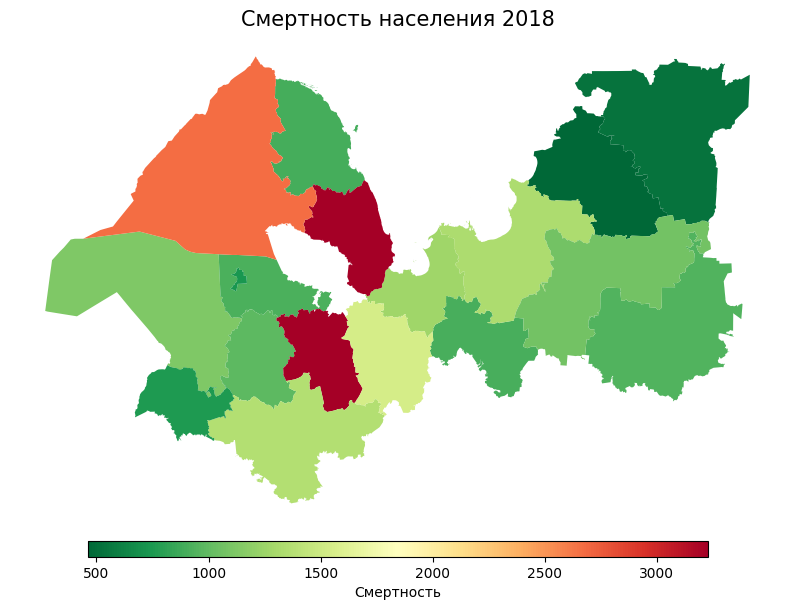

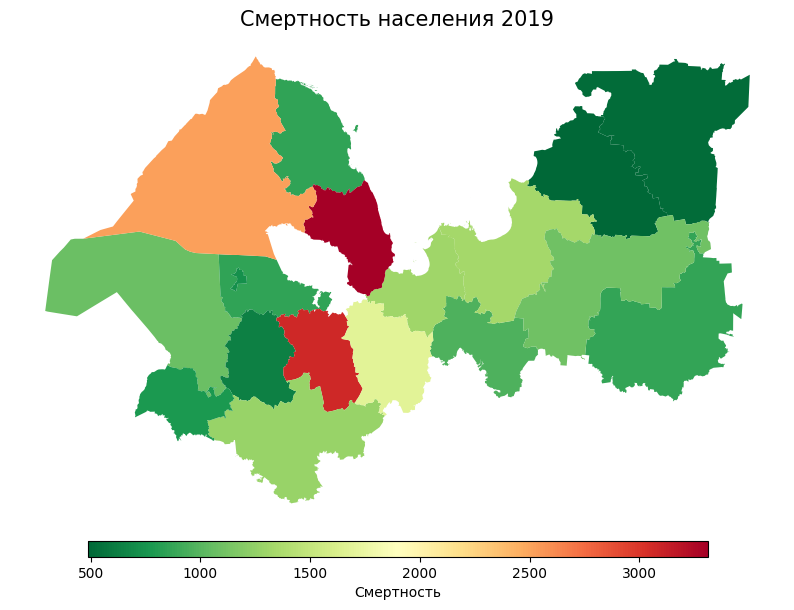

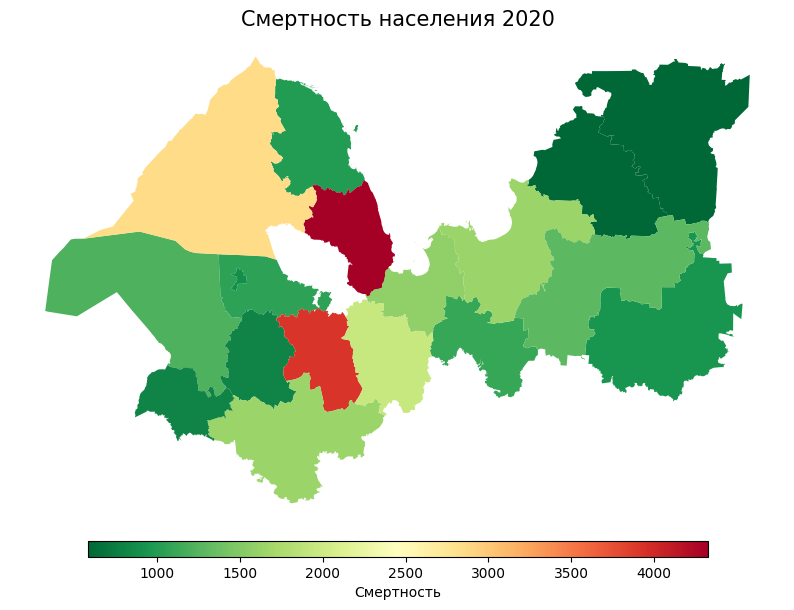

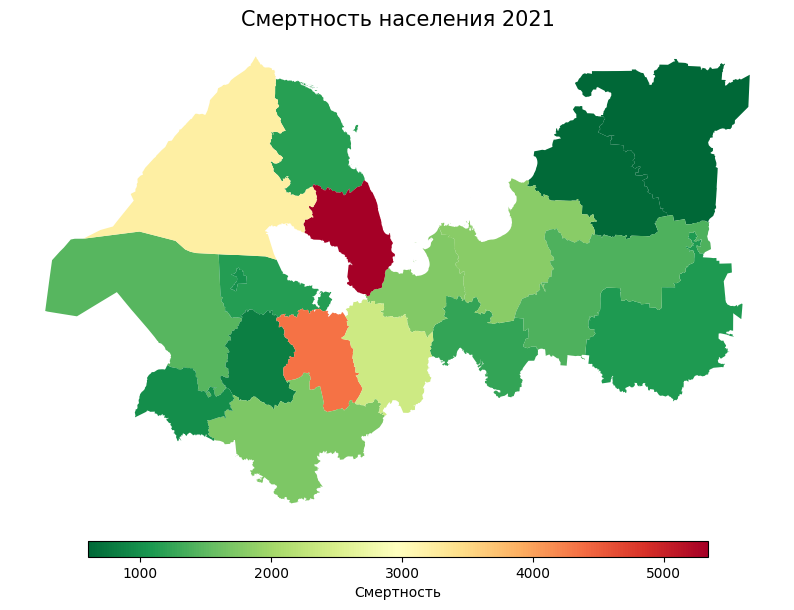

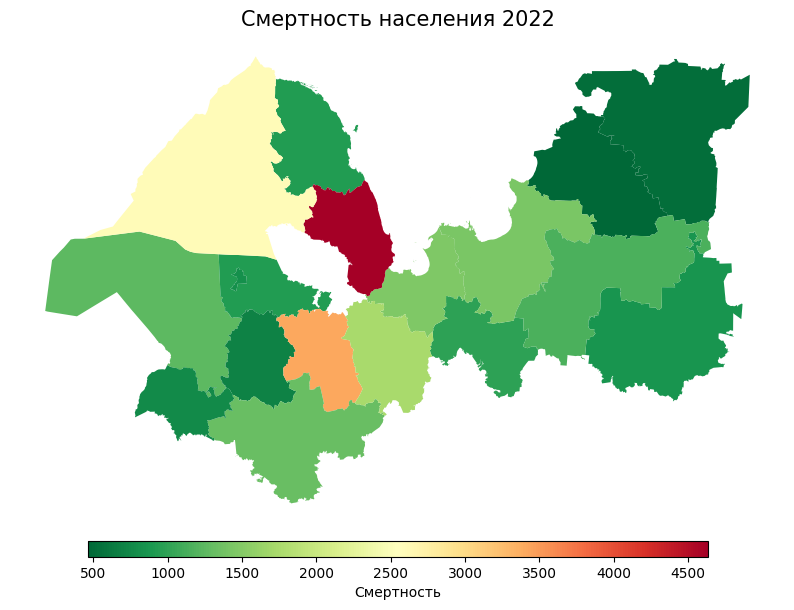

In [68]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming gdf is already loaded and contains 'geometry' and data columns for the years

# List of years for visualization
years = ['2018', '2019', '2020', '2021', '2022']

# Create separate plots for each year
for year in years:
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    # Visualization with adjusted color scale
    ter_mo.plot(column=f'death_{year}', ax=ax, legend=True, cmap='RdYlGn_r', 
             legend_kwds={'label': "Смертность", 
                          'orientation': "horizontal",
                          'shrink': 0.8,
                          'aspect': 40,
                          'pad': 0.02})
    ax.set_title(f'Смертность населения {year}', fontsize=15)
    ax.set_axis_off()  # Remove the frame and axes
    plt.show()


### Смертность ГП


In [69]:
ter_gp= gpd.read_file('data/Границы+население/Границы только ГП и СП.geojson')
ter_gp['geometry'] = ter_gp.geometry.apply(lambda x: x.difference(water.unary_union))
ter_gp = ter_gp.dropna(axis=1, how='all')
# Определение функции нормализации названий
def normalize_name(name):
    name = name.lower().replace(' городской округ', '').replace(' муниципальный район', '')
    name = name.replace('тоснненский', 'тосненский')  # Пример специфической корректировки
    return name.strip()

ter_gp['normalized_region'] = ter_gp['layer'].apply(normalize_name)

ter_gp


fid                                name  \
0      7     Самойловское сельское поселение   
1      2   Большедворское сельское поселение   
2      6     Пикалевское городское поселение   
3      3          Борское сельское поселение   
4      1  Бокситогорское городское поселение   
..   ...                                 ...   
183  185     Фёдоровское городское поселение   
184  179       Нурминское сельское поселение   
185  175   Красноборское городское поселение   
186  183  Трубникоборское сельское поселение   
187  176        Лисинское сельское поселение   

                                  layer   2019   2021   2022   2023   2020  \
0    Бокситогорский муниципальный район   2069   2085   2096   2154   2088   
1    Бокситогорский муниципальный район   1575   1505   1486   1698   1528   
2    Бокситогорский муниципальный район  19981  19490  19250  20169  19746   
3    Бокситогорский муниципальный район   3312   3301   3272   3393   3279   
4    Бокситогорский муниципальный район  15370  15088  14606  15960  15200   
..                                  ...    ...    ...    ...    ...    ...   
183     Тоснненский муниципальный район   4460   4450   4562   6083   4536   
184     Тоснненский муниципальный район   3127   3018   2977   3354   3090   
185     Тоснненский муниципальный район   5145   4825   4657   4507   5006   
186     Тоснненский муниципальный район   1603   1541   1479   1620   1583   
187     Тоснненский муниципальный район   1984   1789   1703   1919   1856   

                                              geometry normalized_region  
0    POLYGON ((34.42428 59.67150, 34.42548 59.66226...    бокситогорский  
1    POLYGON ((34.30791 59.71295, 34.30701 59.71290...    бокситогорский  
2    POLYGON ((34.13616 59.49064, 34.13765 59.49429...    бокситогорский  
3    POLYGON ((34.06007 59.14658, 34.05620 59.14430...    бокситогорский  
4    POLYGON ((34.05535 59.40393, 34.05026 59.40426...    бокситогорский  
..                                                 ...               ...  
183  POLYGON ((30.52316 59.69108, 30.52335 59.69094...        тосненский  
184  POLYGON ((31.01394 59.63327, 31.01824 59.63223...        тосненский  
185  POLYGON ((30.58367 59.65002, 30.58381 59.65022...        тосненский  
186  POLYGON ((31.13522 59.09693, 31.13672 59.09956...        тосненский  
187  POLYGON ((30.59899 59.48310, 30.59966 59.48256...        тосненский  

[188 rows x 10 columns]

In [70]:
ter_mo['normalized_region'] = ter_mo['name'].apply(normalize_name)
ter_mo

name  \
0    Бокситогорский муниципальный район   
1     Кингисеппский муниципальный район   
2         Киришский муниципальный район   
3         Кировский муниципальный район   
4   Лодейнопольский муниципальный район   
5     Ломоносовский муниципальный район   
6      Подпорожский муниципальный район   
7       Приозерский муниципальный район   
8        Сосновоборский городской округ   
9       Волосовский муниципальный район   
10       Волховский муниципальный район   
11     Всеволожский муниципальный район   
12       Выборгский муниципальный район   
13       Гатчинский муниципальный район   
14          Лужский муниципальный район   
15      Сланцевский муниципальный район   
16       Тихвинский муниципальный район   
17      Тоснненский муниципальный район   

                                             geometry  death_2018  death_2019  \
0   POLYGON ((34.32777 59.19548, 34.32746 59.19544...         939         870   
1   POLYGON ((28.19187 59.32671, 28.19185 59.32673...        1120        1076   
2   POLYGON ((31.94327 59.42428, 31.93481 59.41883...         913         969   
3   MULTIPOLYGON (((31.91722 59.95916, 31.91717 59...        1262        1306   
4   MULTIPOLYGON (((33.02438 60.72112, 33.06224 60...         460         485   
5   POLYGON ((29.45718 59.67313, 29.45392 59.67086...         922         859   
6   POLYGON ((33.77158 61.23326, 33.79156 61.23320...         535         515   
7   MULTIPOLYGON (((30.68940 60.50106, 30.68662 60...         893         855   
8   POLYGON ((29.17425 59.85037, 29.15581 59.84976...         731         727   
9   POLYGON ((28.98604 59.48401, 28.98321 59.48727...         981         635   
10  MULTIPOLYGON (((32.84899 60.50379, 32.84623 60...        1325        1325   
11  MULTIPOLYGON (((30.55200 59.96912, 30.55246 59...        3224        3311   
12  POLYGON ((28.85880 60.04000, 28.82636 60.04088...        2672        2520   
13  POLYGON ((29.63372 59.57069, 29.63286 59.57065...        3226        3076   
14  POLYGON ((29.74807 58.43754, 29.74811 58.43758...        1367        1275   
15  POLYGON ((28.55977 59.15308, 28.56023 59.15321...         754         773   
16  POLYGON ((34.40750 60.15748, 34.41680 60.15734...        1071        1096   
17  POLYGON ((30.68152 59.72665, 30.68134 59.72678...        1545        1681   

    death_2020  death_2021  death_2022 normalized_region  
0          932        1099         865    бокситогорский  
1         1211        1463        1257     кингисеппский  
2         1090        1245         990         киришский  
3         1577        1761        1459         кировский  
4          582         622         460   лодейнопольский  
5         1057        1135         931     ломоносовский  
6          577         598         514      подпорожский  
7          989        1166         927       приозерский  
8          883        1011         818    сосновоборский  
9          804         836         693       волосовский  
10        1635        1818        1425        волховский  
11        4325        5334        4630      всеволожский  
12        2860        3209        2610        выборгский  
13        3918        4343        3414        гатчинский  
14        1639        1718        1317           лужский  
15         799         985         764       сланцевский  
16        1293        1403        1159        тихвинский  
17        1947        2379        1733        тосненский

In [71]:
import pandas as pd
import geopandas as gpd
import numpy as np

def distribute_mortality(city_gdf, mortality_gdf, population_years):
    # Преобразование типов данных в числовые, если это необходимо
    for year in population_years:
        city_gdf[year] = pd.to_numeric(city_gdf[year], errors='coerce')
        mortality_gdf[f'death_{year}'] = pd.to_numeric(mortality_gdf[f'death_{year}'], errors='coerce')

    # Объединение данных о смертности с данными о городах
    merged = city_gdf.merge(mortality_gdf, on='normalized_region', how='left')

    # Расчет общей численности населения по годам в каждом МО
    for year in population_years:
        merged[f'total_population_{year}'] = merged.groupby('normalized_region')[year].transform('sum')

    # Распределение данных о смертности
    for year in population_years:
        # Расчет доли населения каждого города в МО
        merged[f'population_share_{year}'] = merged[year] / merged[f'total_population_{year}']

        # Распределение смертности на основе доли населения
        death_col = f'death_{year}'
        if death_col in mortality_gdf.columns:
            # Применение округления вниз для получения целого числа смертей
            merged[death_col] = np.floor(merged[death_col] * merged[f'population_share_{year}']).astype(int)

    # Отбор нужных столбцов для результата
    result_columns = ['name_x', 'layer', 'geometry_x'] + [f'death_{year}' for year in population_years]
    result = merged[result_columns]

    # Переименование столбцов
    result.rename(columns={'name_x': 'name', 'geometry_x': 'geometry'}, inplace=True)

    # Преобразование DataFrame обратно в GeoDataFrame
    result = gpd.GeoDataFrame(result, geometry='geometry')

    return result

# Пример использования

population_years = ['2019', '2020', '2021', '2022']
result_df = distribute_mortality(ter_gp, ter_mo, population_years)
result_df


name                               layer  \
0       Самойловское сельское поселение  Бокситогорский муниципальный район   
1     Большедворское сельское поселение  Бокситогорский муниципальный район   
2       Пикалевское городское поселение  Бокситогорский муниципальный район   
3            Борское сельское поселение  Бокситогорский муниципальный район   
4    Бокситогорское городское поселение  Бокситогорский муниципальный район   
..                                  ...                                 ...   
183     Фёдоровское городское поселение     Тоснненский муниципальный район   
184       Нурминское сельское поселение     Тоснненский муниципальный район   
185   Красноборское городское поселение     Тоснненский муниципальный район   
186  Трубникоборское сельское поселение     Тоснненский муниципальный район   
187        Лисинское сельское поселение     Тоснненский муниципальный район   

                                              geometry  death_2019  \
0    POLYGON ((34.42428 59.67150, 34.42548 59.66226...          36   
1    POLYGON ((34.30791 59.71295, 34.30701 59.71290...          27   
2    POLYGON ((34.13616 59.49064, 34.13765 59.49429...         352   
3    POLYGON ((34.06007 59.14658, 34.05620 59.14430...          58   
4    POLYGON ((34.05535 59.40393, 34.05026 59.40426...         271   
..                                                 ...         ...   
183  POLYGON ((30.52316 59.69108, 30.52335 59.69094...          58   
184  POLYGON ((31.01394 59.63327, 31.01824 59.63223...          40   
185  POLYGON ((30.58367 59.65002, 30.58381 59.65022...          67   
186  POLYGON ((31.13522 59.09693, 31.13672 59.09956...          20   
187  POLYGON ((30.59899 59.48310, 30.59966 59.48256...          25   

     death_2020  death_2021  death_2022  
0            40          47          38  
1            29          34          27  
2           378         445         352  
3            62          75          59  
4           291         345         267  
..          ...         ...         ...  
183          69          85          65  
184          47          58          42  
185          76          92          66  
186          24          29          21  
187          28          34          24  

[188 rows x 7 columns]

In [72]:
# result_df.to_file("death_gp.geojson", driver='GeoJSON')

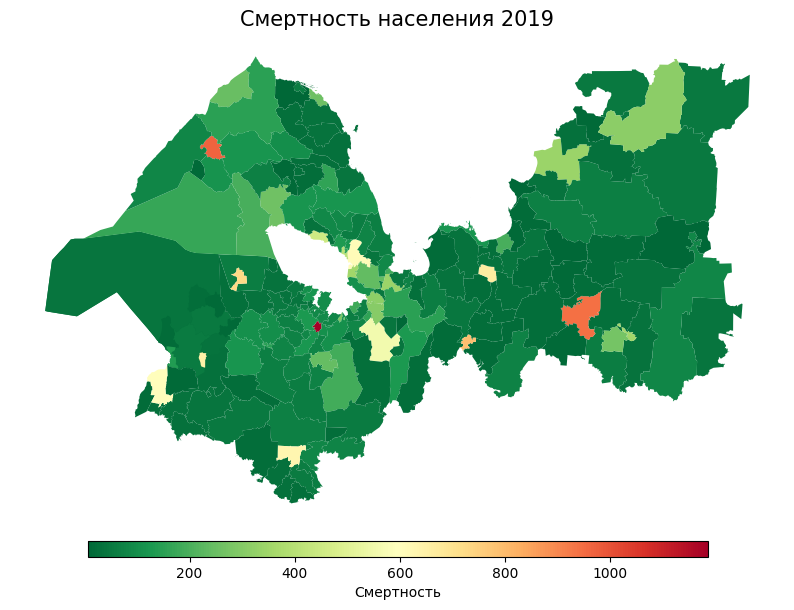

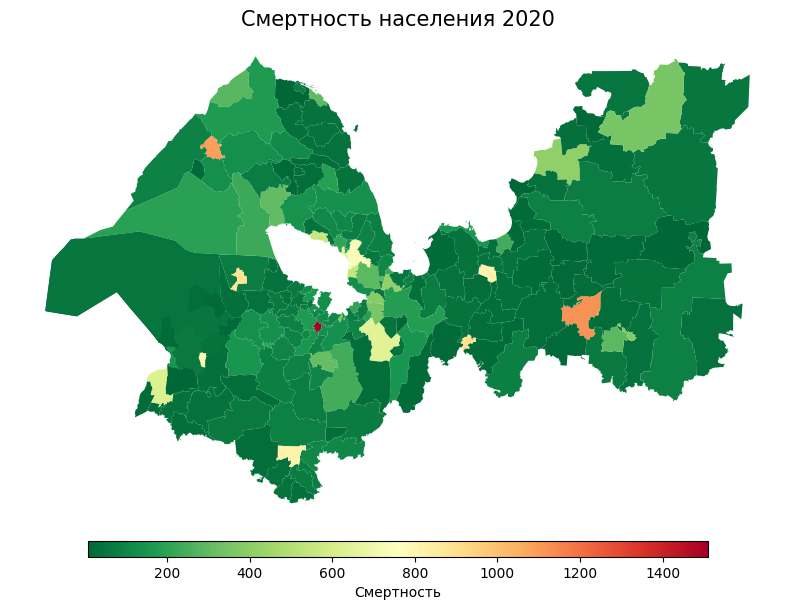

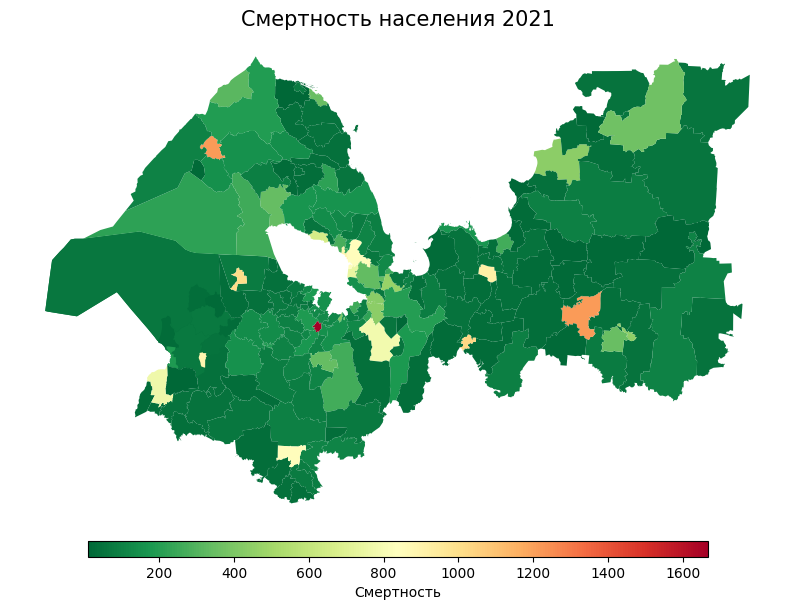

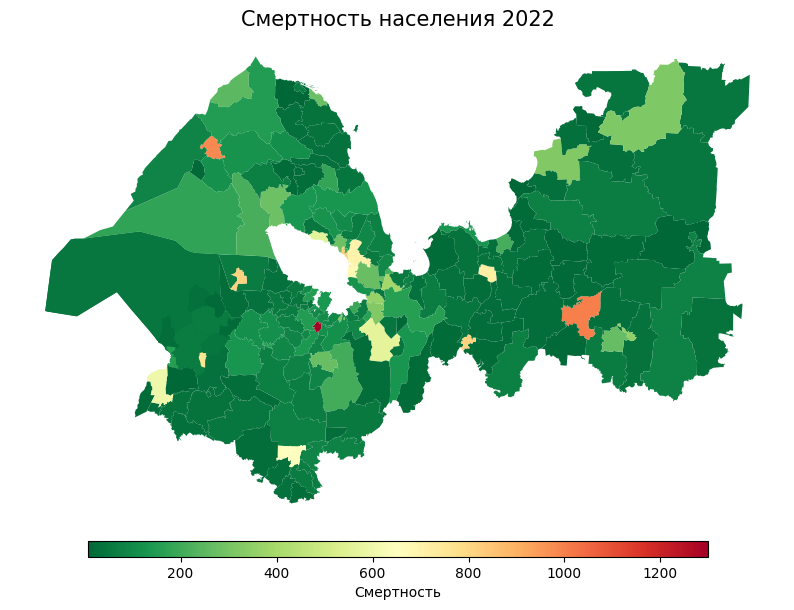

In [73]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming gdf is already loaded and contains 'geometry' and data columns for the years

# List of years for visualization
years = ['2019', '2020', '2021', '2022']

# Create separate plots for each year
for year in years:
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    # Visualization with adjusted color scale
    result_df.plot(column=f'death_{year}', ax=ax, legend=True, cmap='RdYlGn_r', 
             legend_kwds={'label': "Смертность", 
                          'orientation': "horizontal",
                          'shrink': 0.8,
                          'aspect': 40,
                          'pad': 0.02})
    ax.set_title(f'Смертность населения {year}', fontsize=15)
    ax.set_axis_off()  # Remove the frame and axes
    plt.show()


# Рождаемость

### Рождаемость МО

In [74]:
ter_mo= gpd.read_file('data/Границы+население/Границы только МР.geojson')
ter_mo['geometry'] = ter_mo.geometry.apply(lambda x: x.difference(water.unary_union))
ter_mo = ter_mo.dropna(axis=1, how='all')
ter_mo

fid                                 name  \
0   200   Бокситогорский муниципальный район   
1   202    Кингисеппский муниципальный район   
2   201        Киришский муниципальный район   
3   207        Кировский муниципальный район   
4   203  Лодейнопольский муниципальный район   
5   204    Ломоносовский муниципальный район   
6   205     Подпорожский муниципальный район   
7   206      Приозерский муниципальный район   
8   188       Сосновоборский городской округ   
9   217      Волосовский муниципальный район   
10  215       Волховский муниципальный район   
11  210     Всеволожский муниципальный район   
12  211       Выборгский муниципальный район   
13  213       Гатчинский муниципальный район   
14  214          Лужский муниципальный район   
15  212      Сланцевский муниципальный район   
16  216       Тихвинский муниципальный район   
17  218      Тоснненский муниципальный район   

                                  layer    2019    2021    2022    2023  \
0    Бокситогорский муниципальный район   49256   48048   47236   50977   
1     Кингисеппский муниципальный район   76182   73714   72512   83838   
2         Киришский муниципальный район   62069   61474   60003   59877   
3         Кировский муниципальный район  105936  106077  104710  108460   
4   Лодейнопольский муниципальный район   28530   27651   27365   27548   
5     Ломоносовский муниципальный район   73475   78421   81817   85329   
6      Подпорожский муниципальный район   28263   27103   26547   25508   
7       Приозерский муниципальный район   61028   59903   59496   57047   
8        Сосновоборский городской округ   64121   67054   65941   64121   
9       Волосовский муниципальный район   51668   51587   51600   50211   
10       Волховский муниципальный район   51668   51587   51600   50211   
11     Всеволожский муниципальный район  398896  473514  506289  554288   
12       Выборгский муниципальный район  199571  195728  193863  195374   
13       Гатчинский муниципальный район  243156  232752  230324  261898   
14          Лужский муниципальный район   72035   70787   69153   67523   
15      Сланцевский муниципальный район   42494   42030   41931   45192   
16       Тихвинский муниципальный район   69567   68475   67768   66266   
17      Тоснненский муниципальный район  128327  123557  120734  133109   

      2020                                           geometry  
0    48625  POLYGON ((34.32777 59.19548, 34.32746 59.19544...  
1    74881  POLYGON ((28.19187 59.32671, 28.19185 59.32673...  
2    61474  POLYGON ((31.94327 59.42428, 31.93481 59.41883...  
3   106016  MULTIPOLYGON (((31.91722 59.95916, 31.91717 59...  
4    28032  MULTIPOLYGON (((33.02438 60.72112, 33.06224 60...  
5    76786  POLYGON ((29.45718 59.67313, 29.45392 59.67086...  
6    27689  POLYGON ((33.77158 61.23326, 33.79156 61.23320...  
7    60351  MULTIPOLYGON (((30.68940 60.50106, 30.68662 60...  
8    67720  POLYGON ((29.17425 59.85037, 29.15581 59.84976...  
9    51778  POLYGON ((28.98604 59.48401, 28.98321 59.48727...  
10   51778  MULTIPOLYGON (((32.84899 60.50379, 32.84623 60...  
11  438607  MULTIPOLYGON (((30.55200 59.96912, 30.55246 59...  
12  198226  POLYGON ((28.85880 60.04000, 28.82636 60.04088...  
13  238034  POLYGON ((29.63372 59.57069, 29.63286 59.57065...  
14   75307  POLYGON ((29.74807 58.43754, 29.74811 58.43758...  
15   42296  POLYGON ((28.55977 59.15308, 28.56023 59.15321...  
16   69457  POLYGON ((34.40750 60.15748, 34.41680 60.15734...  
17  126915  POLYGON ((30.68152 59.72665, 30.68134 59.72678...

In [75]:
import pandas as pd

# Your data as defined earlier
data = {
    'Region': [
        'Бокситогорский', 'Волосовский', 'Волховский', 
        'Всеволожский', 'Выборгский', 'Гатчинский', 'Кингисеппский', 'Киришский',
        'Кировский', 'Лодейнопольский', 'Ломоносовский', 'Лужский', 'Подпорожский',
        'Приозерский', 'Сланцевский', 'Тихвинский', 'Тосненский', 'Сосновоборский'
    ],
    '2018': [362, 376, 621, 3213, 1444, 1791, 623, 525, 763, 229, 432, 559, 200, 487, 276, 594, 845, 610],
    '2019': [338, 348, 626, 3303, 1385, 1714, 587, 502, 708, 196, 427, 510, 213, 429, 302, 556, 813, 521],
    '2020': [343, 340, 569, 3384, 1302, 1715, 562, 503, 716, 176, 442, 513, 195, 421, 282, 527, 754, 560],
    '2021': [326, 318, 567, 3381, 1293, 1611, 490, 530, 706, 196, 473, 462, 189, 377, 271, 535, 782, 521],
    '2022': [298, 307, 500, 3301, 1104, 1477, 514, 457, 682, 164, 466, 419, 154, 376, 248, 460, 717, 394]
}

# Creating the DataFrame
df_birth = pd.DataFrame(data)

# Resetting the index to use a numeric index instead of regions
df_birth.reset_index(drop=True, inplace=True)

# Viewing the modified DataFrame
df_birth

Region  2018  2019  2020  2021  2022
0    Бокситогорский   362   338   343   326   298
1       Волосовский   376   348   340   318   307
2        Волховский   621   626   569   567   500
3      Всеволожский  3213  3303  3384  3381  3301
4        Выборгский  1444  1385  1302  1293  1104
5        Гатчинский  1791  1714  1715  1611  1477
6     Кингисеппский   623   587   562   490   514
7         Киришский   525   502   503   530   457
8         Кировский   763   708   716   706   682
9   Лодейнопольский   229   196   176   196   164
10    Ломоносовский   432   427   442   473   466
11          Лужский   559   510   513   462   419
12     Подпорожский   200   213   195   189   154
13      Приозерский   487   429   421   377   376
14      Сланцевский   276   302   282   271   248
15       Тихвинский   594   556   527   535   460
16       Тосненский   845   813   754   782   717
17   Сосновоборский   610   521   560   521   394

In [76]:

# Определение функции нормализации названий
def normalize_name(name):
    name = name.lower().replace(' городской округ', '').replace(' муниципальный район', '')
    name = name.replace('тоснненский', 'тосненский')  # Пример специфической корректировки
    return name.strip()

# Применение функции нормализации к обоим DataFrame
df_birth['normalized_region'] = df_birth['Region'].apply(normalize_name)
ter_mo['normalized_region'] = ter_mo['name'].apply(normalize_name)

In [77]:

# Создаем новые колонки для миграции в ter_gp
ter_mo['birth_2018'] = 0
ter_mo['birth_2019'] = 0
ter_mo['birth_2020'] = 0
ter_mo['birth_2021'] = 0
ter_mo['birth_2022'] = 0


# Проходим по каждой строке в final_df и ищем совпадения в ter_gp
for index, row in df_birth.iterrows():
    # Используем str.contains для проверки наличия подстроки, предполагая, что значения в 'region' могут частично совпадать с 'name'
    matches = ter_mo['normalized_region'].str.contains(row['normalized_region'], na=False)
    if matches.any():
        # Обновляем данные миграции для всех соответствующих строк в ter_gp
        ter_mo.loc[matches, 'birth_2018'] += row['2018'] if pd.notna(row['2018']) else 0
        ter_mo.loc[matches, 'birth_2019'] += row['2019'] if pd.notna(row['2019']) else 0
        ter_mo.loc[matches, 'birth_2020'] += row['2020'] if pd.notna(row['2020']) else 0
        ter_mo.loc[matches, 'birth_2021'] += row['2021'] if pd.notna(row['2021']) else 0
        ter_mo.loc[matches, 'birth_2022'] += row['2022'] if pd.notna(row['2022']) else 0

In [78]:

columns_to_drop = ['2019', '2021', '2022', '2023', '2020', 'layer', 'fid', 'normalized_region']  # Замените на имена столбцов, которые нужно удалить
# Создание нового GeoDataFrame без указанных столбцов
ter_mo = ter_mo.drop(columns=columns_to_drop)
ter_mo

name  \
0    Бокситогорский муниципальный район   
1     Кингисеппский муниципальный район   
2         Киришский муниципальный район   
3         Кировский муниципальный район   
4   Лодейнопольский муниципальный район   
5     Ломоносовский муниципальный район   
6      Подпорожский муниципальный район   
7       Приозерский муниципальный район   
8        Сосновоборский городской округ   
9       Волосовский муниципальный район   
10       Волховский муниципальный район   
11     Всеволожский муниципальный район   
12       Выборгский муниципальный район   
13       Гатчинский муниципальный район   
14          Лужский муниципальный район   
15      Сланцевский муниципальный район   
16       Тихвинский муниципальный район   
17      Тоснненский муниципальный район   

                                             geometry  birth_2018  birth_2019  \
0   POLYGON ((34.32777 59.19548, 34.32746 59.19544...         362         338   
1   POLYGON ((28.19187 59.32671, 28.19185 59.32673...         623         587   
2   POLYGON ((31.94327 59.42428, 31.93481 59.41883...         525         502   
3   MULTIPOLYGON (((31.91722 59.95916, 31.91717 59...         763         708   
4   MULTIPOLYGON (((33.02438 60.72112, 33.06224 60...         229         196   
5   POLYGON ((29.45718 59.67313, 29.45392 59.67086...         432         427   
6   POLYGON ((33.77158 61.23326, 33.79156 61.23320...         200         213   
7   MULTIPOLYGON (((30.68940 60.50106, 30.68662 60...         487         429   
8   POLYGON ((29.17425 59.85037, 29.15581 59.84976...         610         521   
9   POLYGON ((28.98604 59.48401, 28.98321 59.48727...         376         348   
10  MULTIPOLYGON (((32.84899 60.50379, 32.84623 60...         621         626   
11  MULTIPOLYGON (((30.55200 59.96912, 30.55246 59...        3213        3303   
12  POLYGON ((28.85880 60.04000, 28.82636 60.04088...        1444        1385   
13  POLYGON ((29.63372 59.57069, 29.63286 59.57065...        1791        1714   
14  POLYGON ((29.74807 58.43754, 29.74811 58.43758...         559         510   
15  POLYGON ((28.55977 59.15308, 28.56023 59.15321...         276         302   
16  POLYGON ((34.40750 60.15748, 34.41680 60.15734...         594         556   
17  POLYGON ((30.68152 59.72665, 30.68134 59.72678...         845         813   

    birth_2020  birth_2021  birth_2022  
0          343         326         298  
1          562         490         514  
2          503         530         457  
3          716         706         682  
4          176         196         164  
5          442         473         466  
6          195         189         154  
7          421         377         376  
8          560         521         394  
9          340         318         307  
10         569         567         500  
11        3384        3381        3301  
12        1302        1293        1104  
13        1715        1611        1477  
14         513         462         419  
15         282         271         248  
16         527         535         460  
17         754         782         717

In [79]:
# ter_mo.to_file("birth_mo.geojson", driver='GeoJSON')

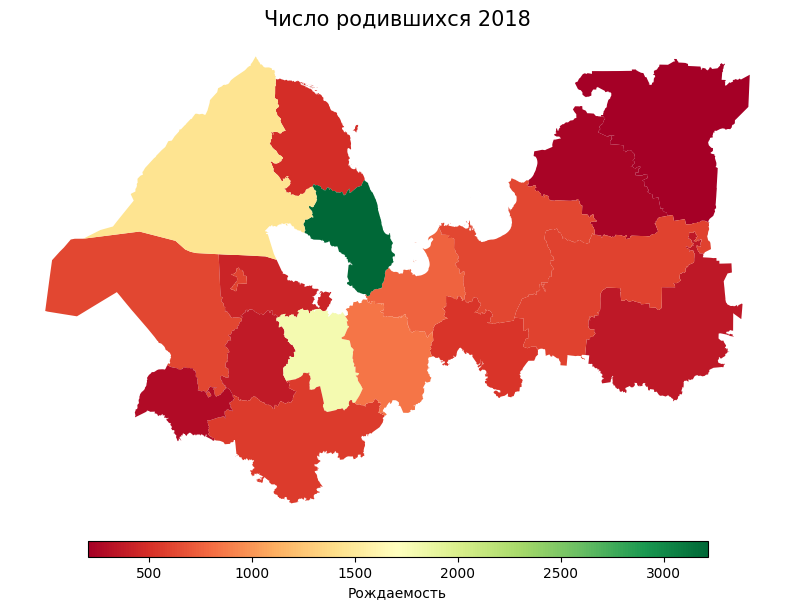

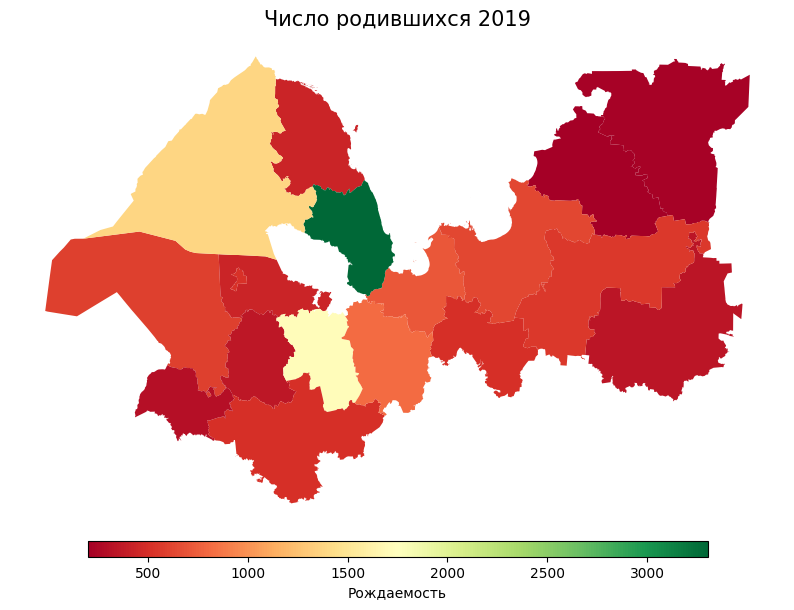

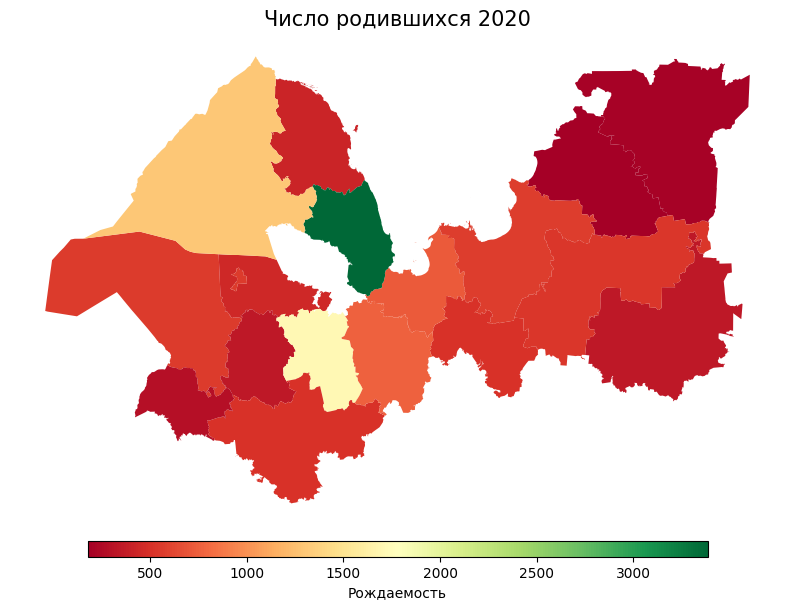

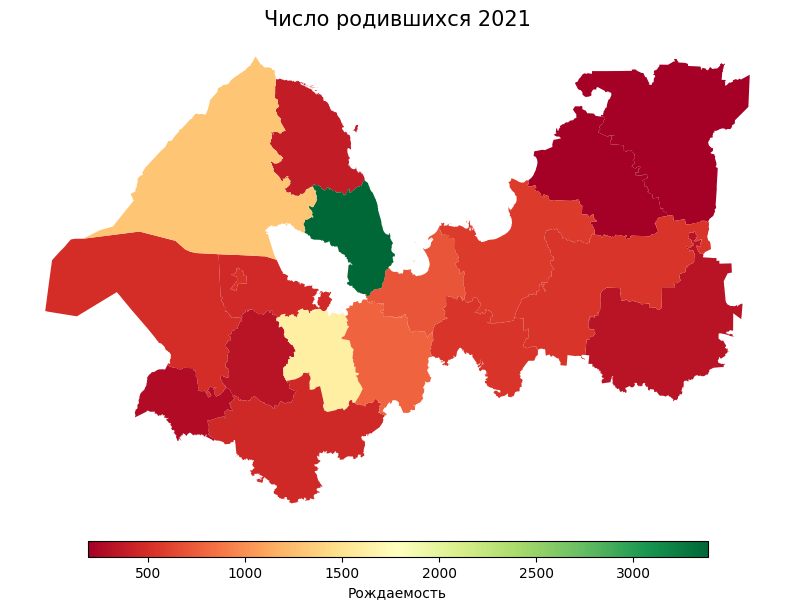

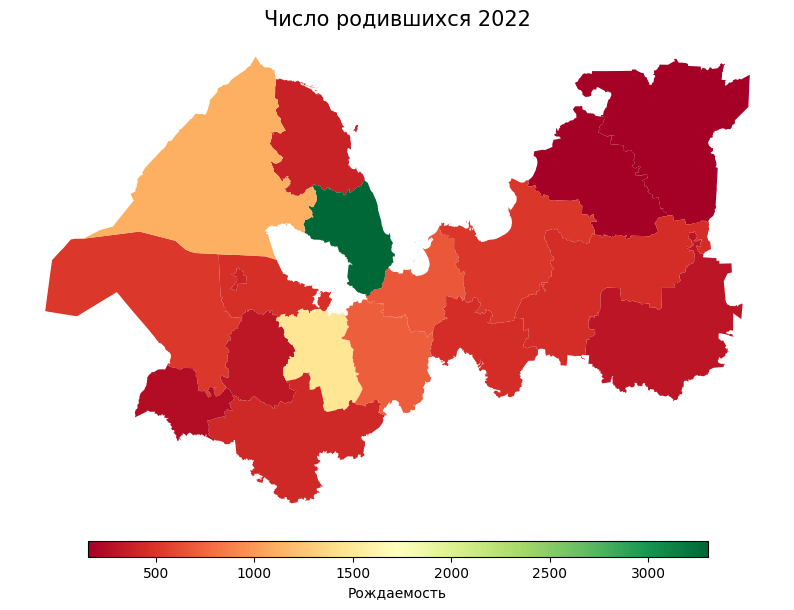

In [80]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming gdf is already loaded and contains 'geometry' and data columns for the years

# List of years for visualization
years = ['2018', '2019', '2020', '2021', '2022']

# Create separate plots for each year
for year in years:
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    # Visualization with adjusted color scale
    ter_mo.plot(column=f'birth_{year}', ax=ax, legend=True, cmap='RdYlGn', 
             legend_kwds={'label': "Рождаемость", 
                          'orientation': "horizontal",
                          'shrink': 0.8,
                          'aspect': 40,
                          'pad': 0.02})
    ax.set_title(f'Число родившихся {year}', fontsize=15)
    ax.set_axis_off()  # Remove the frame and axes
    plt.show()

##

### Рождаемость ГП

In [81]:
ter_gp= gpd.read_file('data/Границы+население/Границы только ГП и СП.geojson')
ter_gp['geometry'] = ter_gp.geometry.apply(lambda x: x.difference(water.unary_union))
ter_gp = ter_gp.dropna(axis=1, how='all')
# Определение функции нормализации названий
def normalize_name(name):
    name = name.lower().replace(' городской округ', '').replace(' муниципальный район', '')
    name = name.replace('тоснненский', 'тосненский')  # Пример специфической корректировки
    return name.strip()

ter_gp['normalized_region'] = ter_gp['layer'].apply(normalize_name)

ter_gp


fid                                name  \
0      7     Самойловское сельское поселение   
1      2   Большедворское сельское поселение   
2      6     Пикалевское городское поселение   
3      3          Борское сельское поселение   
4      1  Бокситогорское городское поселение   
..   ...                                 ...   
183  185     Фёдоровское городское поселение   
184  179       Нурминское сельское поселение   
185  175   Красноборское городское поселение   
186  183  Трубникоборское сельское поселение   
187  176        Лисинское сельское поселение   

                                  layer   2019   2021   2022   2023   2020  \
0    Бокситогорский муниципальный район   2069   2085   2096   2154   2088   
1    Бокситогорский муниципальный район   1575   1505   1486   1698   1528   
2    Бокситогорский муниципальный район  19981  19490  19250  20169  19746   
3    Бокситогорский муниципальный район   3312   3301   3272   3393   3279   
4    Бокситогорский муниципальный район  15370  15088  14606  15960  15200   
..                                  ...    ...    ...    ...    ...    ...   
183     Тоснненский муниципальный район   4460   4450   4562   6083   4536   
184     Тоснненский муниципальный район   3127   3018   2977   3354   3090   
185     Тоснненский муниципальный район   5145   4825   4657   4507   5006   
186     Тоснненский муниципальный район   1603   1541   1479   1620   1583   
187     Тоснненский муниципальный район   1984   1789   1703   1919   1856   

                                              geometry normalized_region  
0    POLYGON ((34.42428 59.67150, 34.42548 59.66226...    бокситогорский  
1    POLYGON ((34.30791 59.71295, 34.30701 59.71290...    бокситогорский  
2    POLYGON ((34.13616 59.49064, 34.13765 59.49429...    бокситогорский  
3    POLYGON ((34.06007 59.14658, 34.05620 59.14430...    бокситогорский  
4    POLYGON ((34.05535 59.40393, 34.05026 59.40426...    бокситогорский  
..                                                 ...               ...  
183  POLYGON ((30.52316 59.69108, 30.52335 59.69094...        тосненский  
184  POLYGON ((31.01394 59.63327, 31.01824 59.63223...        тосненский  
185  POLYGON ((30.58367 59.65002, 30.58381 59.65022...        тосненский  
186  POLYGON ((31.13522 59.09693, 31.13672 59.09956...        тосненский  
187  POLYGON ((30.59899 59.48310, 30.59966 59.48256...        тосненский  

[188 rows x 10 columns]

In [82]:
ter_mo['normalized_region'] = ter_mo['name'].apply(normalize_name)
ter_mo

name  \
0    Бокситогорский муниципальный район   
1     Кингисеппский муниципальный район   
2         Киришский муниципальный район   
3         Кировский муниципальный район   
4   Лодейнопольский муниципальный район   
5     Ломоносовский муниципальный район   
6      Подпорожский муниципальный район   
7       Приозерский муниципальный район   
8        Сосновоборский городской округ   
9       Волосовский муниципальный район   
10       Волховский муниципальный район   
11     Всеволожский муниципальный район   
12       Выборгский муниципальный район   
13       Гатчинский муниципальный район   
14          Лужский муниципальный район   
15      Сланцевский муниципальный район   
16       Тихвинский муниципальный район   
17      Тоснненский муниципальный район   

                                             geometry  birth_2018  birth_2019  \
0   POLYGON ((34.32777 59.19548, 34.32746 59.19544...         362         338   
1   POLYGON ((28.19187 59.32671, 28.19185 59.32673...         623         587   
2   POLYGON ((31.94327 59.42428, 31.93481 59.41883...         525         502   
3   MULTIPOLYGON (((31.91722 59.95916, 31.91717 59...         763         708   
4   MULTIPOLYGON (((33.02438 60.72112, 33.06224 60...         229         196   
5   POLYGON ((29.45718 59.67313, 29.45392 59.67086...         432         427   
6   POLYGON ((33.77158 61.23326, 33.79156 61.23320...         200         213   
7   MULTIPOLYGON (((30.68940 60.50106, 30.68662 60...         487         429   
8   POLYGON ((29.17425 59.85037, 29.15581 59.84976...         610         521   
9   POLYGON ((28.98604 59.48401, 28.98321 59.48727...         376         348   
10  MULTIPOLYGON (((32.84899 60.50379, 32.84623 60...         621         626   
11  MULTIPOLYGON (((30.55200 59.96912, 30.55246 59...        3213        3303   
12  POLYGON ((28.85880 60.04000, 28.82636 60.04088...        1444        1385   
13  POLYGON ((29.63372 59.57069, 29.63286 59.57065...        1791        1714   
14  POLYGON ((29.74807 58.43754, 29.74811 58.43758...         559         510   
15  POLYGON ((28.55977 59.15308, 28.56023 59.15321...         276         302   
16  POLYGON ((34.40750 60.15748, 34.41680 60.15734...         594         556   
17  POLYGON ((30.68152 59.72665, 30.68134 59.72678...         845         813   

    birth_2020  birth_2021  birth_2022 normalized_region  
0          343         326         298    бокситогорский  
1          562         490         514     кингисеппский  
2          503         530         457         киришский  
3          716         706         682         кировский  
4          176         196         164   лодейнопольский  
5          442         473         466     ломоносовский  
6          195         189         154      подпорожский  
7          421         377         376       приозерский  
8          560         521         394    сосновоборский  
9          340         318         307       волосовский  
10         569         567         500        волховский  
11        3384        3381        3301      всеволожский  
12        1302        1293        1104        выборгский  
13        1715        1611        1477        гатчинский  
14         513         462         419           лужский  
15         282         271         248       сланцевский  
16         527         535         460        тихвинский  
17         754         782         717        тосненский

In [83]:
import pandas as pd
import geopandas as gpd
import numpy as np

def distribute_birth(city_gdf, mortality_gdf, population_years):
    # Преобразование типов данных в числовые, если это необходимо
    for year in population_years:
        city_gdf[year] = pd.to_numeric(city_gdf[year], errors='coerce')
        mortality_gdf[f'birth_{year}'] = pd.to_numeric(mortality_gdf[f'birth_{year}'], errors='coerce')

    # Объединение данных о смертности с данными о городах
    merged = city_gdf.merge(mortality_gdf, on='normalized_region', how='left')

    # Расчет общей численности населения по годам в каждом МО
    for year in population_years:
        merged[f'total_population_{year}'] = merged.groupby('normalized_region')[year].transform('sum')

    # Распределение данных о смертности
    for year in population_years:
        # Расчет доли населения каждого города в МО
        merged[f'population_share_{year}'] = merged[year] / merged[f'total_population_{year}']

        # Распределение смертности на основе доли населения
        birth_col = f'birth_{year}'
        if birth_col in mortality_gdf.columns:
            # Применение округления вниз для получения целого числа смертей
            merged[birth_col] = np.floor(merged[birth_col] * merged[f'population_share_{year}']).astype(int)

    # Отбор нужных столбцов для результата
    result_columns = ['name_x', 'layer', 'geometry_x'] + [f'birth_{year}' for year in population_years]
    result = merged[result_columns]

    # Переименование столбцов
    result.rename(columns={'name_x': 'name', 'geometry_x': 'geometry'}, inplace=True)

    # Преобразование DataFrame обратно в GeoDataFrame
    result = gpd.GeoDataFrame(result, geometry='geometry')

    return result

# Пример использования

population_years = ['2019', '2020', '2021', '2022']
result_df = distribute_birth(ter_gp, ter_mo, population_years)
result_df


name                               layer  \
0       Самойловское сельское поселение  Бокситогорский муниципальный район   
1     Большедворское сельское поселение  Бокситогорский муниципальный район   
2       Пикалевское городское поселение  Бокситогорский муниципальный район   
3            Борское сельское поселение  Бокситогорский муниципальный район   
4    Бокситогорское городское поселение  Бокситогорский муниципальный район   
..                                  ...                                 ...   
183     Фёдоровское городское поселение     Тоснненский муниципальный район   
184       Нурминское сельское поселение     Тоснненский муниципальный район   
185   Красноборское городское поселение     Тоснненский муниципальный район   
186  Трубникоборское сельское поселение     Тоснненский муниципальный район   
187        Лисинское сельское поселение     Тоснненский муниципальный район   

                                              geometry  birth_2019  \
0    POLYGON ((34.42428 59.67150, 34.42548 59.66226...          14   
1    POLYGON ((34.30791 59.71295, 34.30701 59.71290...          10   
2    POLYGON ((34.13616 59.49064, 34.13765 59.49429...         137   
3    POLYGON ((34.06007 59.14658, 34.05620 59.14430...          22   
4    POLYGON ((34.05535 59.40393, 34.05026 59.40426...         105   
..                                                 ...         ...   
183  POLYGON ((30.52316 59.69108, 30.52335 59.69094...          28   
184  POLYGON ((31.01394 59.63327, 31.01824 59.63223...          19   
185  POLYGON ((30.58367 59.65002, 30.58381 59.65022...          32   
186  POLYGON ((31.13522 59.09693, 31.13672 59.09956...          10   
187  POLYGON ((30.59899 59.48310, 30.59966 59.48256...          12   

     birth_2020  birth_2021  birth_2022  
0            14          14          13  
1            10          10           9  
2           139         132         121  
3            23          22          20  
4           107         102          92  
..          ...         ...         ...  
183          26          28          27  
184          18          19          17  
185          29          30          27  
186           9           9           8  
187          11          11          10  

[188 rows x 7 columns]

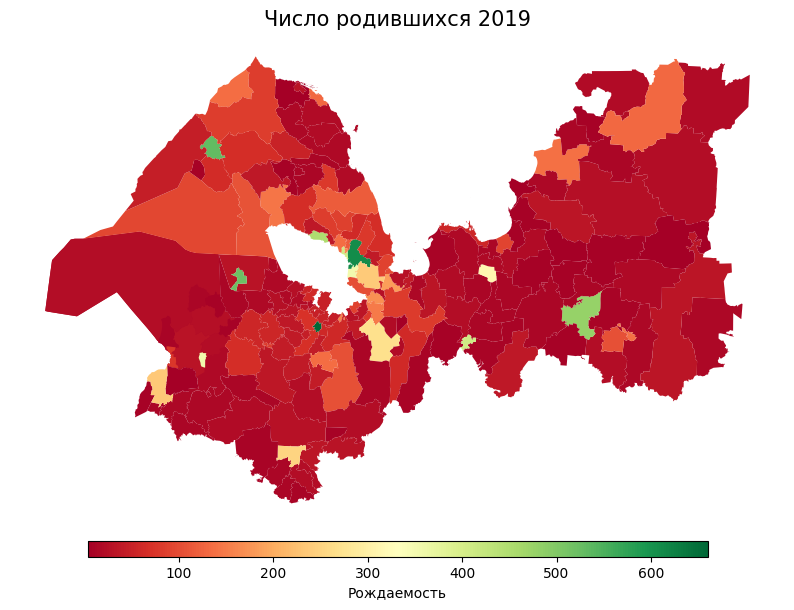

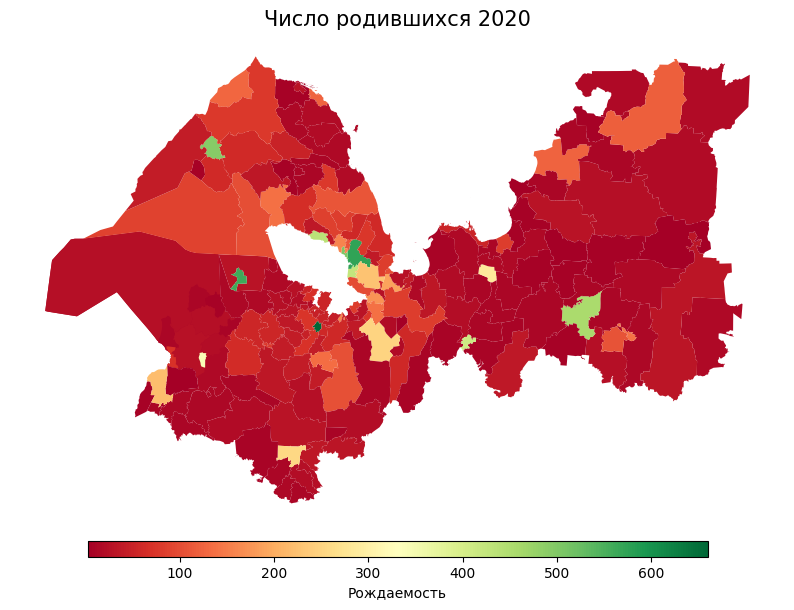

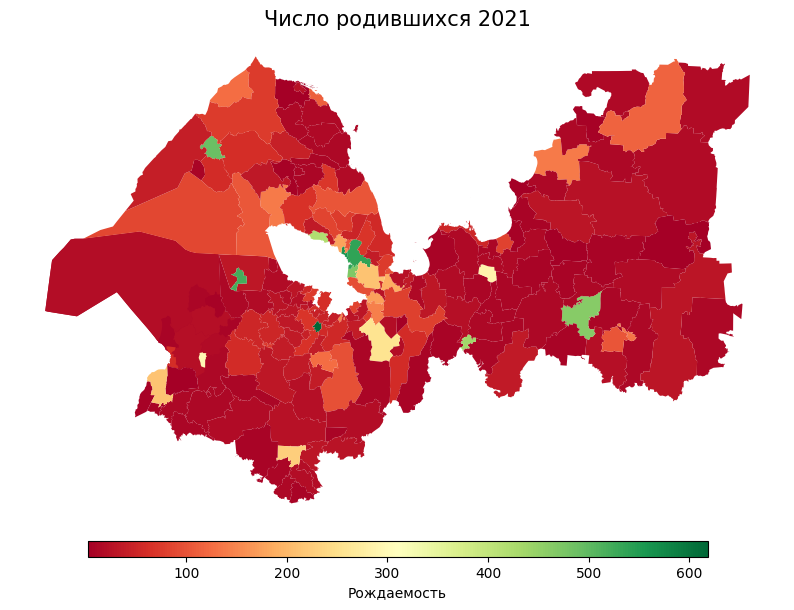

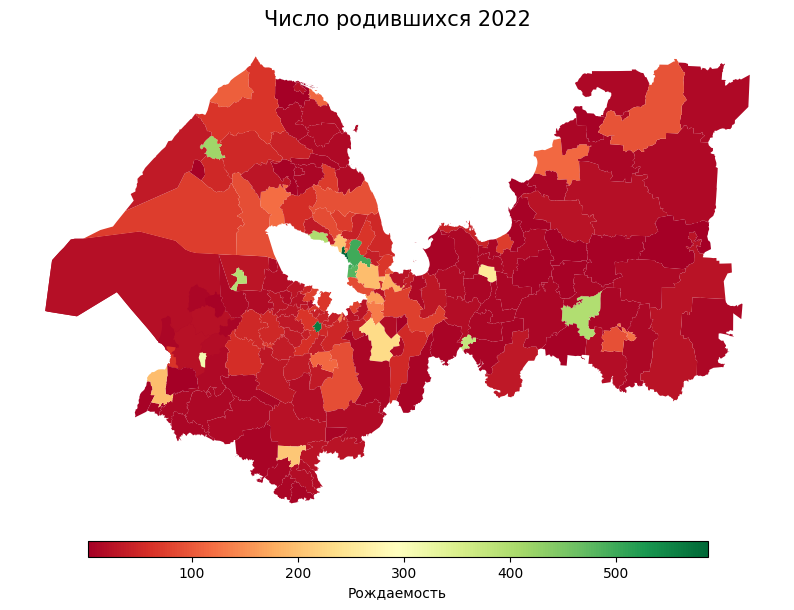

In [84]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming gdf is already loaded and contains 'geometry' and data columns for the years

# List of years for visualization
years = ['2019', '2020', '2021', '2022']

# Create separate plots for each year
for year in years:
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    # Visualization with adjusted color scale
    result_df.plot(column=f'birth_{year}', ax=ax, legend=True, cmap='RdYlGn', 
             legend_kwds={'label': "Рождаемость", 
                          'orientation': "horizontal",
                          'shrink': 0.8,
                          'aspect': 40,
                          'pad': 0.02})
    ax.set_title(f'Число родившихся {year}', fontsize=15)
    ax.set_axis_off()  # Remove the frame and axes
    plt.show()


In [85]:
# result_df.to_file("birth_gp.geojson", driver='GeoJSON')

# Естественный прирост населения

### Прирост МО

In [86]:
ter_mo= gpd.read_file('data/Границы+население/Границы только МР.geojson')
ter_mo['geometry'] = ter_mo.geometry.apply(lambda x: x.difference(water.unary_union))
ter_mo = ter_mo.dropna(axis=1, how='all')
ter_mo

fid                                 name  \
0   200   Бокситогорский муниципальный район   
1   202    Кингисеппский муниципальный район   
2   201        Киришский муниципальный район   
3   207        Кировский муниципальный район   
4   203  Лодейнопольский муниципальный район   
5   204    Ломоносовский муниципальный район   
6   205     Подпорожский муниципальный район   
7   206      Приозерский муниципальный район   
8   188       Сосновоборский городской округ   
9   217      Волосовский муниципальный район   
10  215       Волховский муниципальный район   
11  210     Всеволожский муниципальный район   
12  211       Выборгский муниципальный район   
13  213       Гатчинский муниципальный район   
14  214          Лужский муниципальный район   
15  212      Сланцевский муниципальный район   
16  216       Тихвинский муниципальный район   
17  218      Тоснненский муниципальный район   

                                  layer    2019    2021    2022    2023  \
0    Бокситогорский муниципальный район   49256   48048   47236   50977   
1     Кингисеппский муниципальный район   76182   73714   72512   83838   
2         Киришский муниципальный район   62069   61474   60003   59877   
3         Кировский муниципальный район  105936  106077  104710  108460   
4   Лодейнопольский муниципальный район   28530   27651   27365   27548   
5     Ломоносовский муниципальный район   73475   78421   81817   85329   
6      Подпорожский муниципальный район   28263   27103   26547   25508   
7       Приозерский муниципальный район   61028   59903   59496   57047   
8        Сосновоборский городской округ   64121   67054   65941   64121   
9       Волосовский муниципальный район   51668   51587   51600   50211   
10       Волховский муниципальный район   51668   51587   51600   50211   
11     Всеволожский муниципальный район  398896  473514  506289  554288   
12       Выборгский муниципальный район  199571  195728  193863  195374   
13       Гатчинский муниципальный район  243156  232752  230324  261898   
14          Лужский муниципальный район   72035   70787   69153   67523   
15      Сланцевский муниципальный район   42494   42030   41931   45192   
16       Тихвинский муниципальный район   69567   68475   67768   66266   
17      Тоснненский муниципальный район  128327  123557  120734  133109   

      2020                                           geometry  
0    48625  POLYGON ((34.32777 59.19548, 34.32746 59.19544...  
1    74881  POLYGON ((28.19187 59.32671, 28.19185 59.32673...  
2    61474  POLYGON ((31.94327 59.42428, 31.93481 59.41883...  
3   106016  MULTIPOLYGON (((31.91722 59.95916, 31.91717 59...  
4    28032  MULTIPOLYGON (((33.02438 60.72112, 33.06224 60...  
5    76786  POLYGON ((29.45718 59.67313, 29.45392 59.67086...  
6    27689  POLYGON ((33.77158 61.23326, 33.79156 61.23320...  
7    60351  MULTIPOLYGON (((30.68940 60.50106, 30.68662 60...  
8    67720  POLYGON ((29.17425 59.85037, 29.15581 59.84976...  
9    51778  POLYGON ((28.98604 59.48401, 28.98321 59.48727...  
10   51778  MULTIPOLYGON (((32.84899 60.50379, 32.84623 60...  
11  438607  MULTIPOLYGON (((30.55200 59.96912, 30.55246 59...  
12  198226  POLYGON ((28.85880 60.04000, 28.82636 60.04088...  
13  238034  POLYGON ((29.63372 59.57069, 29.63286 59.57065...  
14   75307  POLYGON ((29.74807 58.43754, 29.74811 58.43758...  
15   42296  POLYGON ((28.55977 59.15308, 28.56023 59.15321...  
16   69457  POLYGON ((34.40750 60.15748, 34.41680 60.15734...  
17  126915  POLYGON ((30.68152 59.72665, 30.68134 59.72678...

In [87]:
import pandas as pd

# Your data as defined earlier
data = {
    'Region': [
        'Бокситогорский', 'Волосовский', 'Волховский', 
        'Всеволожский', 'Выборгский', 'Гатчинский', 'Кингисеппский', 'Киришский',
        'Кировский', 'Лодейнопольский', 'Ломоносовский', 'Лужский', 'Подпорожский',
        'Приозерский', 'Сланцевский', 'Тихвинский', 'Тосненский', 'Сосновоборский'
    ],
    '2018': [-577, -305, -704, -11, -1228, -1435, -497, -388, -499, -231, -490, -808, -335, -406, -478, -477, -700, -121],
    '2019': [-532, -287, -699, -8, -1135, -1362, -489, -467, -598, -289, -432, -765, -302, -426, -471, -540, -868, -206],
    '2020': [-589, -464, -1066, -941, -1558, -2203, -649, -587, -861, -406, -615, -1126, -382, -568, -517, -766, -1193, -323],
    '2021': [-773, -518, -1251, -1953, -1916, -2732, -973, -715, -1055, -426, -662, -1256, -409, -789, -714, -868, -1597, -490],
    '2022': [-567, -386, -925, -1329, -1506, -1937, -743, -533, -777, -296, -465, -898, -360, -551, -516, -699, -1016, -424]
}

# Creating the DataFrame
df_growth = pd.DataFrame(data)

# Resetting the index to use a numeric index instead of regions
df_growth.reset_index(drop=True, inplace=True)

# Viewing the modified DataFrame
df_growth

Region  2018  2019  2020  2021  2022
0    Бокситогорский  -577  -532  -589  -773  -567
1       Волосовский  -305  -287  -464  -518  -386
2        Волховский  -704  -699 -1066 -1251  -925
3      Всеволожский   -11    -8  -941 -1953 -1329
4        Выборгский -1228 -1135 -1558 -1916 -1506
5        Гатчинский -1435 -1362 -2203 -2732 -1937
6     Кингисеппский  -497  -489  -649  -973  -743
7         Киришский  -388  -467  -587  -715  -533
8         Кировский  -499  -598  -861 -1055  -777
9   Лодейнопольский  -231  -289  -406  -426  -296
10    Ломоносовский  -490  -432  -615  -662  -465
11          Лужский  -808  -765 -1126 -1256  -898
12     Подпорожский  -335  -302  -382  -409  -360
13      Приозерский  -406  -426  -568  -789  -551
14      Сланцевский  -478  -471  -517  -714  -516
15       Тихвинский  -477  -540  -766  -868  -699
16       Тосненский  -700  -868 -1193 -1597 -1016
17   Сосновоборский  -121  -206  -323  -490  -424

In [88]:

# Определение функции нормализации названий
def normalize_name(name):
    name = name.lower().replace(' городской округ', '').replace(' муниципальный район', '')
    name = name.replace('тоснненский', 'тосненский')  # Пример специфической корректировки
    return name.strip()

# Применение функции нормализации к обоим DataFrame
df_growth['normalized_region'] = df_growth['Region'].apply(normalize_name)
ter_mo['normalized_region'] = ter_mo['name'].apply(normalize_name)

In [89]:

# Создаем новые колонки для миграции в ter_gp
ter_mo['growth_2018'] = 0
ter_mo['growth_2019'] = 0
ter_mo['growth_2020'] = 0
ter_mo['growth_2021'] = 0
ter_mo['growth_2022'] = 0


# Проходим по каждой строке в final_df и ищем совпадения в ter_gp
for index, row in df_growth.iterrows():
    # Используем str.contains для проверки наличия подстроки, предполагая, что значения в 'region' могут частично совпадать с 'name'
    matches = ter_mo['normalized_region'].str.contains(row['normalized_region'], na=False)
    if matches.any():
        # Обновляем данные миграции для всех соответствующих строк в ter_gp
        ter_mo.loc[matches, 'growth_2018'] += row['2018'] if pd.notna(row['2018']) else 0
        ter_mo.loc[matches, 'growth_2019'] += row['2019'] if pd.notna(row['2019']) else 0
        ter_mo.loc[matches, 'growth_2020'] += row['2020'] if pd.notna(row['2020']) else 0
        ter_mo.loc[matches, 'growth_2021'] += row['2021'] if pd.notna(row['2021']) else 0
        ter_mo.loc[matches, 'growth_2022'] += row['2022'] if pd.notna(row['2022']) else 0

columns_to_drop = ['2019', '2021', '2022', '2023', '2020', 'layer', 'fid', 'normalized_region']  # Замените на имена столбцов, которые нужно удалить
# Создание нового GeoDataFrame без указанных столбцов
ter_mo = ter_mo.drop(columns=columns_to_drop)
ter_mo
# ter_mo.to_file("birth_mo.geojson", driver='GeoJSON')


name  \
0    Бокситогорский муниципальный район   
1     Кингисеппский муниципальный район   
2         Киришский муниципальный район   
3         Кировский муниципальный район   
4   Лодейнопольский муниципальный район   
5     Ломоносовский муниципальный район   
6      Подпорожский муниципальный район   
7       Приозерский муниципальный район   
8        Сосновоборский городской округ   
9       Волосовский муниципальный район   
10       Волховский муниципальный район   
11     Всеволожский муниципальный район   
12       Выборгский муниципальный район   
13       Гатчинский муниципальный район   
14          Лужский муниципальный район   
15      Сланцевский муниципальный район   
16       Тихвинский муниципальный район   
17      Тоснненский муниципальный район   

                                             geometry  growth_2018  \
0   POLYGON ((34.32777 59.19548, 34.32746 59.19544...         -577   
1   POLYGON ((28.19187 59.32671, 28.19185 59.32673...         -497   
2   POLYGON ((31.94327 59.42428, 31.93481 59.41883...         -388   
3   MULTIPOLYGON (((31.91722 59.95916, 31.91717 59...         -499   
4   MULTIPOLYGON (((33.02438 60.72112, 33.06224 60...         -231   
5   POLYGON ((29.45718 59.67313, 29.45392 59.67086...         -490   
6   POLYGON ((33.77158 61.23326, 33.79156 61.23320...         -335   
7   MULTIPOLYGON (((30.68940 60.50106, 30.68662 60...         -406   
8   POLYGON ((29.17425 59.85037, 29.15581 59.84976...         -121   
9   POLYGON ((28.98604 59.48401, 28.98321 59.48727...         -305   
10  MULTIPOLYGON (((32.84899 60.50379, 32.84623 60...         -704   
11  MULTIPOLYGON (((30.55200 59.96912, 30.55246 59...          -11   
12  POLYGON ((28.85880 60.04000, 28.82636 60.04088...        -1228   
13  POLYGON ((29.63372 59.57069, 29.63286 59.57065...        -1435   
14  POLYGON ((29.74807 58.43754, 29.74811 58.43758...         -808   
15  POLYGON ((28.55977 59.15308, 28.56023 59.15321...         -478   
16  POLYGON ((34.40750 60.15748, 34.41680 60.15734...         -477   
17  POLYGON ((30.68152 59.72665, 30.68134 59.72678...         -700   

    growth_2019  growth_2020  growth_2021  growth_2022  
0          -532         -589         -773         -567  
1          -489         -649         -973         -743  
2          -467         -587         -715         -533  
3          -598         -861        -1055         -777  
4          -289         -406         -426         -296  
5          -432         -615         -662         -465  
6          -302         -382         -409         -360  
7          -426         -568         -789         -551  
8          -206         -323         -490         -424  
9          -287         -464         -518         -386  
10         -699        -1066        -1251         -925  
11           -8         -941        -1953        -1329  
12        -1135        -1558        -1916        -1506  
13        -1362        -2203        -2732        -1937  
14         -765        -1126        -1256         -898  
15         -471         -517         -714         -516  
16         -540         -766         -868         -699  
17         -868        -1193        -1597        -1016

In [90]:
# ter_mo.to_file("growth_mo.geojson", driver='GeoJSON')

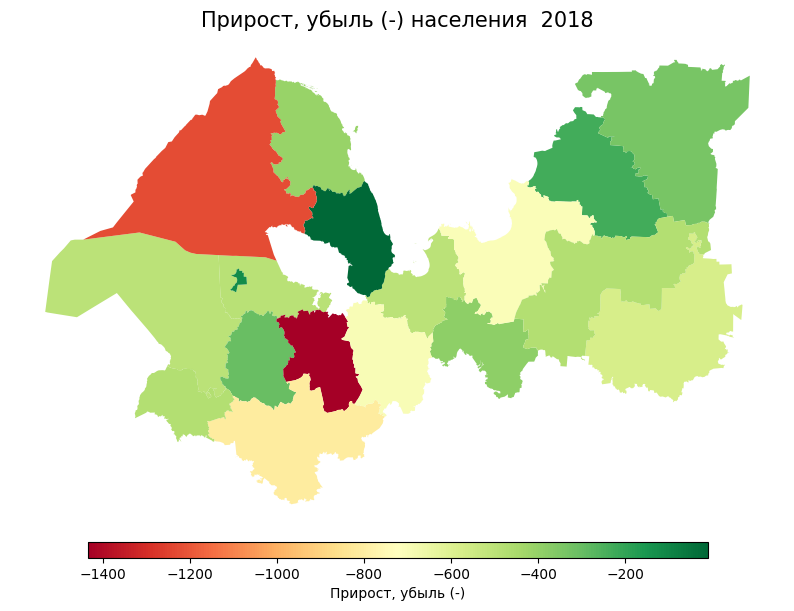

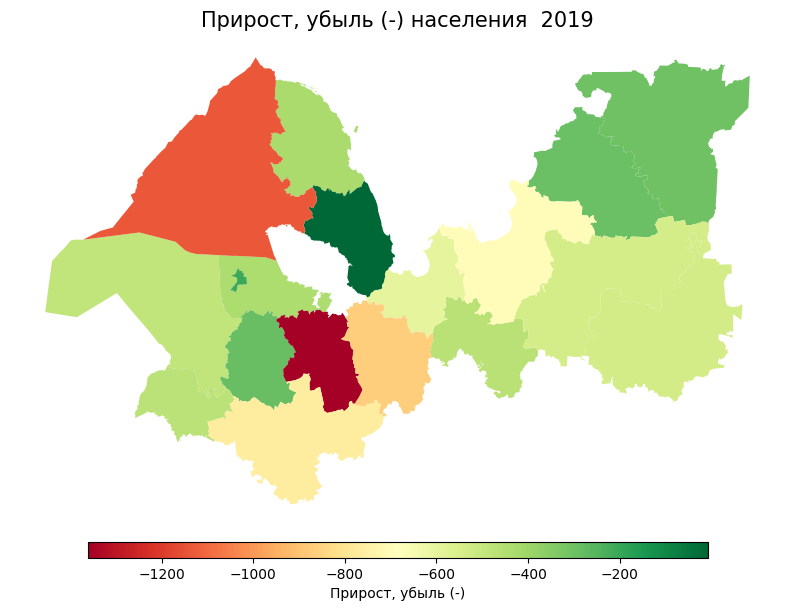

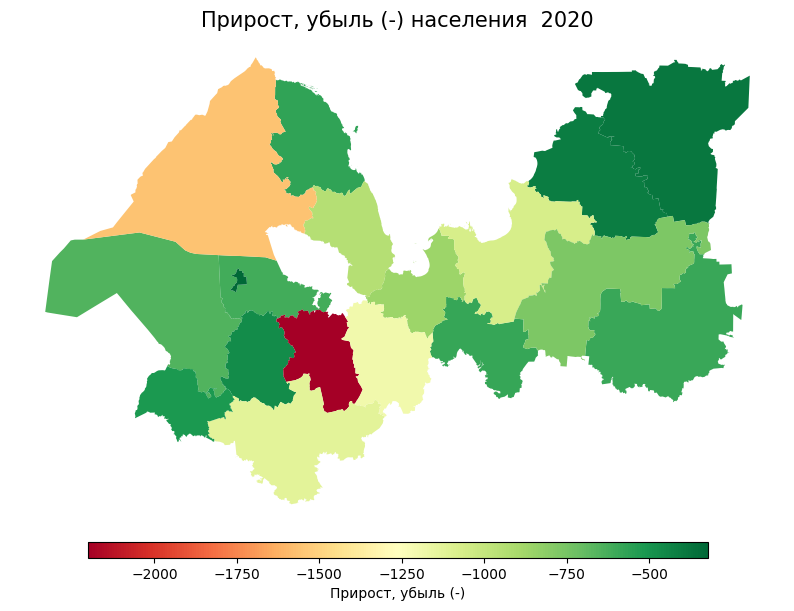

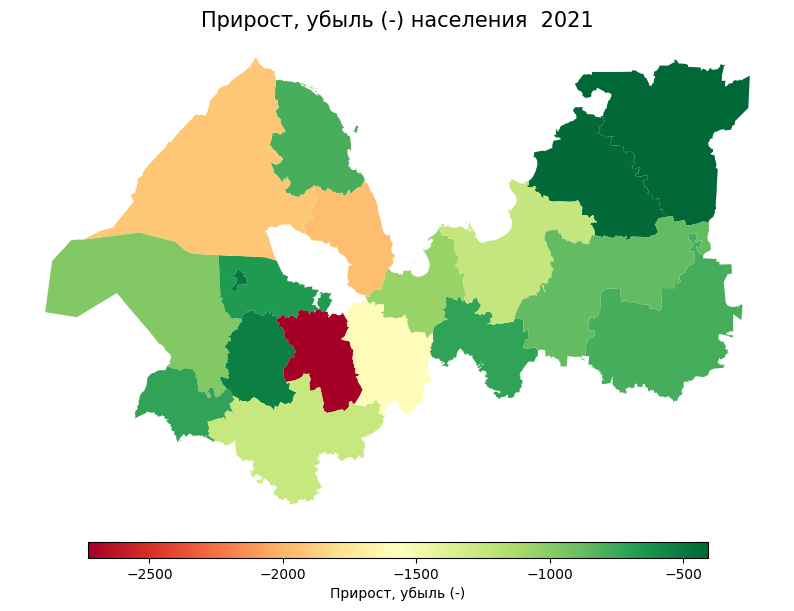

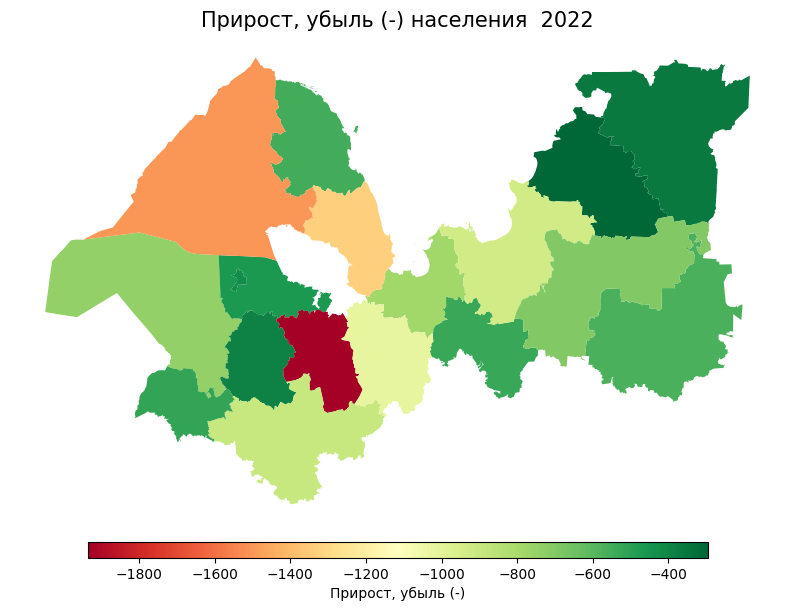

In [91]:

import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming gdf is already loaded and contains 'geometry' and data columns for the years

# List of years for visualization
years = ['2018', '2019', '2020', '2021', '2022']

# Create separate plots for each year
for year in years:
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    # Visualization with adjusted color scale
    ter_mo.plot(column=f'growth_{year}', ax=ax, legend=True, cmap='RdYlGn', 
             legend_kwds={'label': "Прирост, убыль (-)", 
                          'orientation': "horizontal",
                          'shrink': 0.8,
                          'aspect': 40,
                          'pad': 0.02})
    ax.set_title(f'Прирост, убыль (-) населения  {year}', fontsize=15)
    ax.set_axis_off()  # Remove the frame and axes
    plt.show()

### Прирост ГП

In [92]:
water = gpd.read_file('data/Водомы итог (конец).geojson')
water = water[water['name'] == 'Ладожское озеро']
water

name  type                                           geometry
92  Ладожское озеро  lake  MULTIPOLYGON (((30.42725 60.85666, 30.42725 60...

In [93]:
ter_gp= gpd.read_file('data/Границы+население/Границы только ГП и СП.geojson')
ter_gp['geometry'] = ter_gp.geometry.apply(lambda x: x.difference(water.unary_union))
ter_gp = ter_gp.dropna(axis=1, how='all')
# Определение функции нормализации названий
def normalize_name(name):
    name = name.lower().replace(' городской округ', '').replace(' муниципальный район', '')
    name = name.replace('тоснненский', 'тосненский')  # Пример специфической корректировки
    return name.strip()

ter_gp['normalized_region'] = ter_gp['layer'].apply(normalize_name)

ter_gp

fid                                name  \
0      7     Самойловское сельское поселение   
1      2   Большедворское сельское поселение   
2      6     Пикалевское городское поселение   
3      3          Борское сельское поселение   
4      1  Бокситогорское городское поселение   
..   ...                                 ...   
183  185     Фёдоровское городское поселение   
184  179       Нурминское сельское поселение   
185  175   Красноборское городское поселение   
186  183  Трубникоборское сельское поселение   
187  176        Лисинское сельское поселение   

                                  layer   2019   2021   2022   2023   2020  \
0    Бокситогорский муниципальный район   2069   2085   2096   2154   2088   
1    Бокситогорский муниципальный район   1575   1505   1486   1698   1528   
2    Бокситогорский муниципальный район  19981  19490  19250  20169  19746   
3    Бокситогорский муниципальный район   3312   3301   3272   3393   3279   
4    Бокситогорский муниципальный район  15370  15088  14606  15960  15200   
..                                  ...    ...    ...    ...    ...    ...   
183     Тоснненский муниципальный район   4460   4450   4562   6083   4536   
184     Тоснненский муниципальный район   3127   3018   2977   3354   3090   
185     Тоснненский муниципальный район   5145   4825   4657   4507   5006   
186     Тоснненский муниципальный район   1603   1541   1479   1620   1583   
187     Тоснненский муниципальный район   1984   1789   1703   1919   1856   

                                              geometry normalized_region  
0    POLYGON ((34.42428 59.67150, 34.42548 59.66226...    бокситогорский  
1    POLYGON ((34.30791 59.71295, 34.30701 59.71290...    бокситогорский  
2    POLYGON ((34.13616 59.49064, 34.13765 59.49429...    бокситогорский  
3    POLYGON ((34.06007 59.14658, 34.05620 59.14430...    бокситогорский  
4    POLYGON ((34.05535 59.40393, 34.05026 59.40426...    бокситогорский  
..                                                 ...               ...  
183  POLYGON ((30.52316 59.69108, 30.52335 59.69094...        тосненский  
184  POLYGON ((31.01394 59.63327, 31.01824 59.63223...        тосненский  
185  POLYGON ((30.58367 59.65002, 30.58381 59.65022...        тосненский  
186  POLYGON ((31.13522 59.09693, 31.13672 59.09956...        тосненский  
187  POLYGON ((30.59899 59.48310, 30.59966 59.48256...        тосненский  

[188 rows x 10 columns]

In [94]:
ter_mo['normalized_region'] = ter_mo['name'].apply(normalize_name)
ter_mo

name  \
0    Бокситогорский муниципальный район   
1     Кингисеппский муниципальный район   
2         Киришский муниципальный район   
3         Кировский муниципальный район   
4   Лодейнопольский муниципальный район   
5     Ломоносовский муниципальный район   
6      Подпорожский муниципальный район   
7       Приозерский муниципальный район   
8        Сосновоборский городской округ   
9       Волосовский муниципальный район   
10       Волховский муниципальный район   
11     Всеволожский муниципальный район   
12       Выборгский муниципальный район   
13       Гатчинский муниципальный район   
14          Лужский муниципальный район   
15      Сланцевский муниципальный район   
16       Тихвинский муниципальный район   
17      Тоснненский муниципальный район   

                                             geometry  growth_2018  \
0   POLYGON ((34.32777 59.19548, 34.32746 59.19544...         -577   
1   POLYGON ((28.19187 59.32671, 28.19185 59.32673...         -497   
2   POLYGON ((31.94327 59.42428, 31.93481 59.41883...         -388   
3   MULTIPOLYGON (((31.91722 59.95916, 31.91717 59...         -499   
4   MULTIPOLYGON (((33.02438 60.72112, 33.06224 60...         -231   
5   POLYGON ((29.45718 59.67313, 29.45392 59.67086...         -490   
6   POLYGON ((33.77158 61.23326, 33.79156 61.23320...         -335   
7   MULTIPOLYGON (((30.68940 60.50106, 30.68662 60...         -406   
8   POLYGON ((29.17425 59.85037, 29.15581 59.84976...         -121   
9   POLYGON ((28.98604 59.48401, 28.98321 59.48727...         -305   
10  MULTIPOLYGON (((32.84899 60.50379, 32.84623 60...         -704   
11  MULTIPOLYGON (((30.55200 59.96912, 30.55246 59...          -11   
12  POLYGON ((28.85880 60.04000, 28.82636 60.04088...        -1228   
13  POLYGON ((29.63372 59.57069, 29.63286 59.57065...        -1435   
14  POLYGON ((29.74807 58.43754, 29.74811 58.43758...         -808   
15  POLYGON ((28.55977 59.15308, 28.56023 59.15321...         -478   
16  POLYGON ((34.40750 60.15748, 34.41680 60.15734...         -477   
17  POLYGON ((30.68152 59.72665, 30.68134 59.72678...         -700   

    growth_2019  growth_2020  growth_2021  growth_2022 normalized_region  
0          -532         -589         -773         -567    бокситогорский  
1          -489         -649         -973         -743     кингисеппский  
2          -467         -587         -715         -533         киришский  
3          -598         -861        -1055         -777         кировский  
4          -289         -406         -426         -296   лодейнопольский  
5          -432         -615         -662         -465     ломоносовский  
6          -302         -382         -409         -360      подпорожский  
7          -426         -568         -789         -551       приозерский  
8          -206         -323         -490         -424    сосновоборский  
9          -287         -464         -518         -386       волосовский  
10         -699        -1066        -1251         -925        волховский  
11           -8         -941        -1953        -1329      всеволожский  
12        -1135        -1558        -1916        -1506        выборгский  
13        -1362        -2203        -2732        -1937        гатчинский  
14         -765        -1126        -1256         -898           лужский  
15         -471         -517         -714         -516       сланцевский  
16         -540         -766         -868         -699        тихвинский  
17         -868        -1193        -1597        -1016        тосненский

In [95]:
import pandas as pd
import geopandas as gpd
import numpy as np

def distribute_growth(city_gdf, mortality_gdf, population_years):
    for year in population_years:
        city_gdf[year] = pd.to_numeric(city_gdf[year], errors='coerce')
        mortality_gdf[f'growth_{year}'] = pd.to_numeric(mortality_gdf[f'growth_{year}'], errors='coerce')

    # Объединение данных о смертности с данными о городах
    merged = city_gdf.merge(mortality_gdf, on='normalized_region', how='left')

    # Расчет общей численности населения по годам в каждом МО
    for year in population_years:
        merged[f'total_population_{year}'] = merged.groupby('normalized_region')[year].transform('sum')

    # Распределение данных о смертности
    for year in population_years:
        # Расчет доли населения каждого города в МО
        merged[f'population_share_{year}'] = merged[year] / merged[f'total_population_{year}']

        # Распределение смертности на основе доли населения
        growth_col = f'growth_{year}'
        if growth_col in mortality_gdf.columns:
            # Применение округления вниз для получения целого числа смертей
            merged[growth_col] = np.floor(merged[growth_col] * merged[f'population_share_{year}']).astype(int)

    # Отбор нужных столбцов для результата
    result_columns = ['name_x', 'layer', 'geometry_x'] + [f'growth_{year}' for year in population_years]
    result = merged[result_columns]

    # Переименование столбцов
    result.rename(columns={'name_x': 'name', 'geometry_x': 'geometry'}, inplace=True)

    # Преобразование DataFrame обратно в GeoDataFrame
    result = gpd.GeoDataFrame(result, geometry='geometry')

    return result

population_years = ['2019', '2020', '2021', '2022']
result_df = distribute_growth(ter_gp, ter_mo, population_years)
result_df


name                               layer  \
0       Самойловское сельское поселение  Бокситогорский муниципальный район   
1     Большедворское сельское поселение  Бокситогорский муниципальный район   
2       Пикалевское городское поселение  Бокситогорский муниципальный район   
3            Борское сельское поселение  Бокситогорский муниципальный район   
4    Бокситогорское городское поселение  Бокситогорский муниципальный район   
..                                  ...                                 ...   
183     Фёдоровское городское поселение     Тоснненский муниципальный район   
184       Нурминское сельское поселение     Тоснненский муниципальный район   
185   Красноборское городское поселение     Тоснненский муниципальный район   
186  Трубникоборское сельское поселение     Тоснненский муниципальный район   
187        Лисинское сельское поселение     Тоснненский муниципальный район   

                                              geometry  growth_2019  \
0    POLYGON ((34.42428 59.67150, 34.42548 59.66226...          -23   
1    POLYGON ((34.30791 59.71295, 34.30701 59.71290...          -18   
2    POLYGON ((34.13616 59.49064, 34.13765 59.49429...         -216   
3    POLYGON ((34.06007 59.14658, 34.05620 59.14430...          -36   
4    POLYGON ((34.05535 59.40393, 34.05026 59.40426...         -167   
..                                                 ...          ...   
183  POLYGON ((30.52316 59.69108, 30.52335 59.69094...          -31   
184  POLYGON ((31.01394 59.63327, 31.01824 59.63223...          -22   
185  POLYGON ((30.58367 59.65002, 30.58381 59.65022...          -35   
186  POLYGON ((31.13522 59.09693, 31.13672 59.09956...          -11   
187  POLYGON ((30.59899 59.48310, 30.59966 59.48256...          -14   

     growth_2020  growth_2021  growth_2022  
0            -26          -34          -26  
1            -19          -25          -18  
2           -240         -314         -232  
3            -40          -54          -40  
4           -185         -243         -176  
..           ...          ...          ...  
183          -43          -58          -39  
184          -30          -40          -26  
185          -48          -63          -40  
186          -15          -20          -13  
187          -18          -24          -15  

[188 rows x 7 columns]

In [96]:
# result_df.to_file("growth_gp.geojson", driver='GeoJSON')


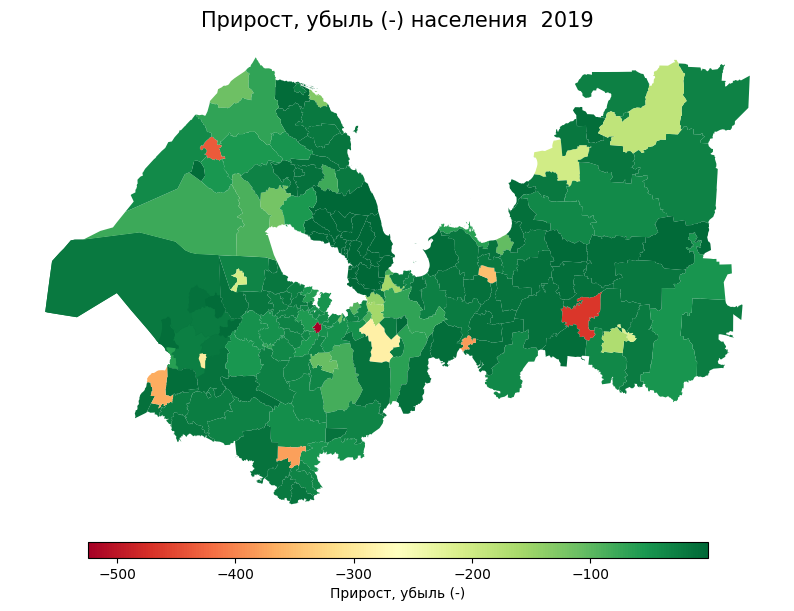

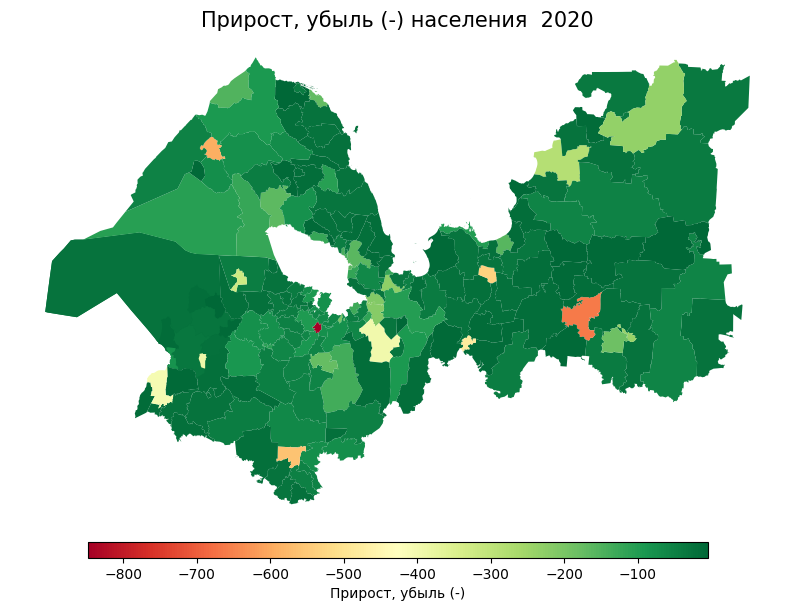

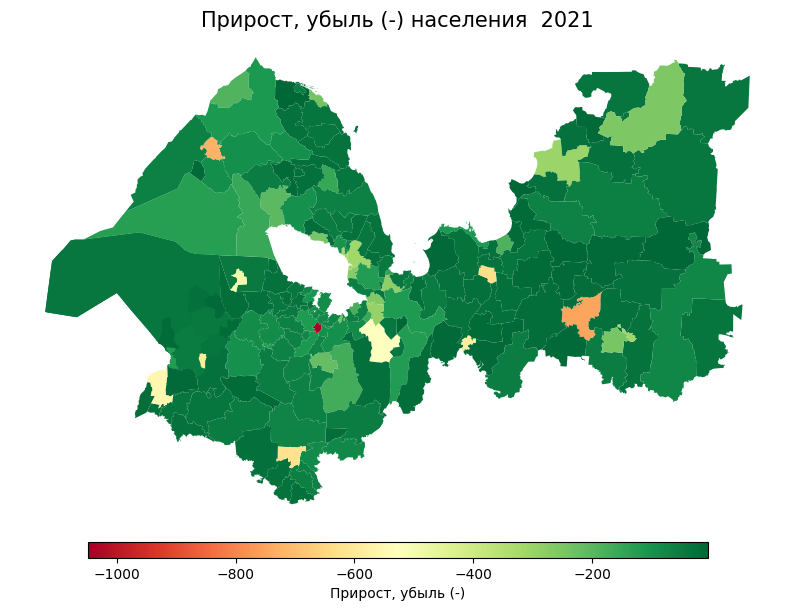

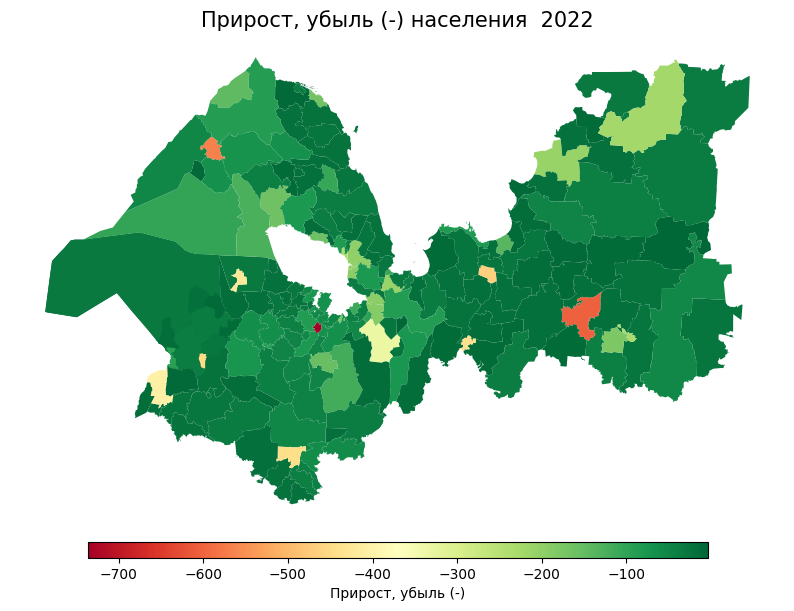

In [97]:

import geopandas as gpd
import matplotlib.pyplot as plt


# List of years for visualization
years = ['2019', '2020', '2021', '2022']

# Create separate plots for each year
for year in years:
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    # Visualization with adjusted color scale
    result_df.plot(column=f'growth_{year}', ax=ax, legend=True, cmap='RdYlGn', 
             legend_kwds={'label': "Прирост, убыль (-)", 
                          'orientation': "horizontal",
                          'shrink': 0.8,
                          'aspect': 40,
                          'pad': 0.02})
    ax.set_title(f'Прирост, убыль (-) населения  {year}', fontsize=15)
    ax.set_axis_off()  # Remove the frame and axes
    plt.show()

# Смертность росстат

### Смертьность ГП
